In [1]:
import numpy as np
from scipy.stats import kurtosis, skew
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('3.xlsx')

In [3]:
df.head()

,seq,Start,End,Resolution,Chain,ID,seq.1,Start.1,End.1,Resolution.1,Chain.1,ID.1,RMS Value
0,ASPGLUALA,61,63,1.74,A,102L,ASPGLUALA,127,129,1.74,A,102L,0.531809
1,ALAALAVAL,73,75,1.74,A,102L,ALAALAVAL,129,131,1.74,A,102L,0.165635
2,ALAVALARG,74,76,1.74,A,102L,ALAVALARG,93,95,1.74,A,102L,1.216112
3,VALILETHR,57,59,1.74,A,102L,VALILETHR,149,151,1.74,A,102L,2.348902
4,ALALYSSER,42,44,1.74,A,102L,ALALYSSER,134,136,1.74,A,102L,1.029239


In [4]:
id_rms_df = df.groupby(['seq'])['RMS Value'].apply(list).to_frame()
id_rms_df = id_rms_df.reset_index()

In [5]:
num_bins = np.arange(0, df['RMS Value'].max(), 0.5)
# bins
x_x = np.arange(0, 3, 0.5)
y_y = np.arange(0, 100, 10)
# y = [0, 10, 20, 30, 40, 50, 60]

In [6]:
# for index, row in id_rms_df.iterrows():
# #     print(row['ID'], row['ID.1'], row['RMS Value'])
#     fig, ax = plt.subplots()
#     sigma = np.array(row['RMS Value']).std()
#     mu = np.array(row['RMS Value']).mean()
#     # add a 'best fit' line
#     y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#          np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
#     plt.figure(figsize=(20, 10))
#     plt.hist(row['RMS Value'], bins=bins, edgecolor='black', linewidth=1.2)
#     plt.xlabel(' -- RMS -- ')
#     plt.ylabel(' -- No of fragments -- ')
#     plt.yticks(y)
#     plt.xticks(x)
#     plt.title('RMS Distribution of ' + row['seq'])
#     ax.plot(bins, y, '--')
#     plt.show()

C:\Users\Sudhanva\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sudhanva\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\Sudhanva\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


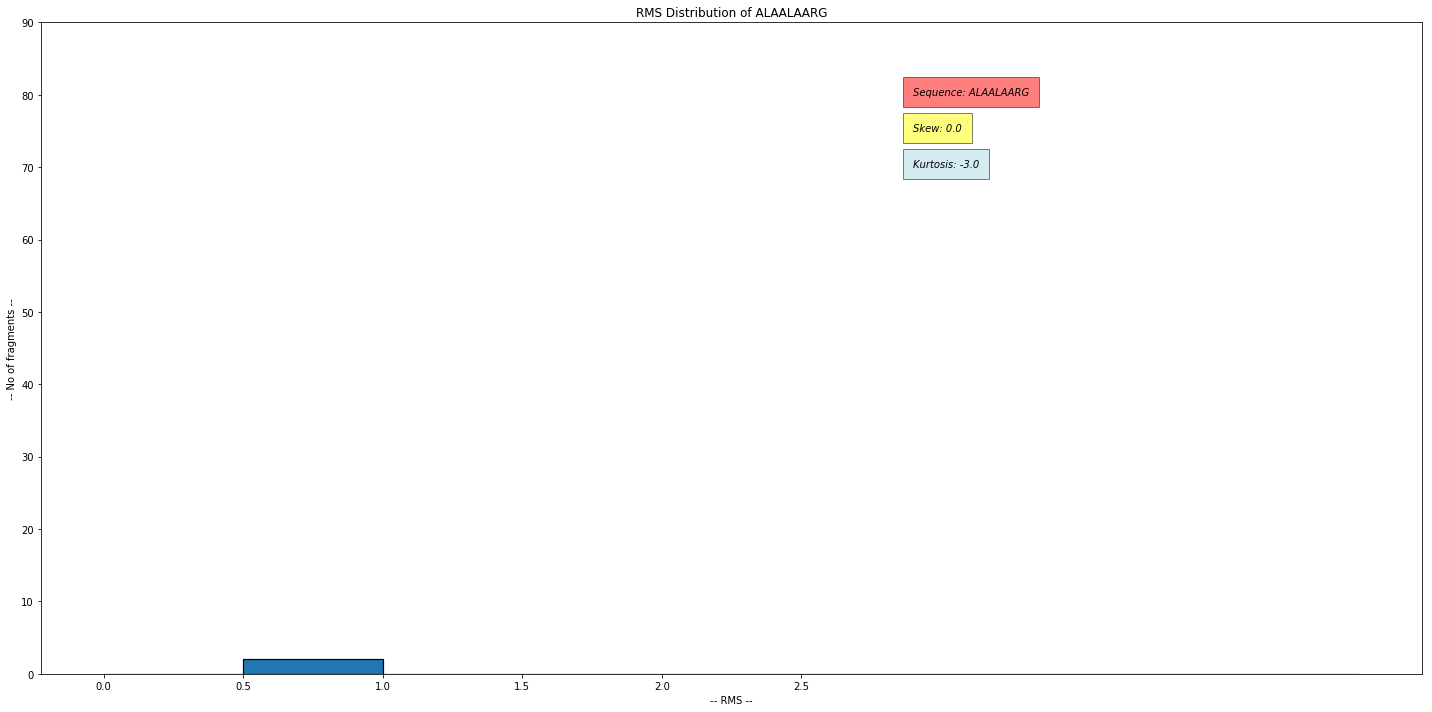

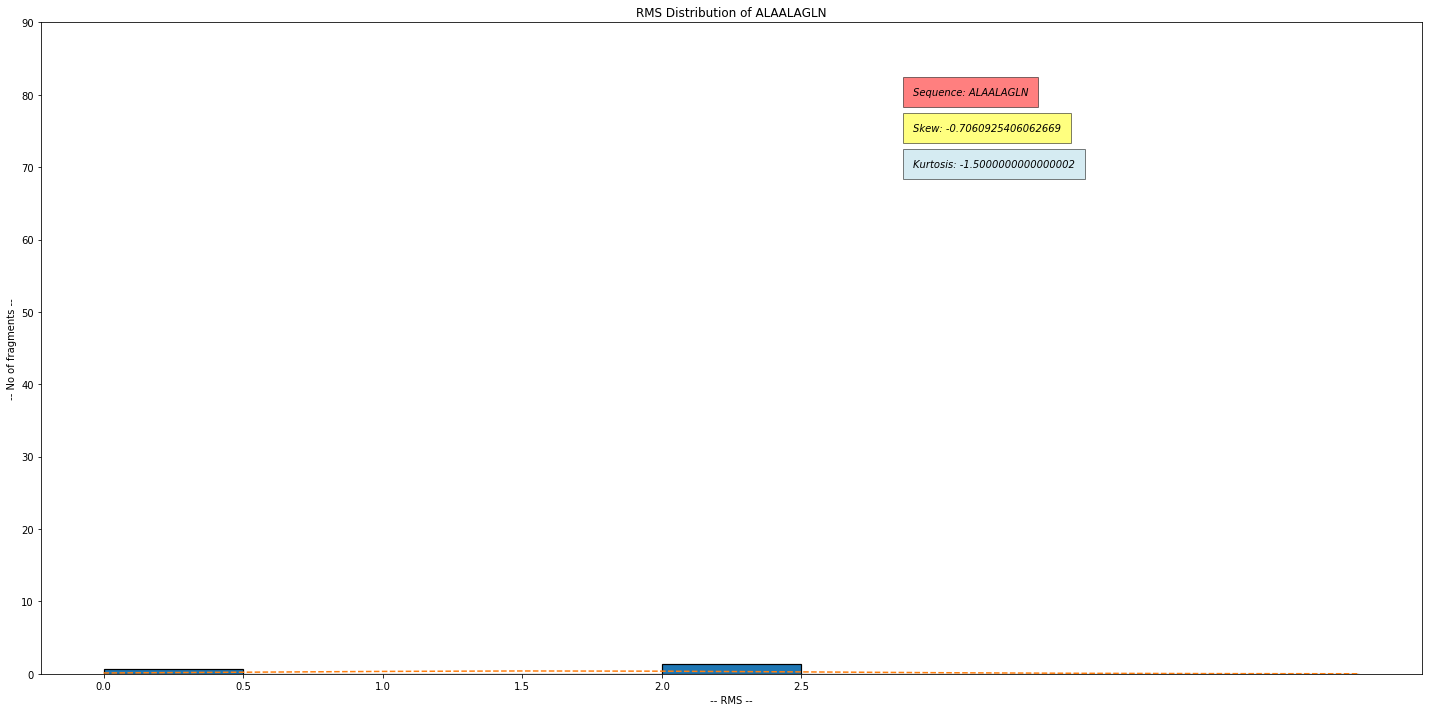

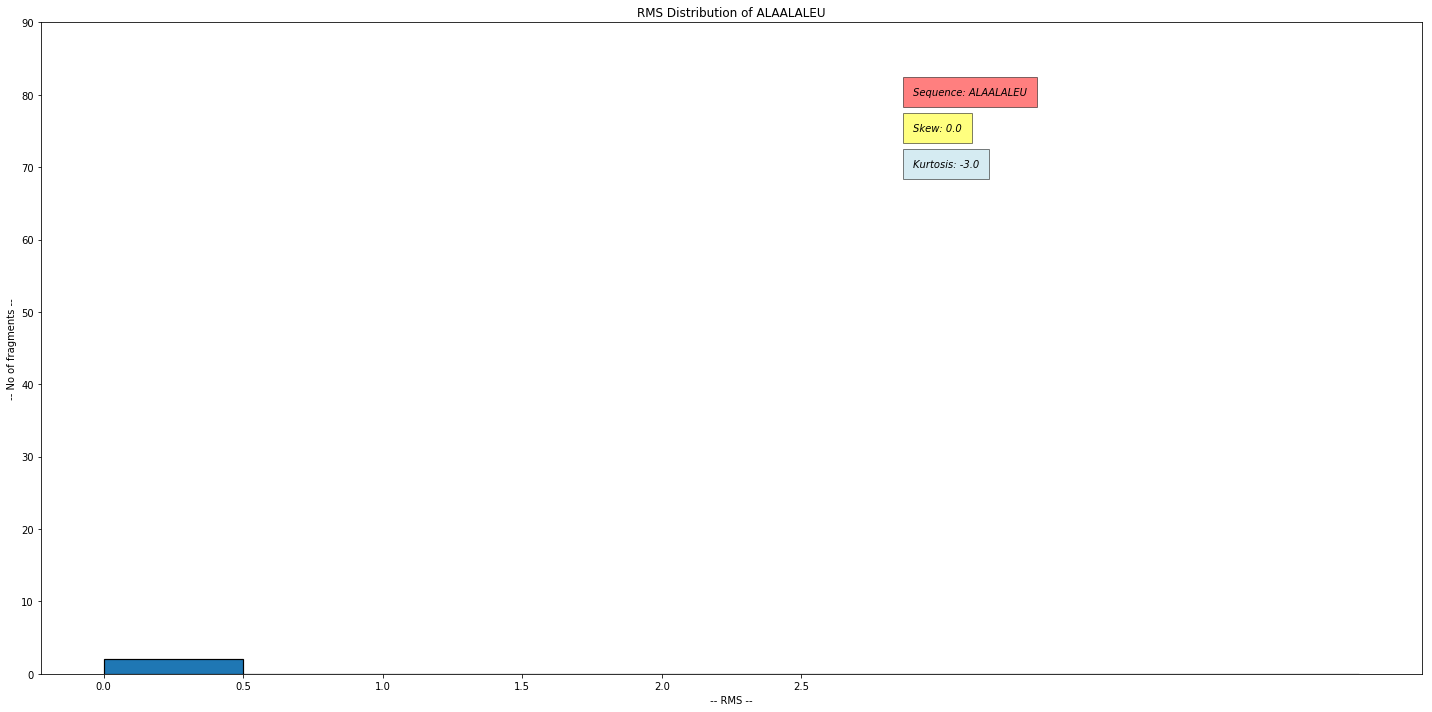

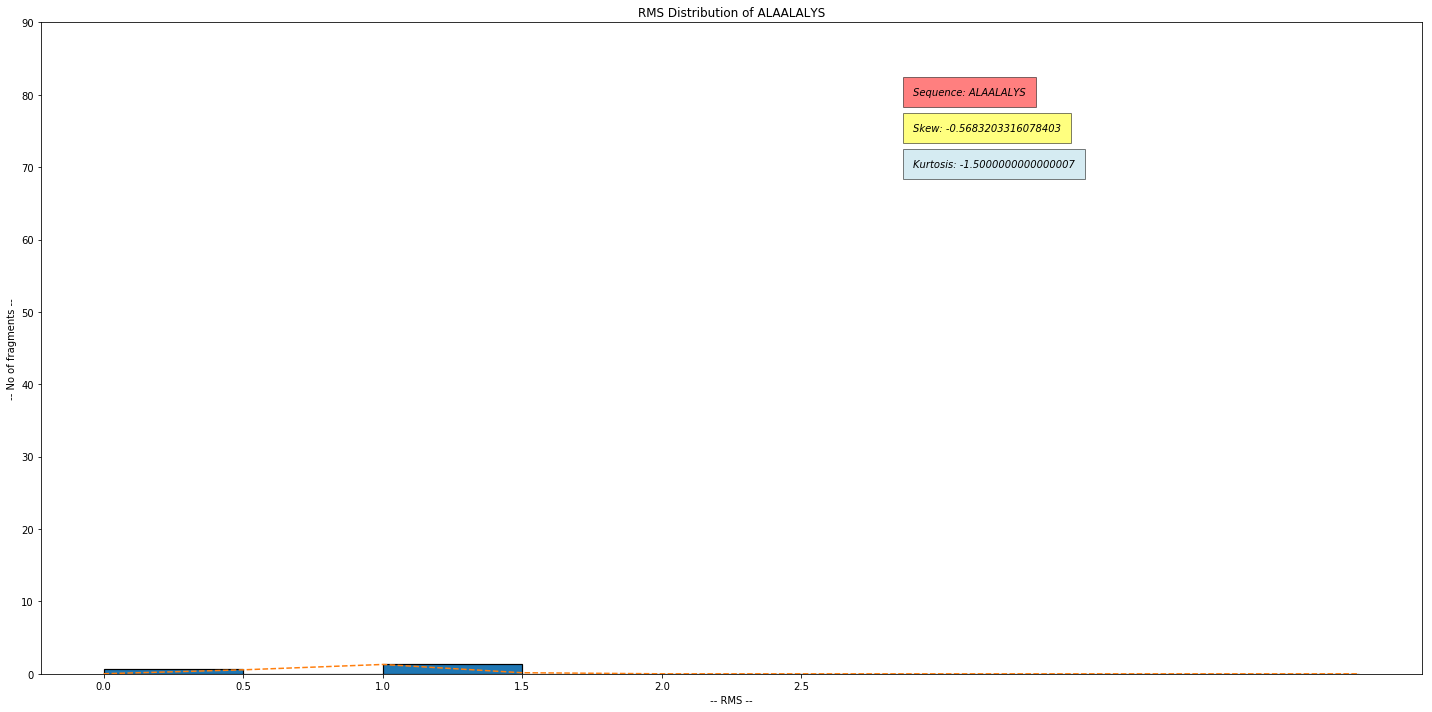

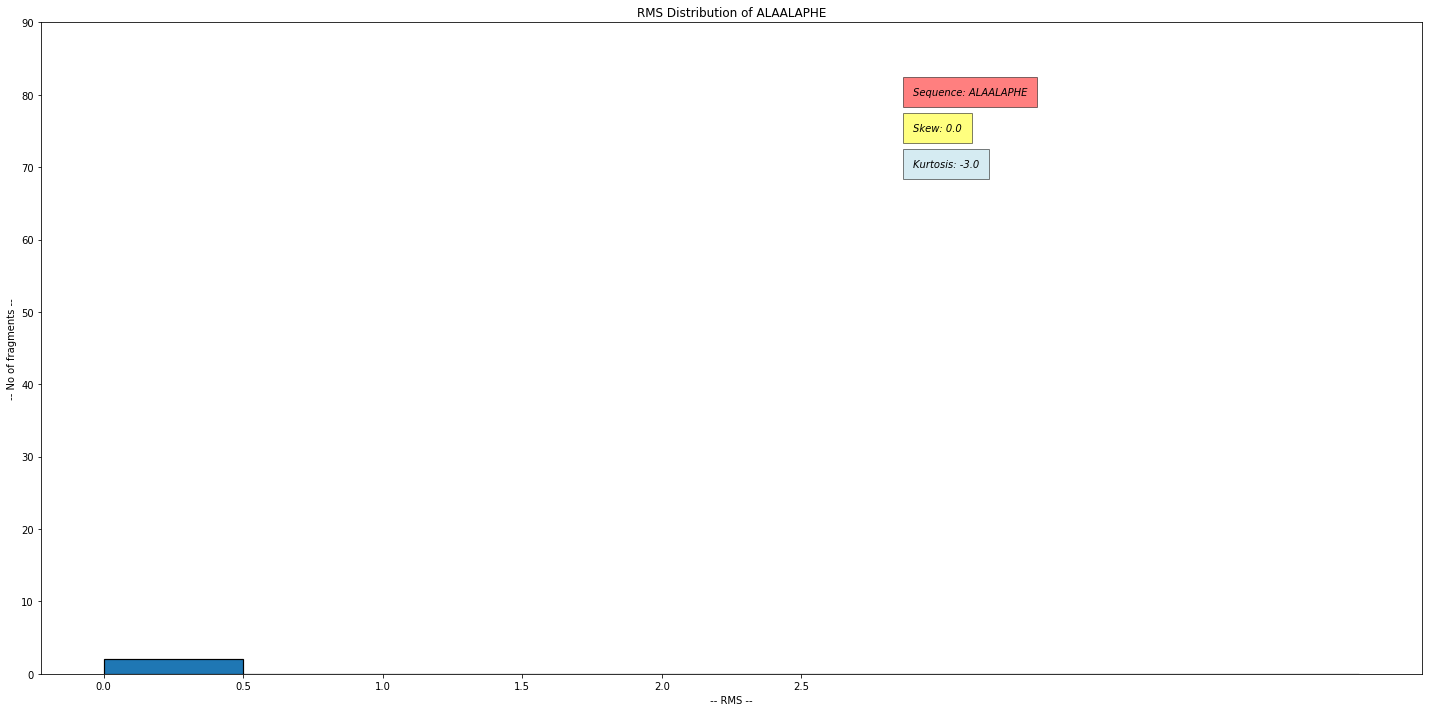

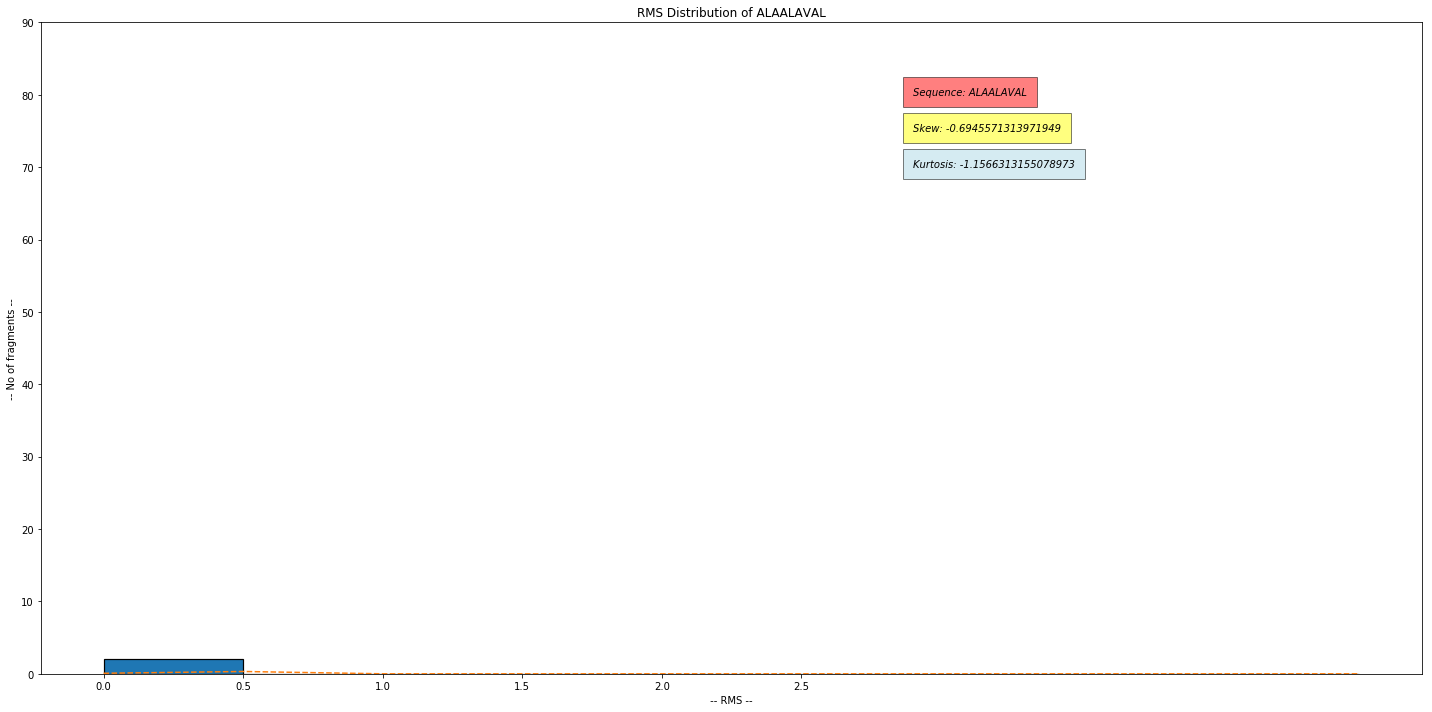

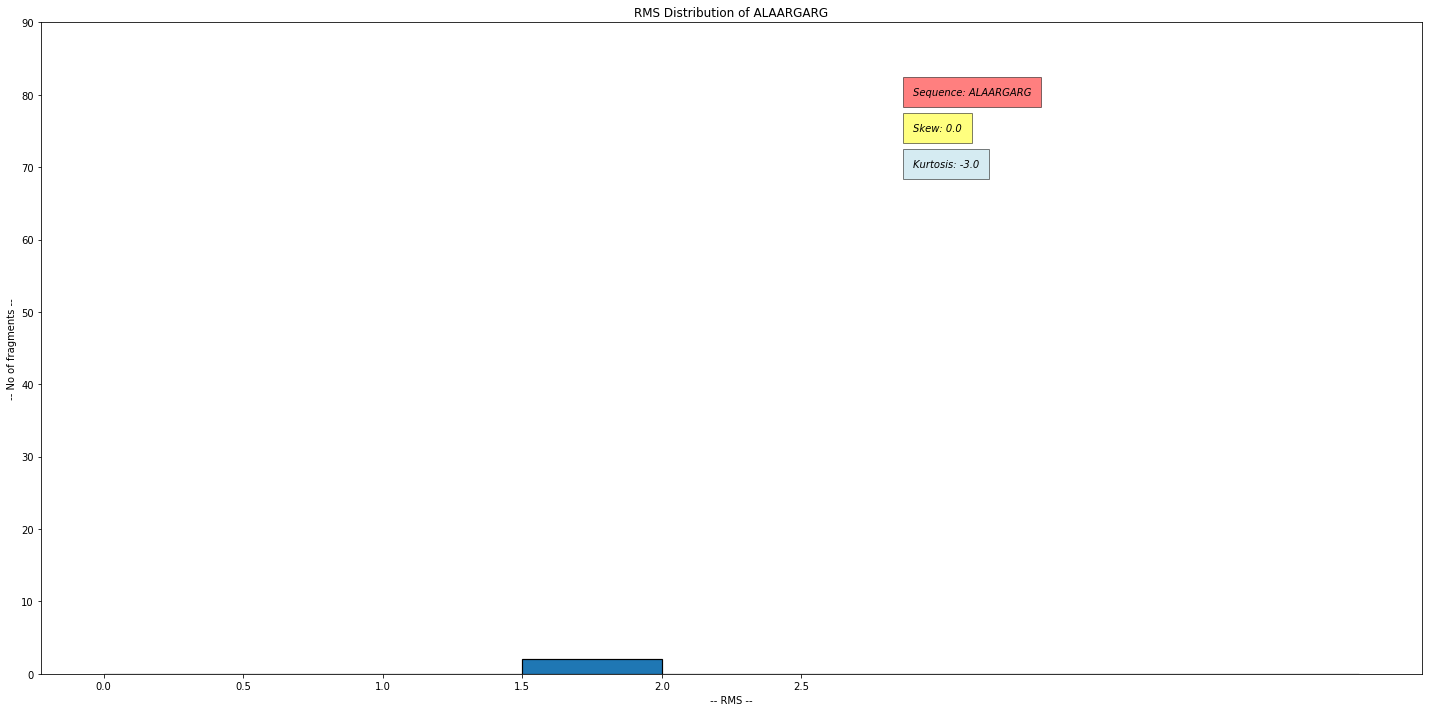

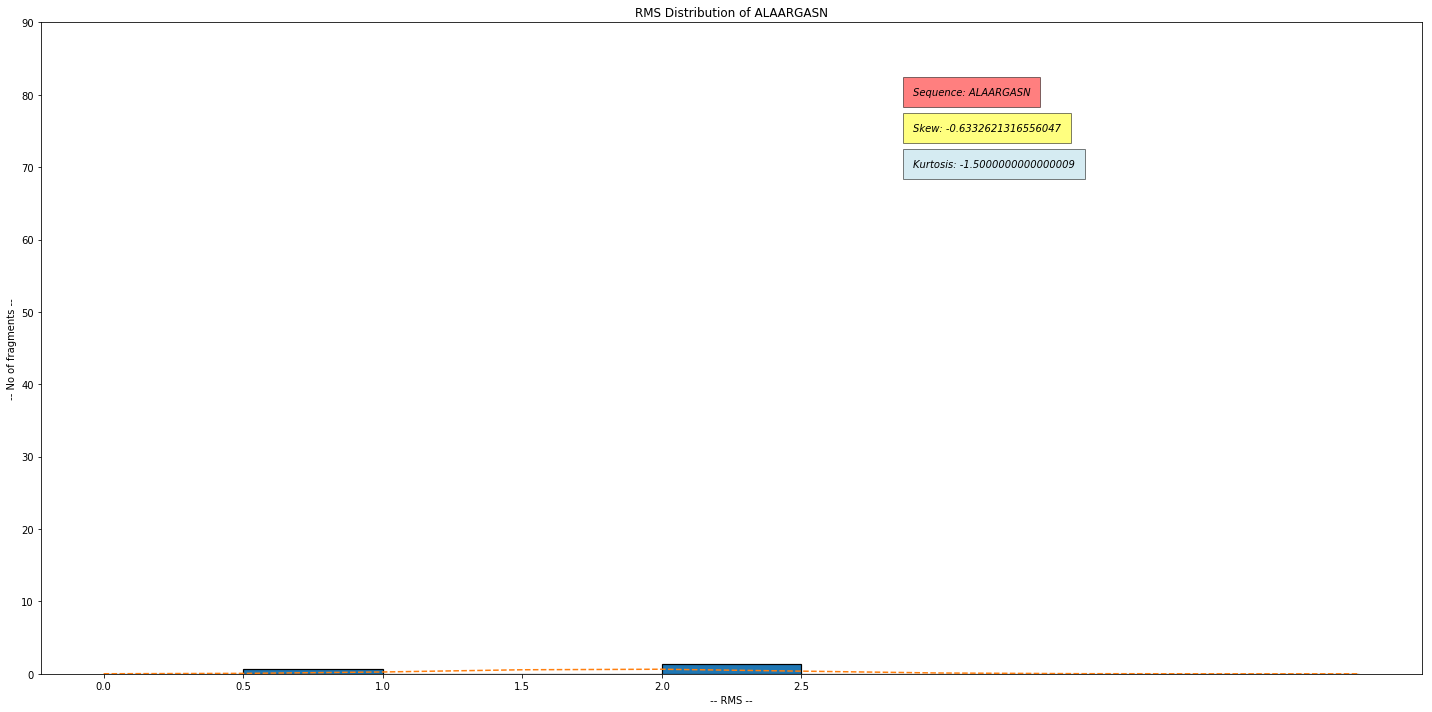

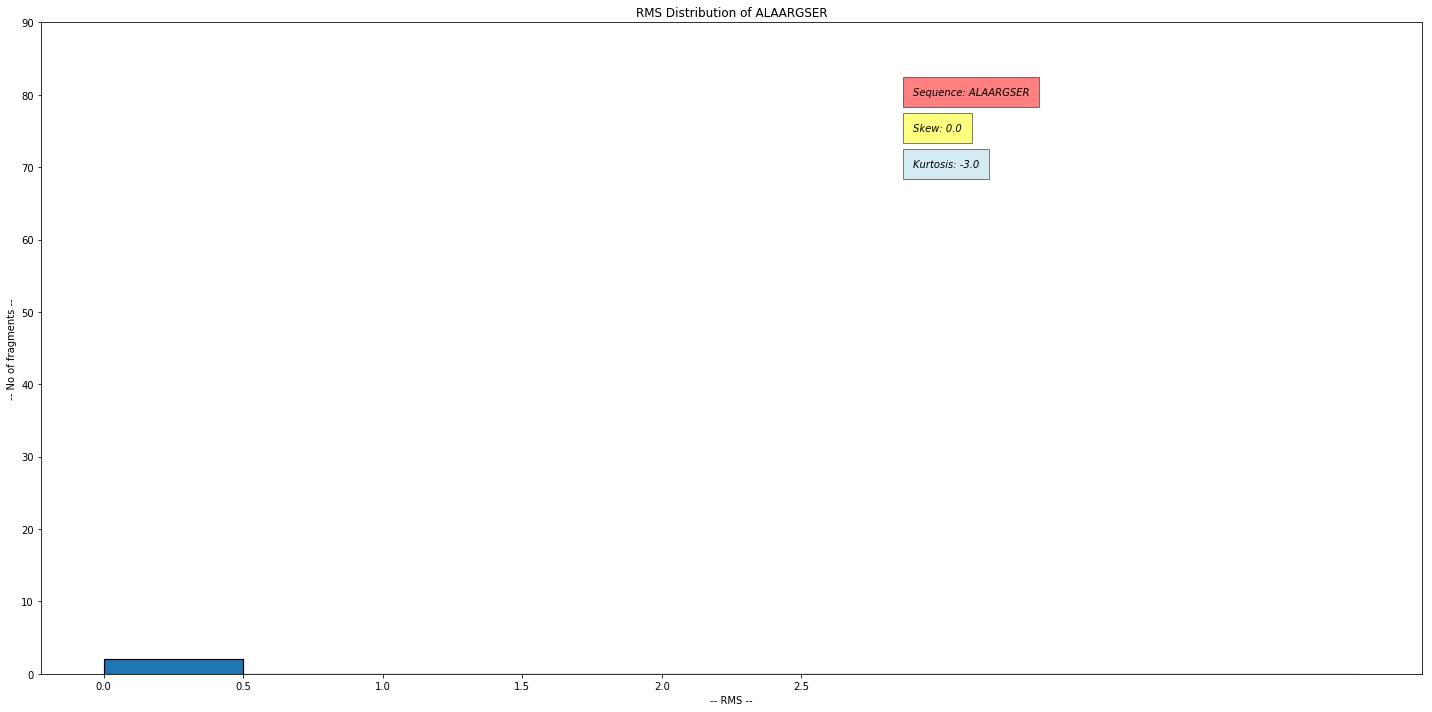

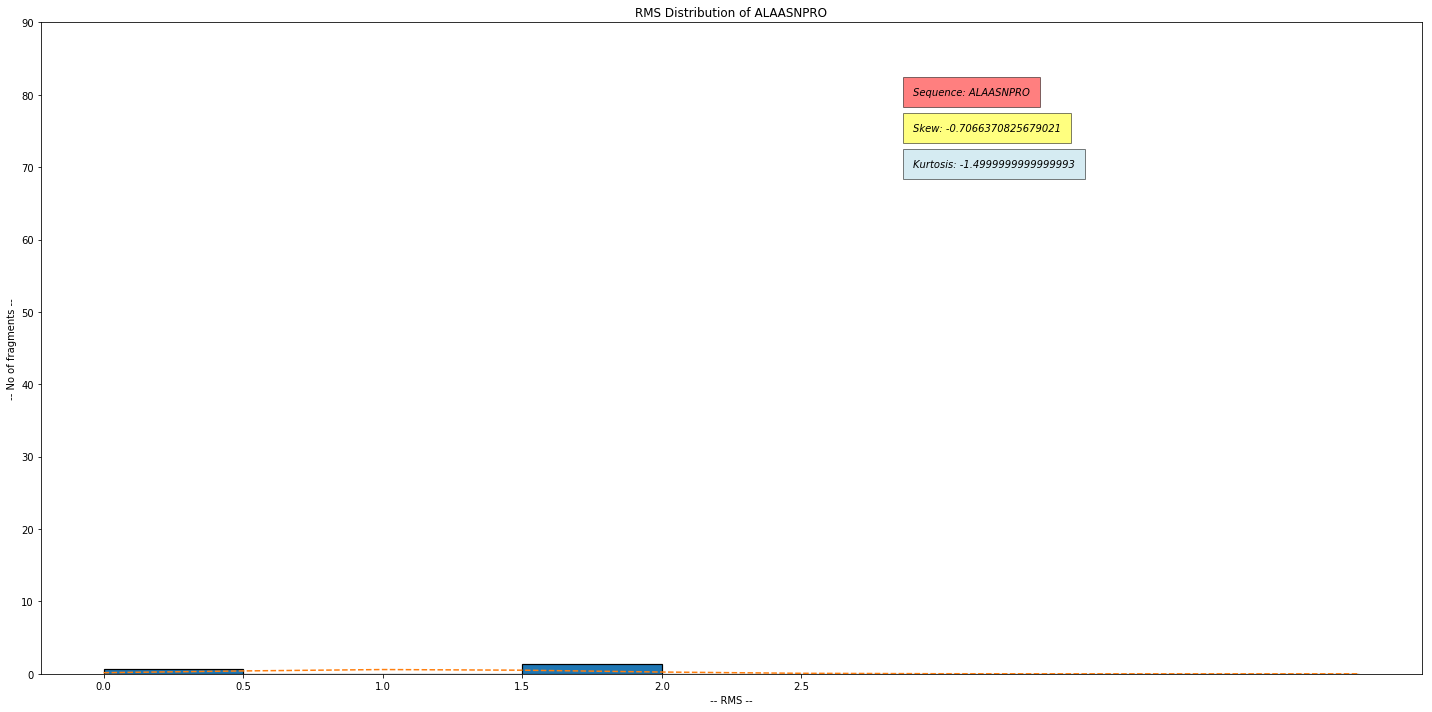

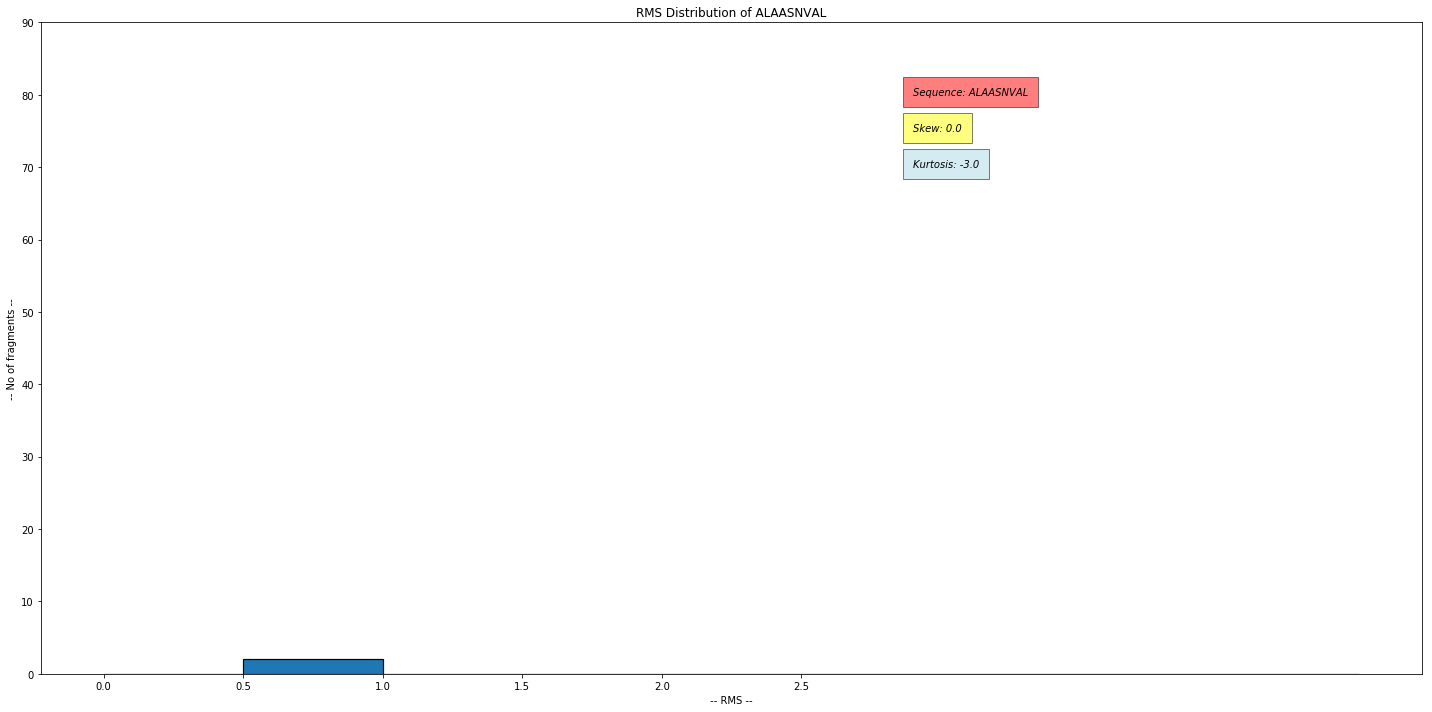

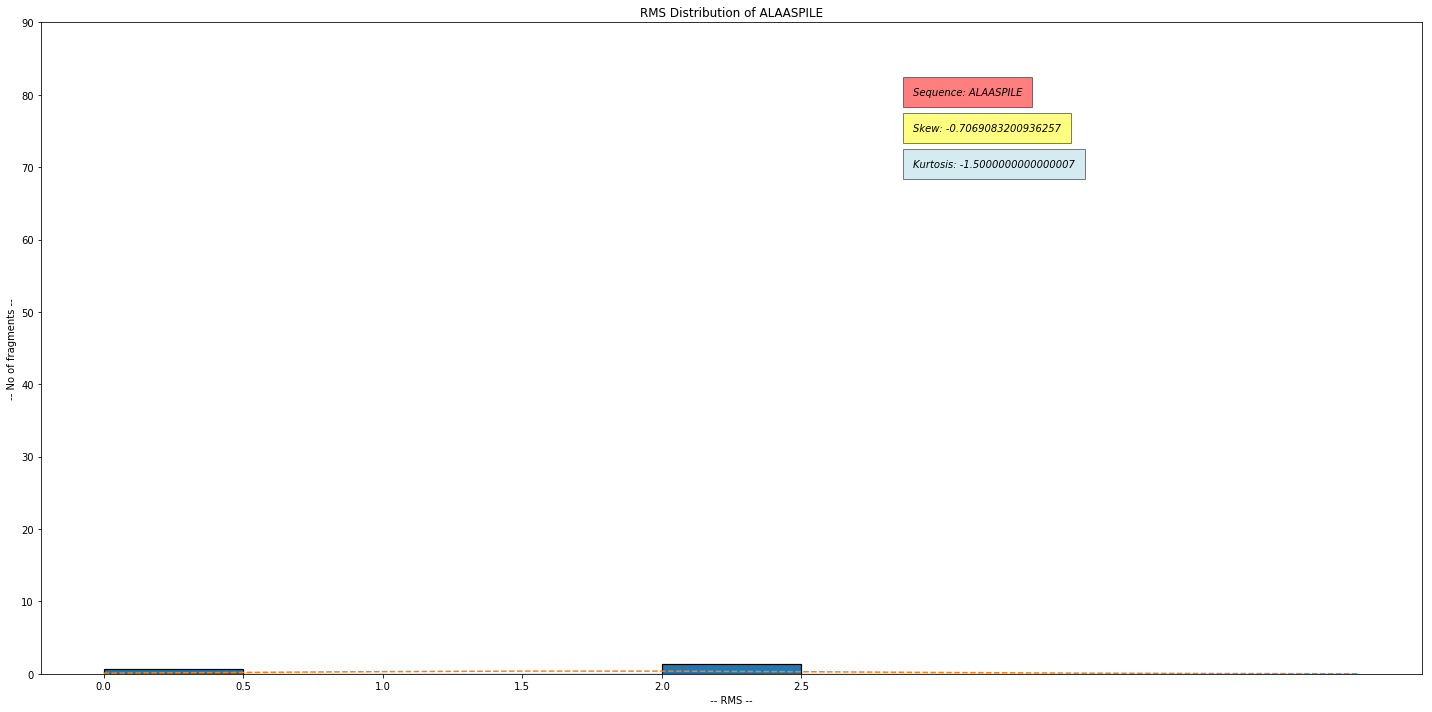

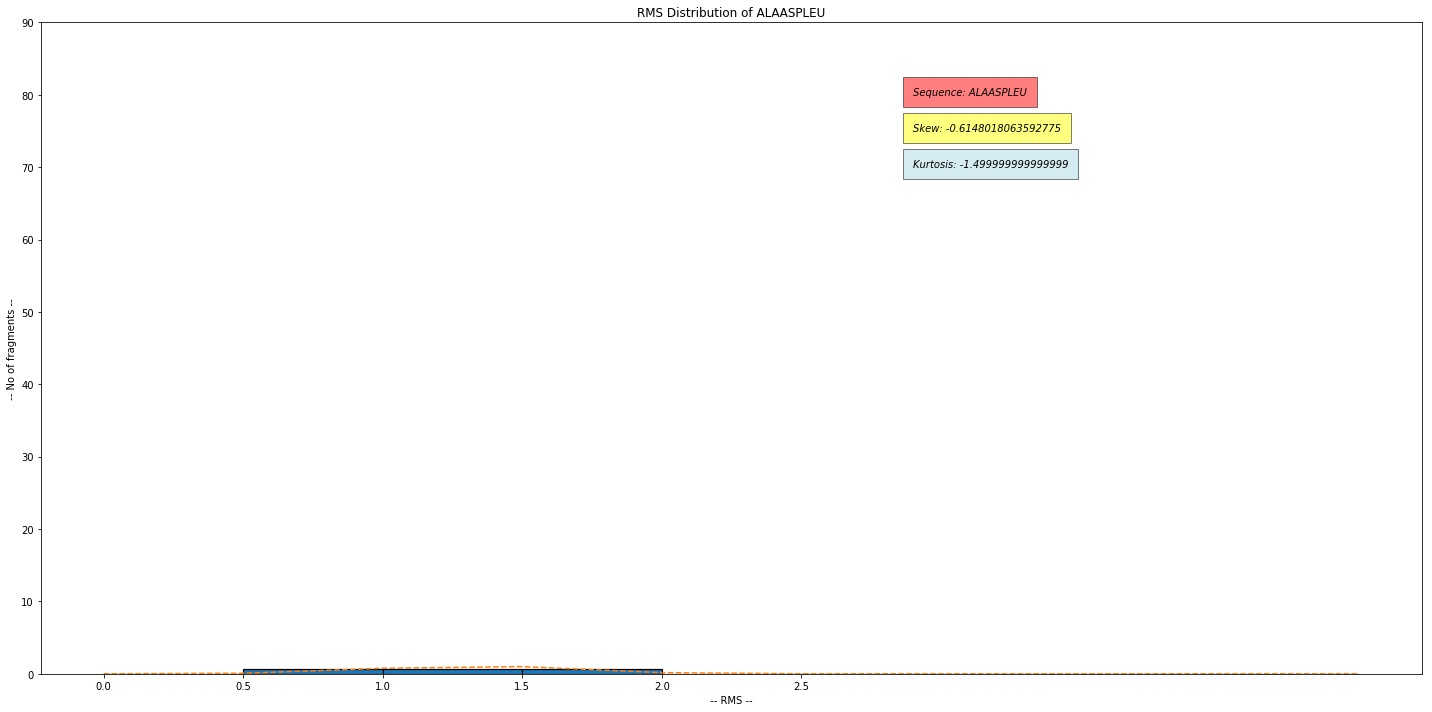

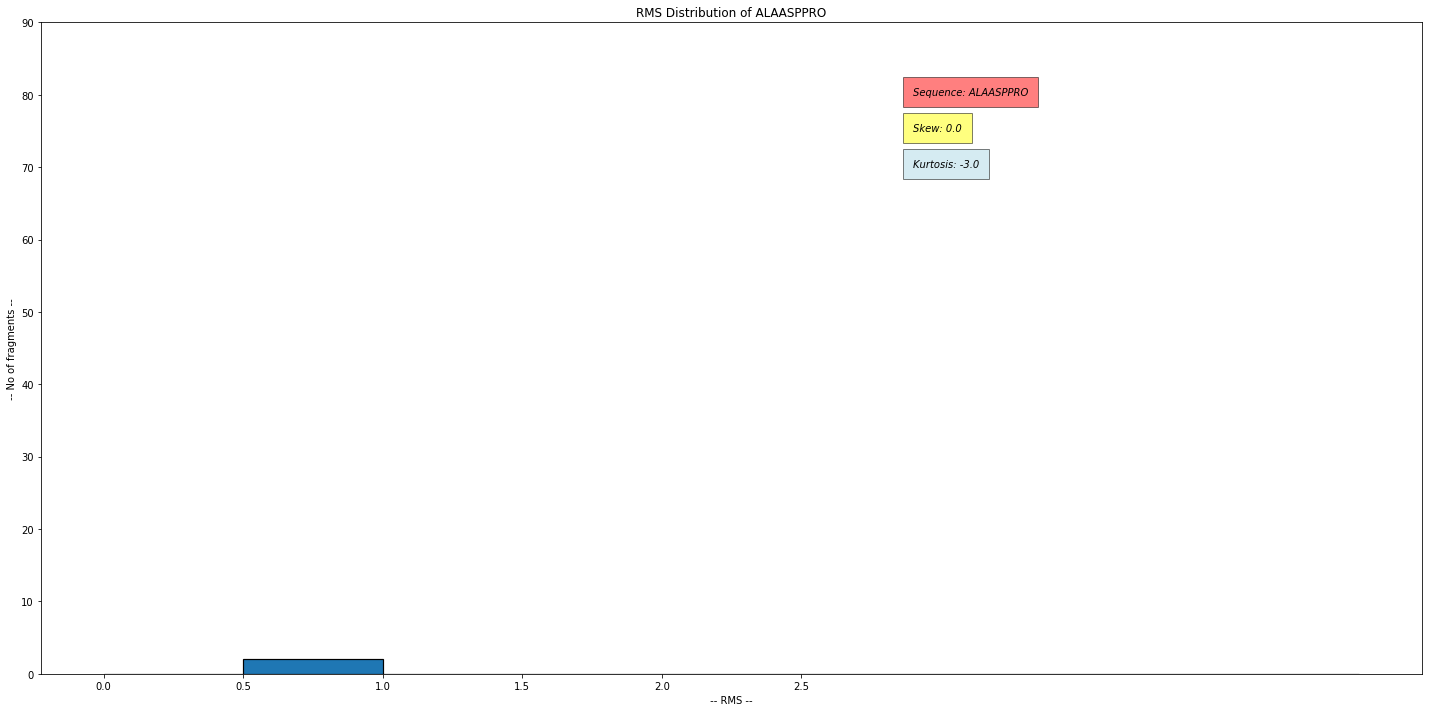

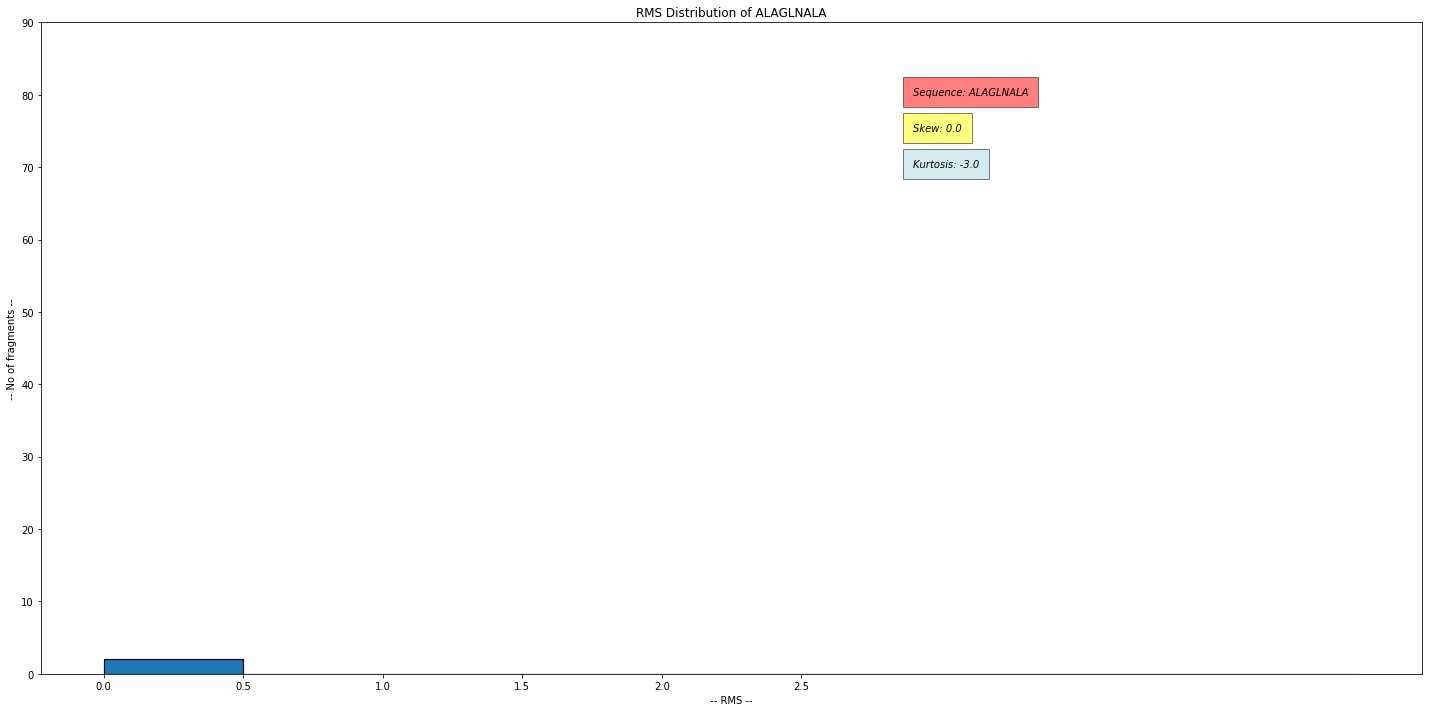

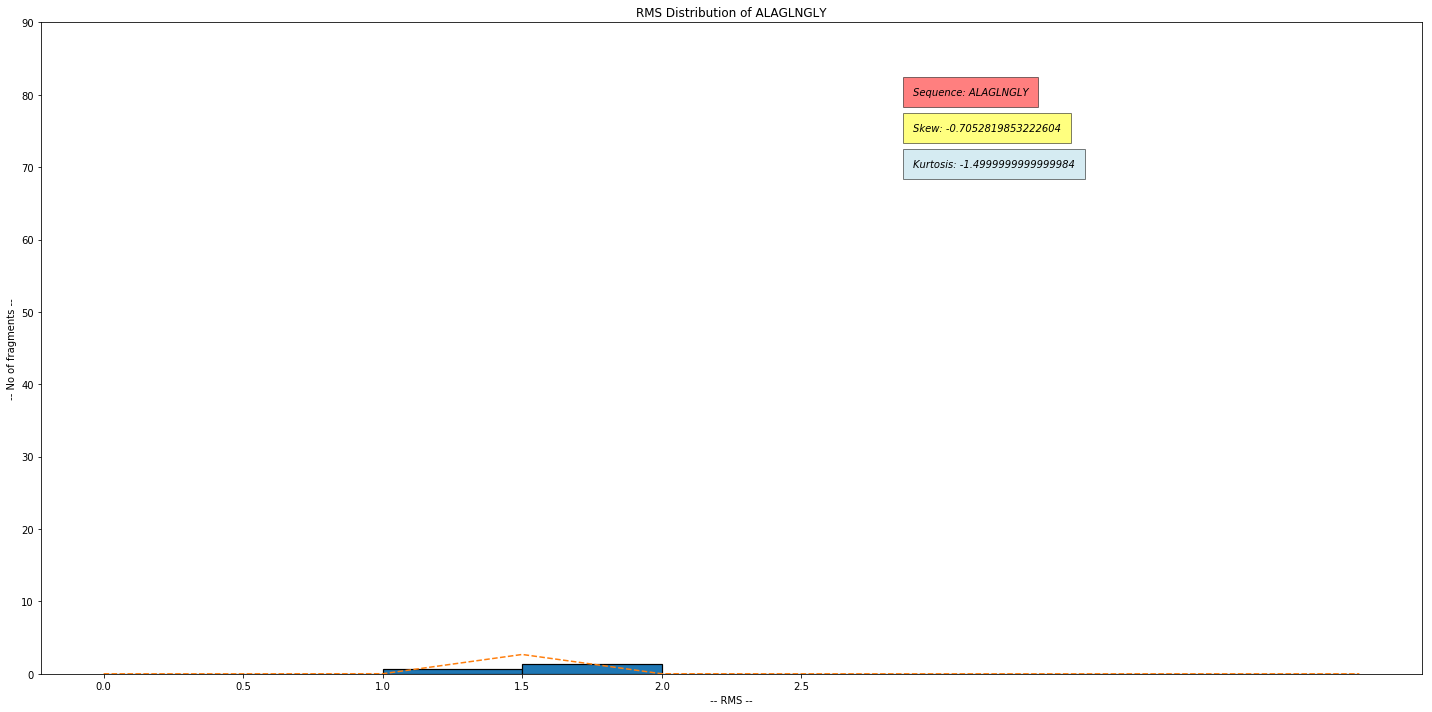

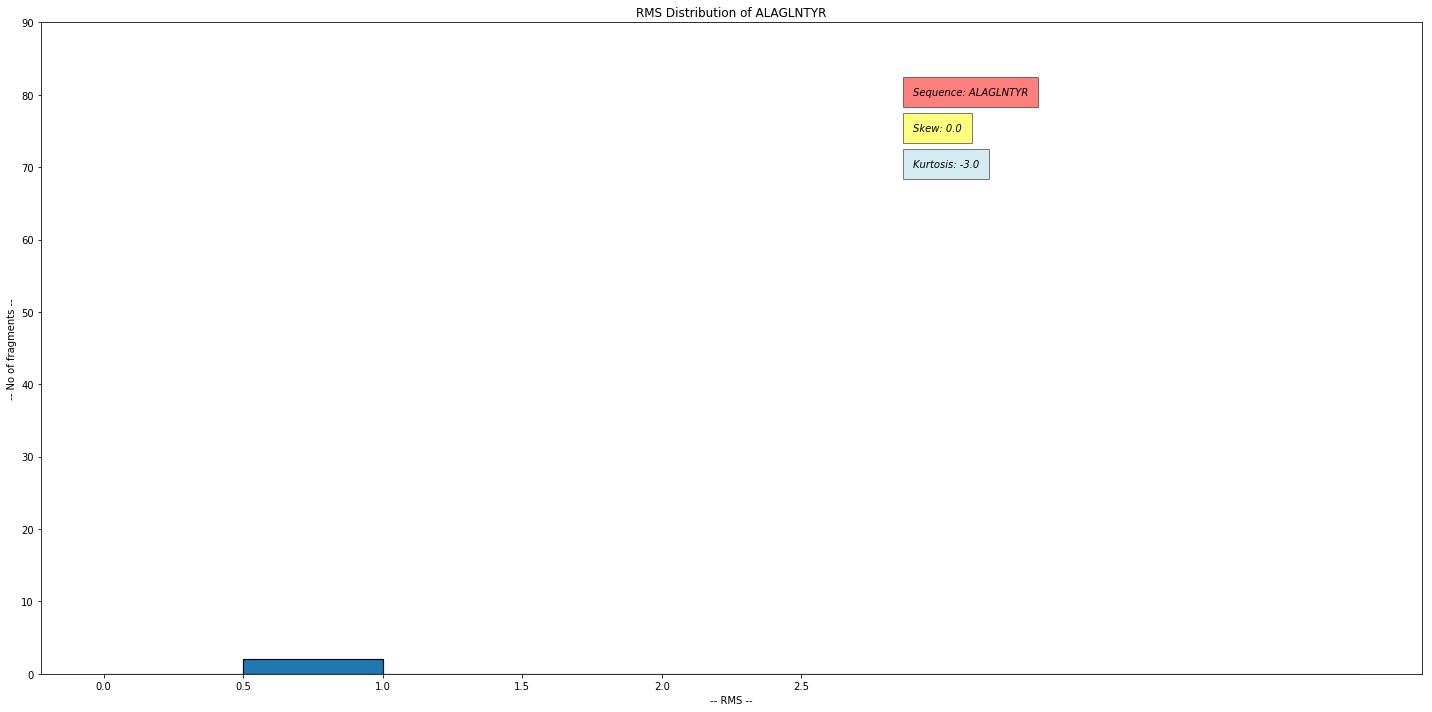

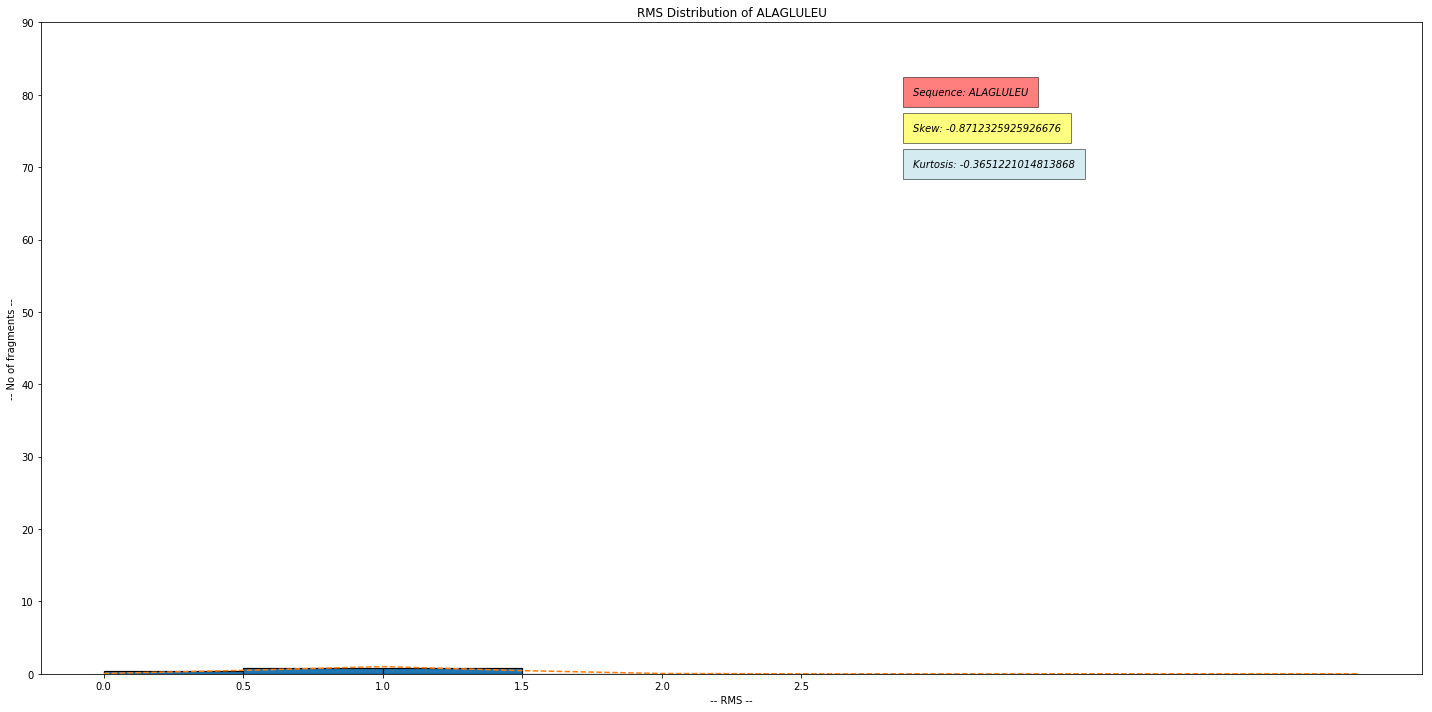

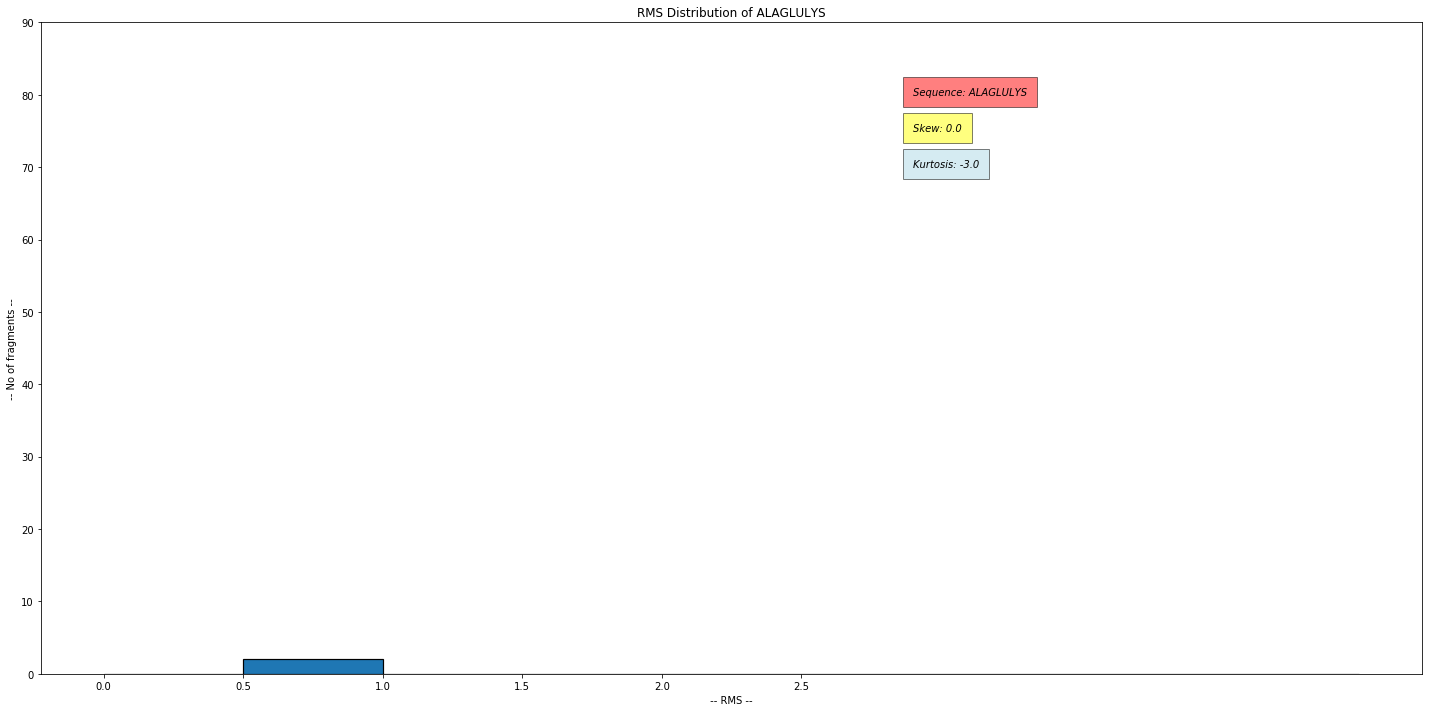

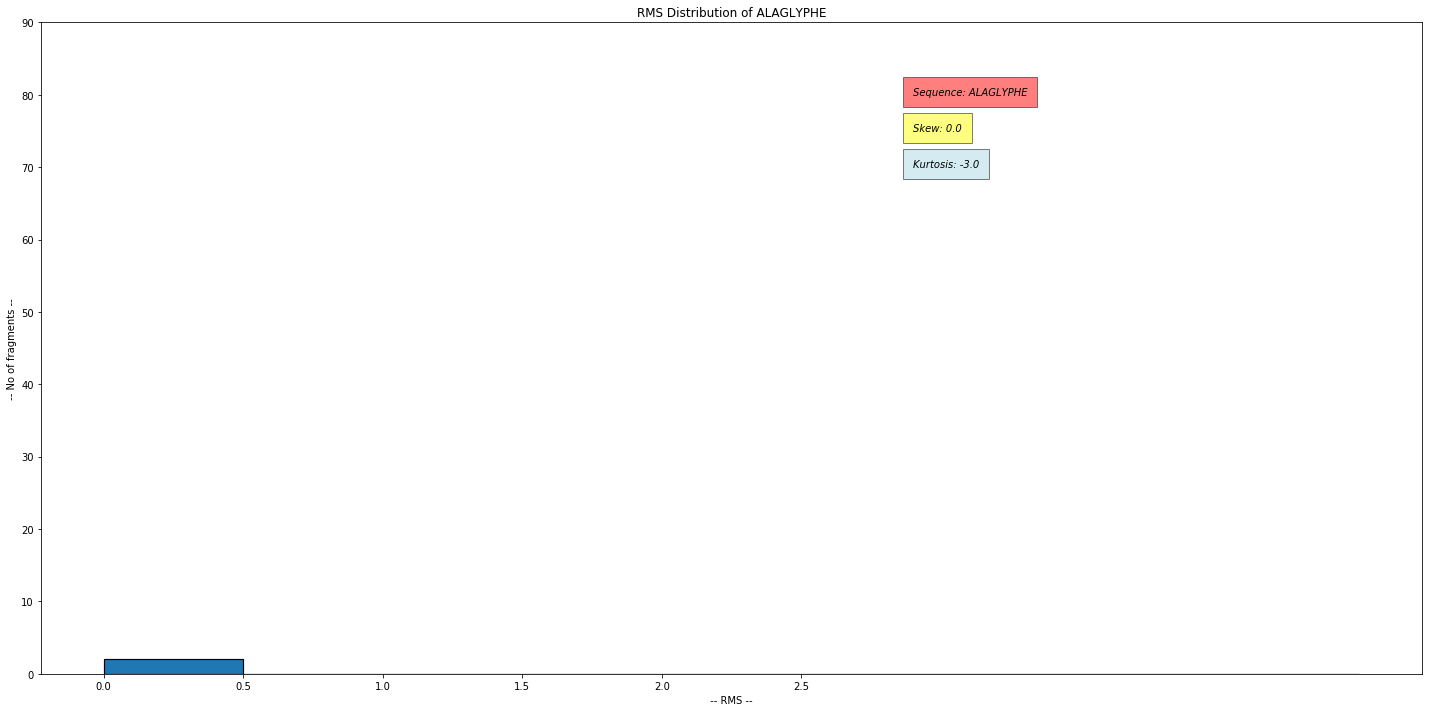

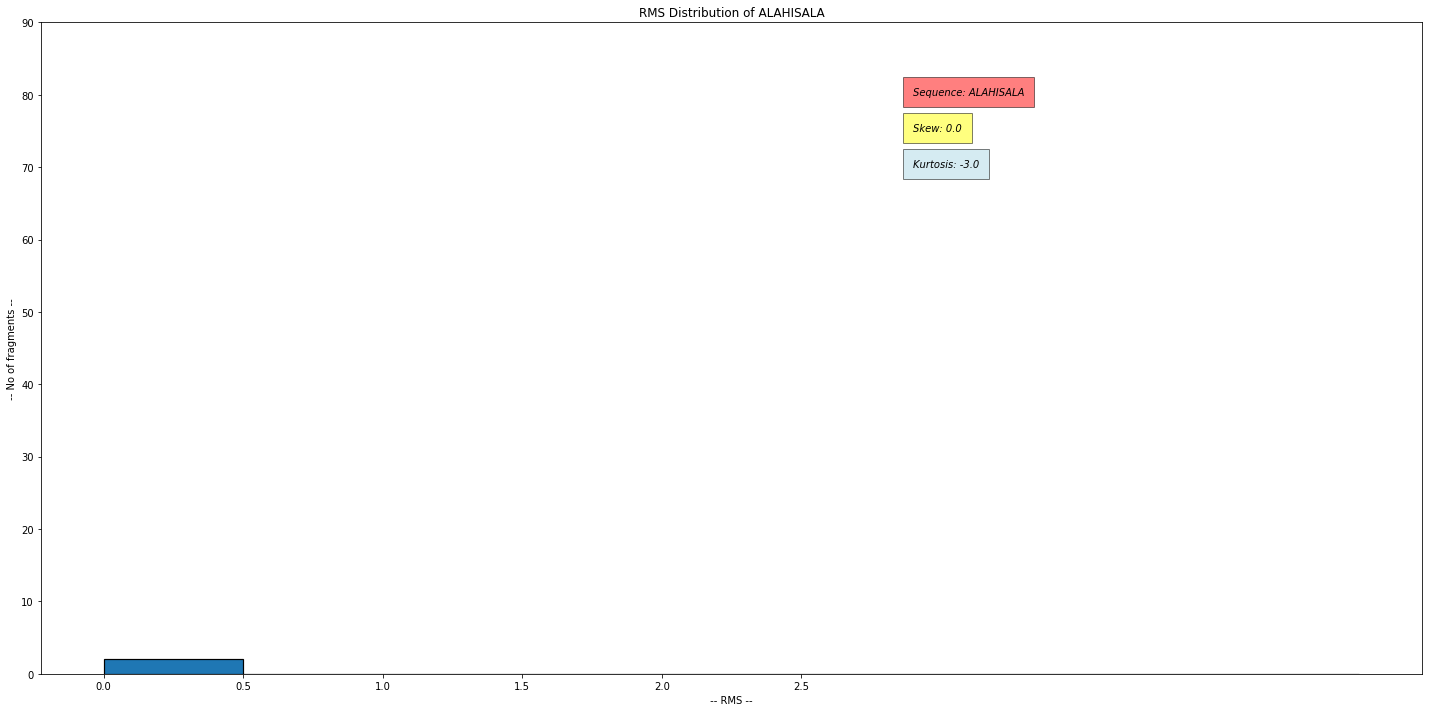

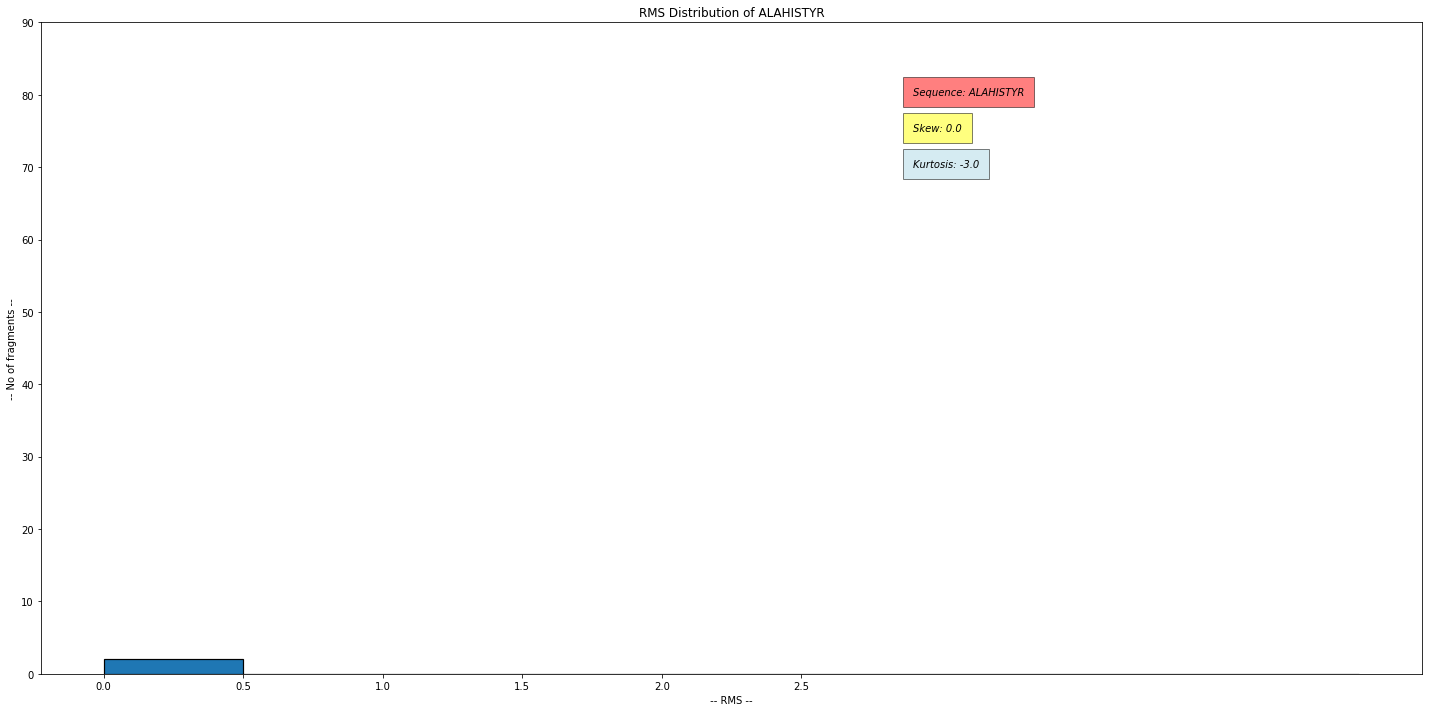

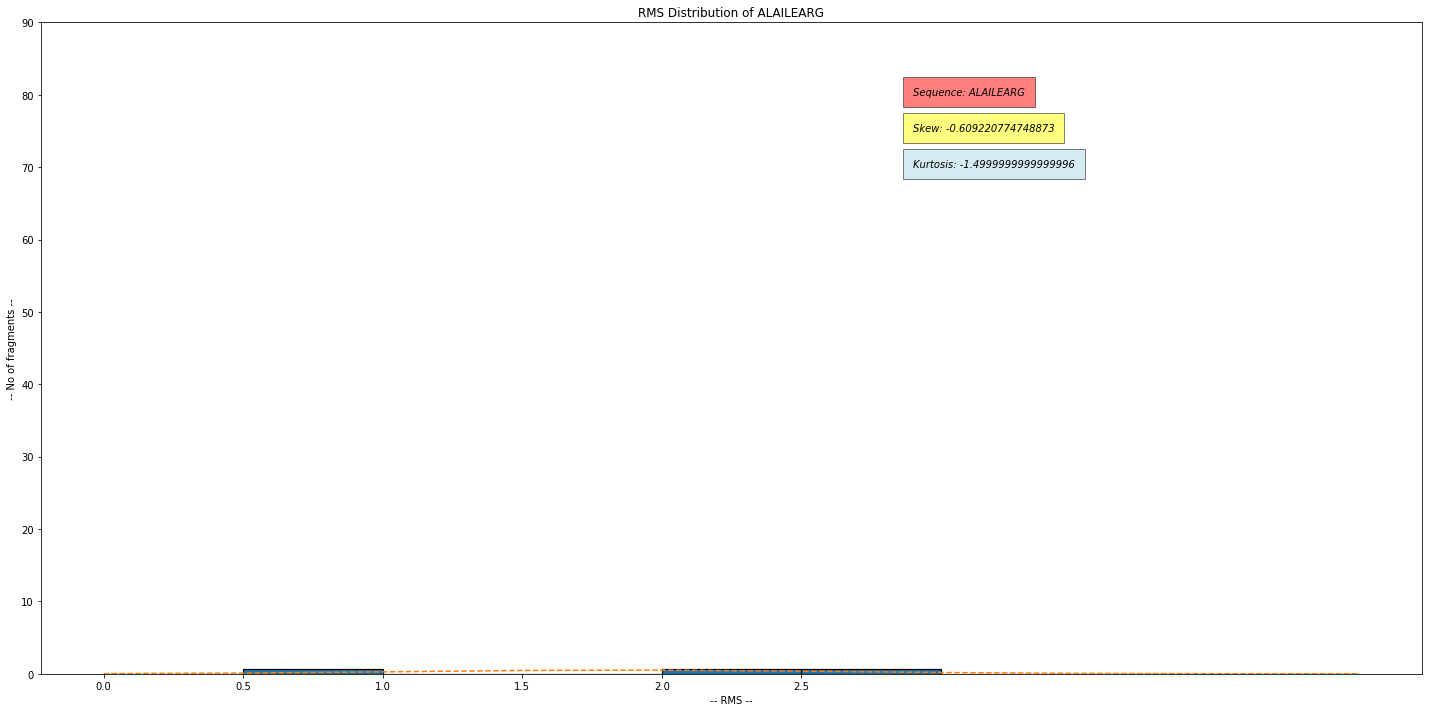

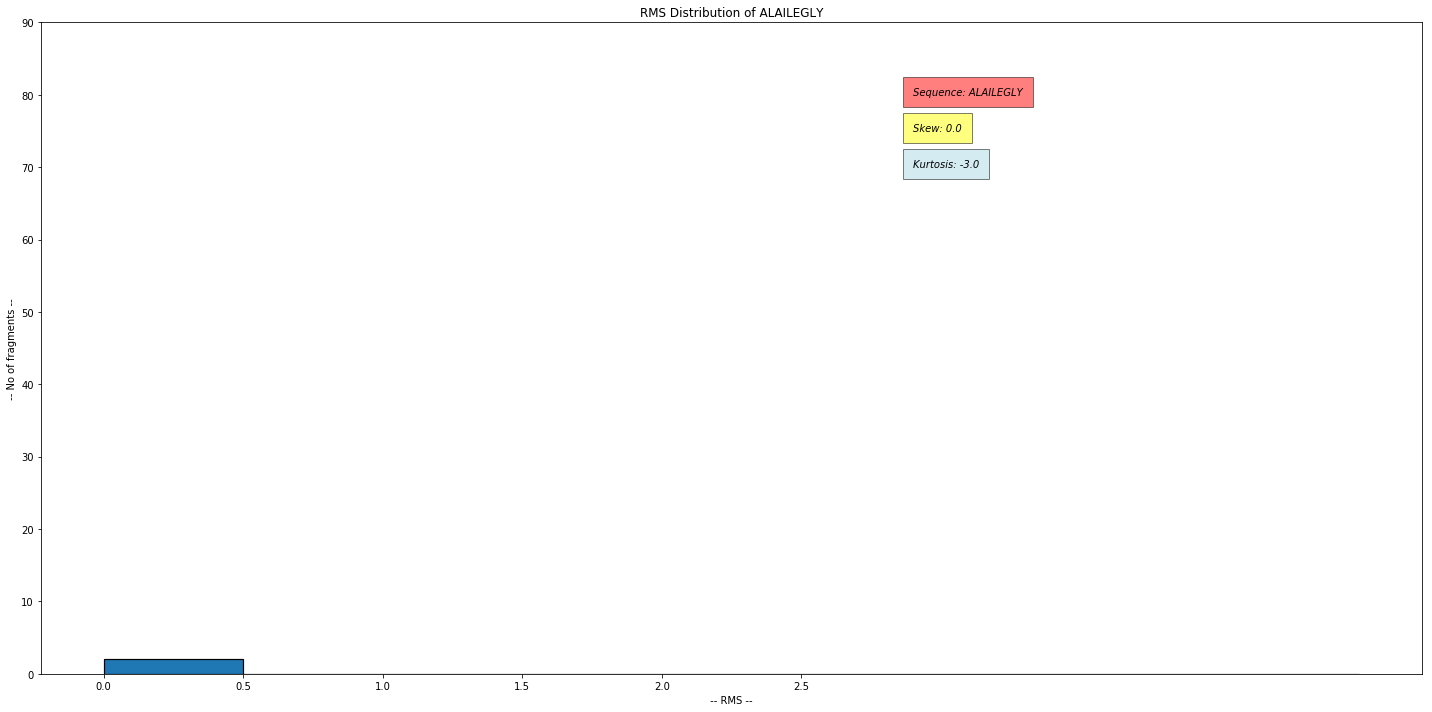

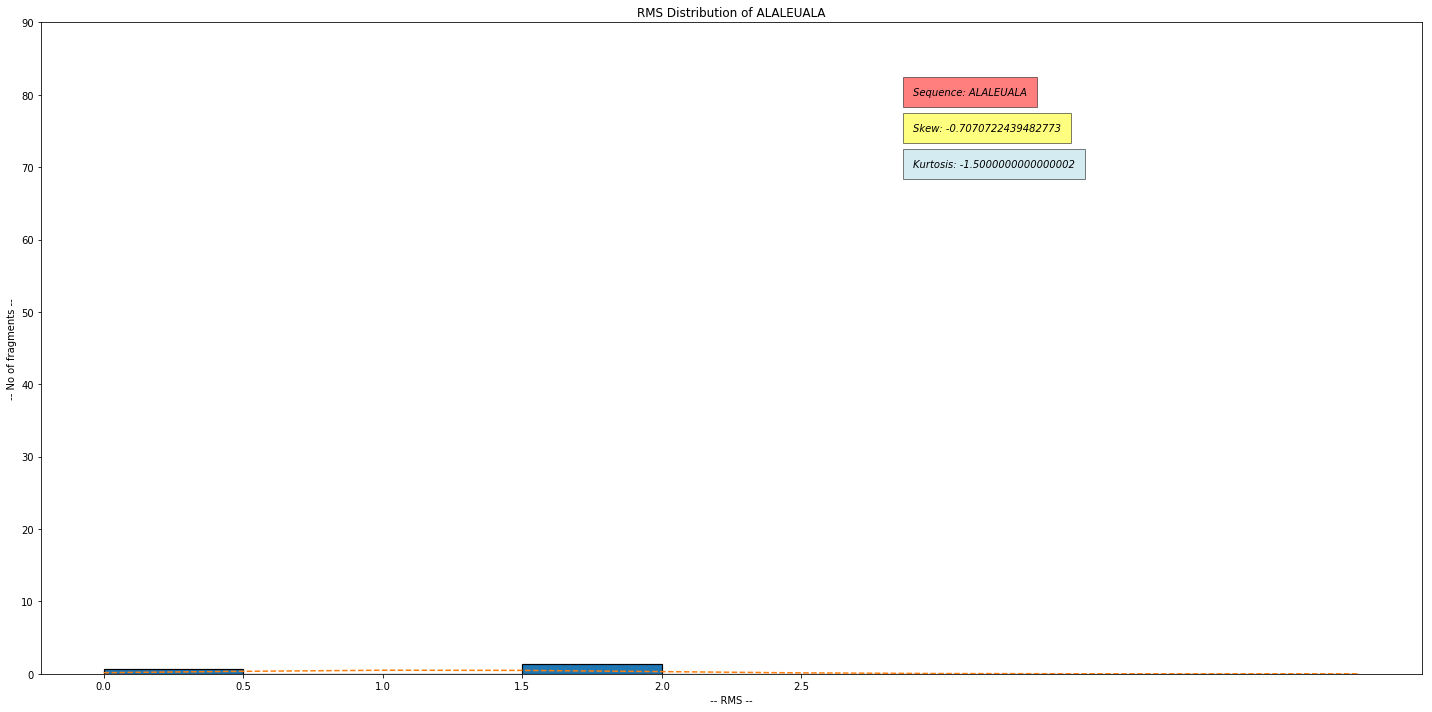

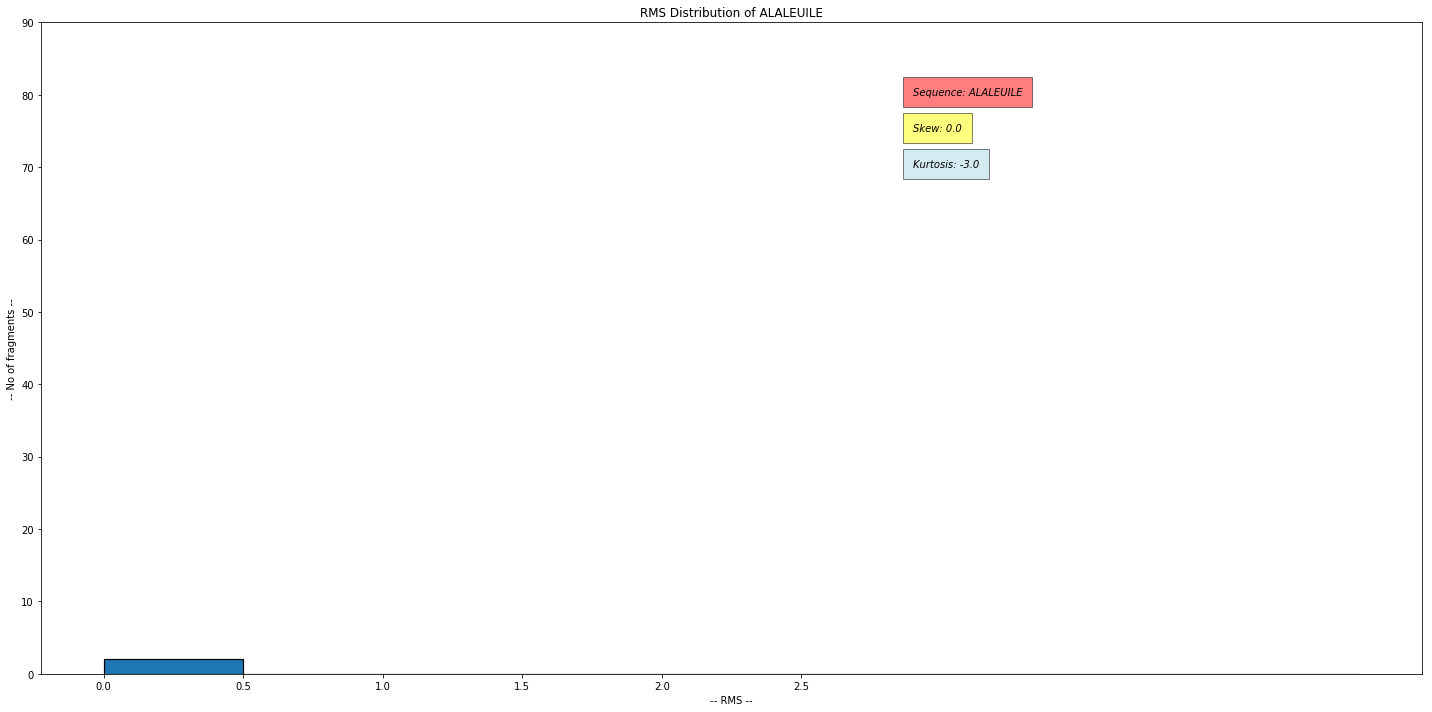

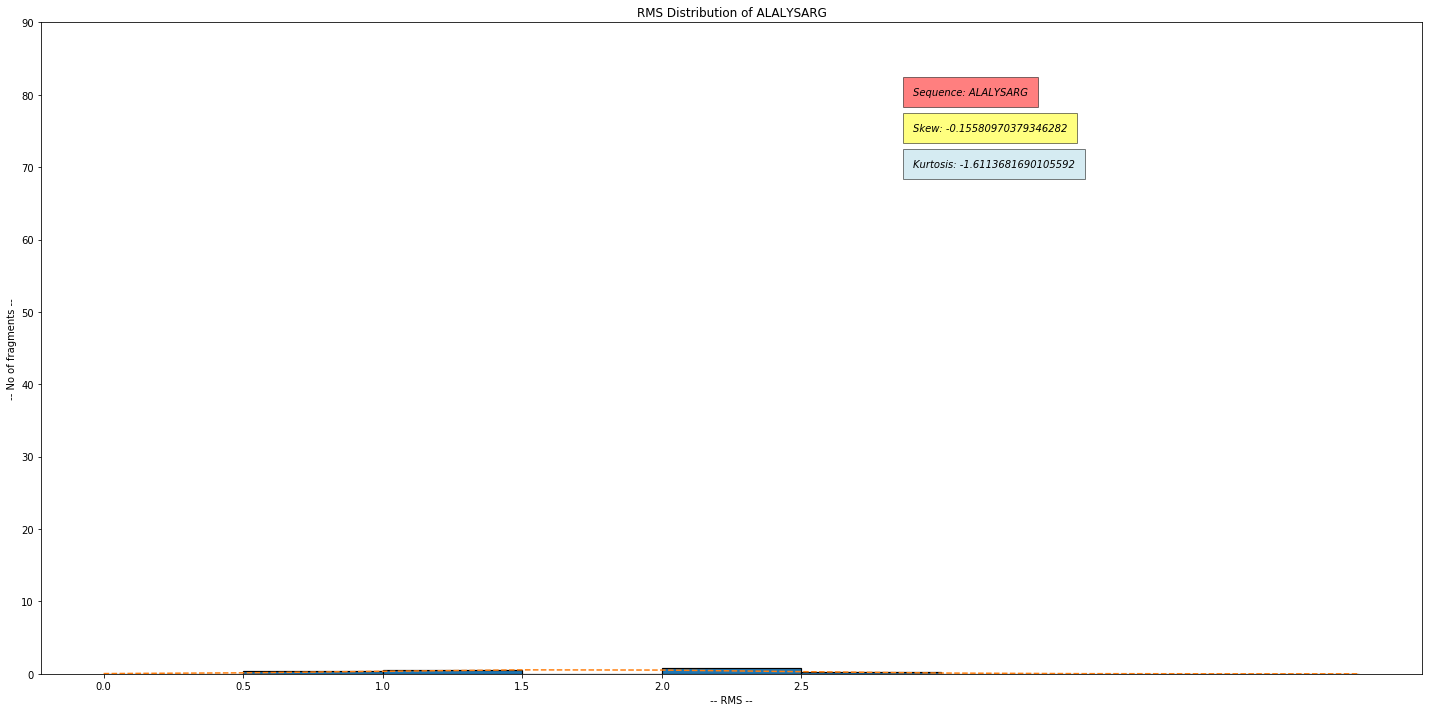

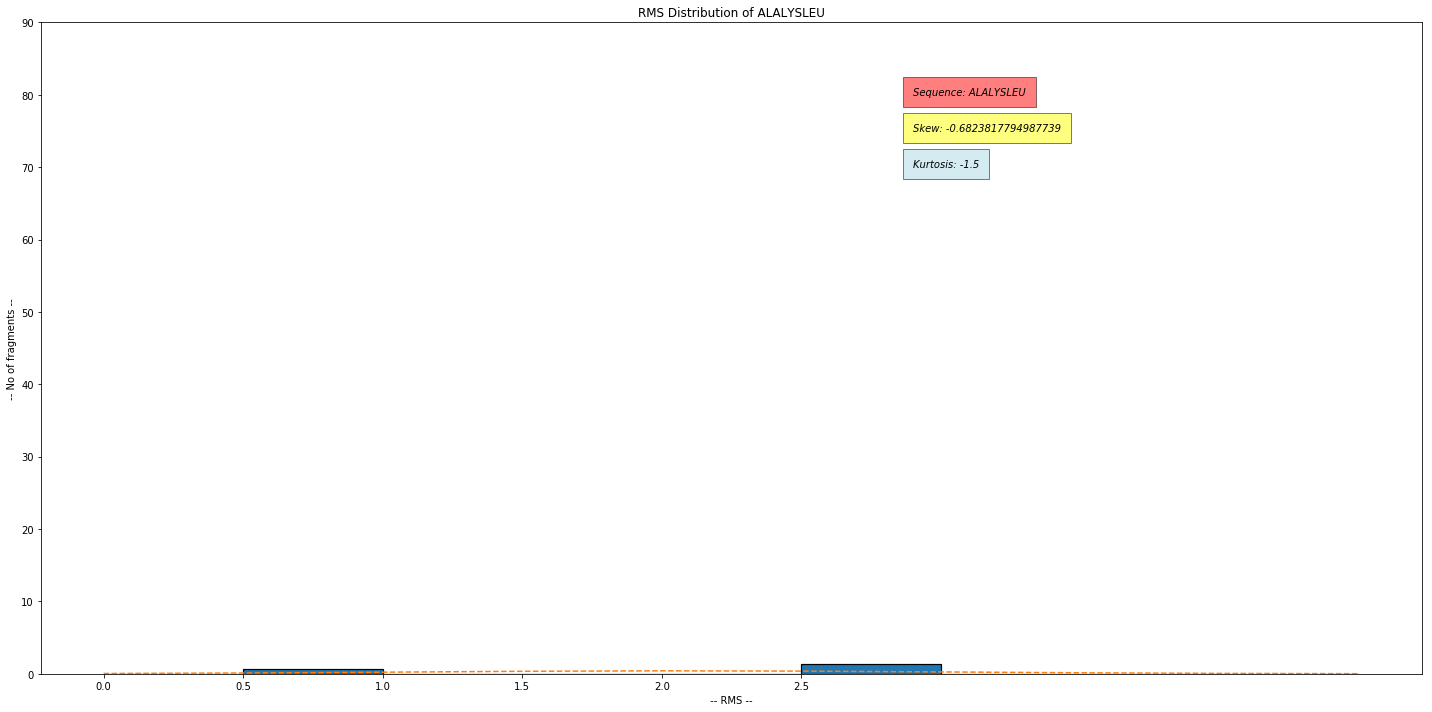

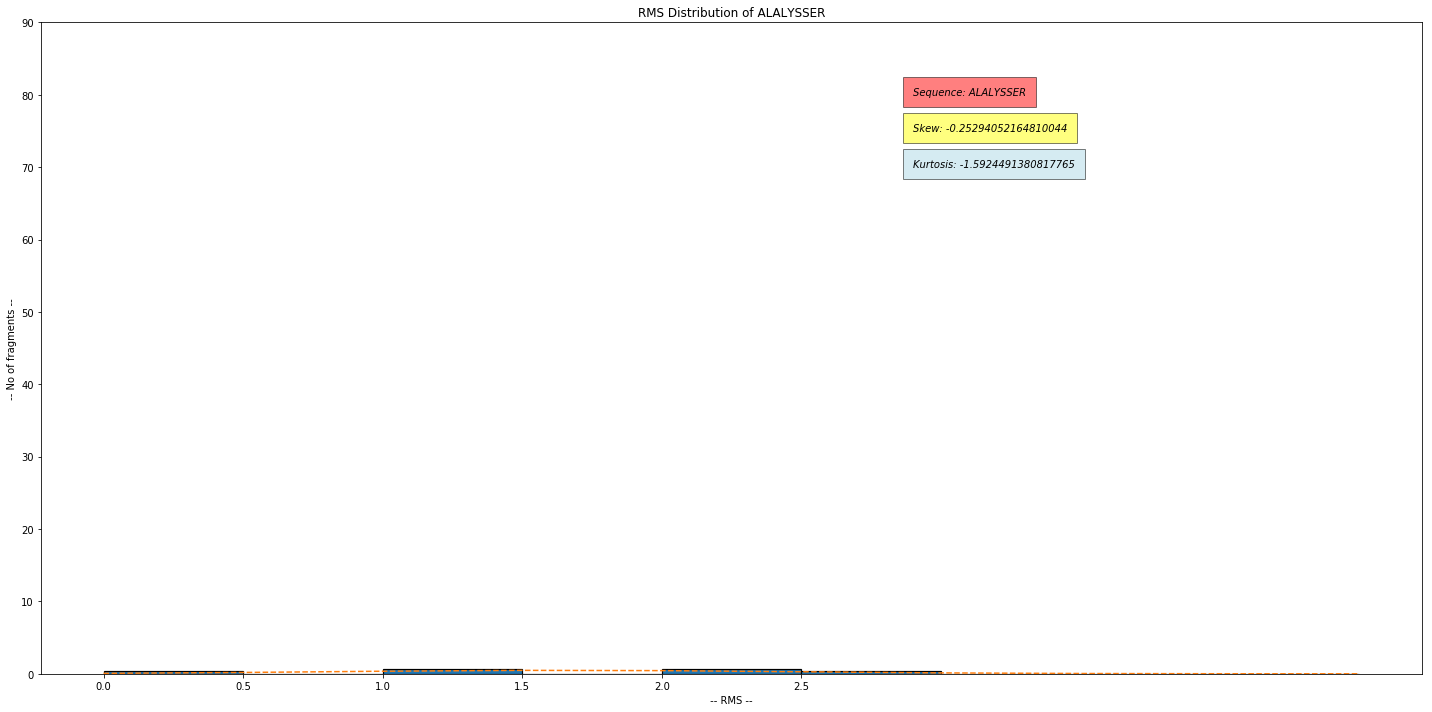

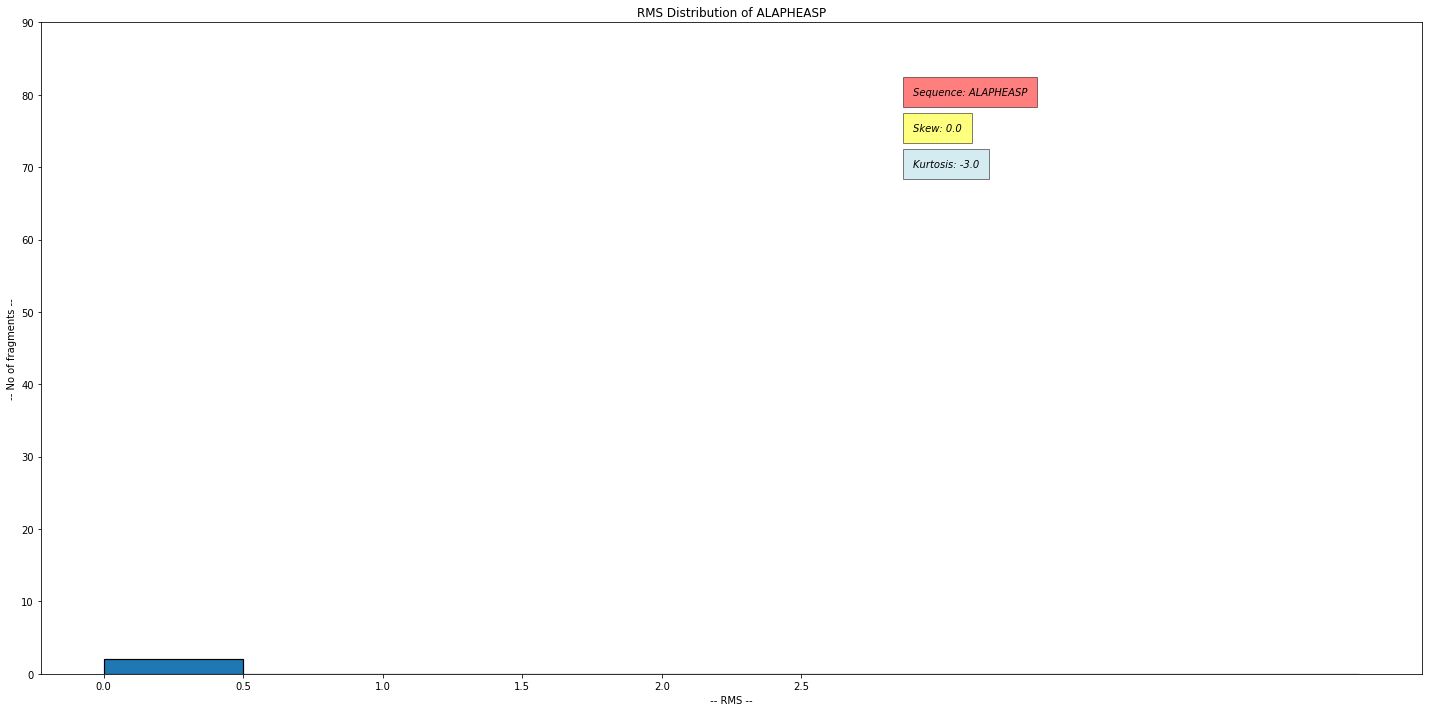

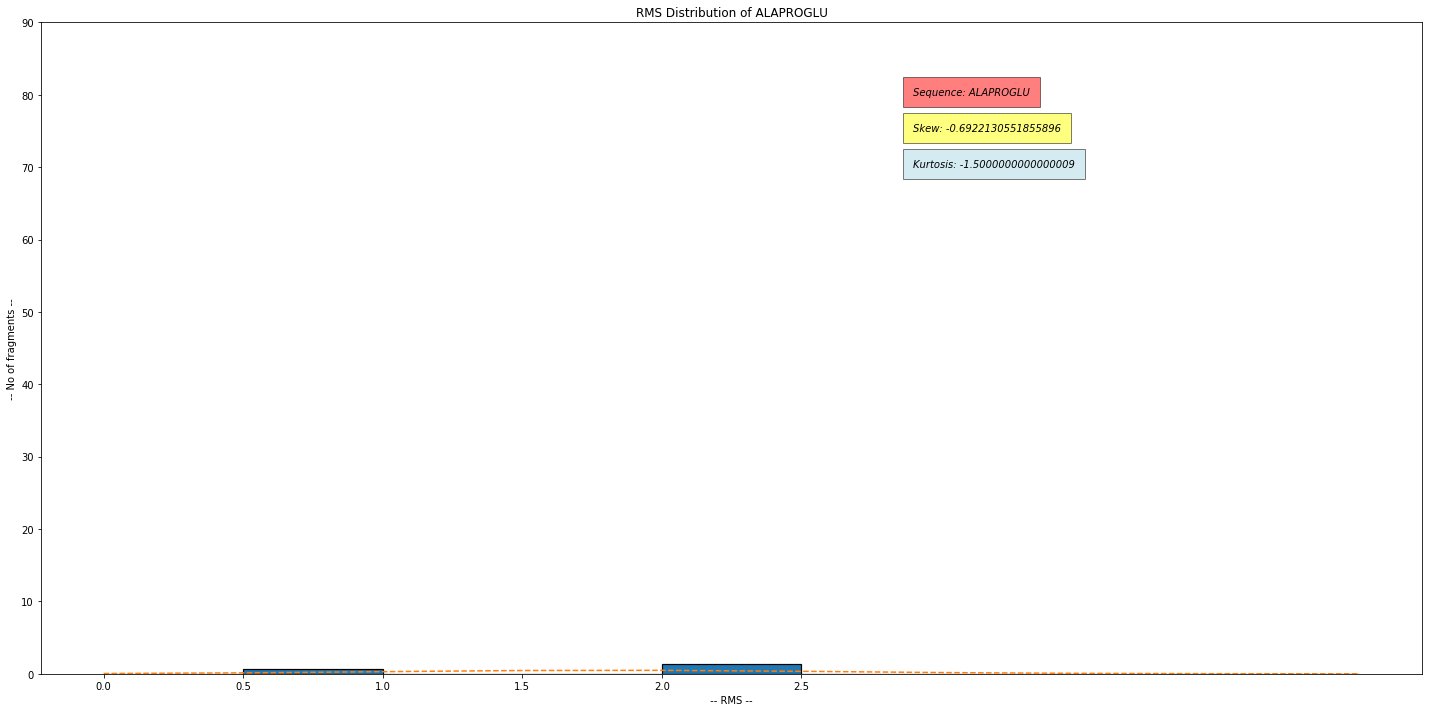

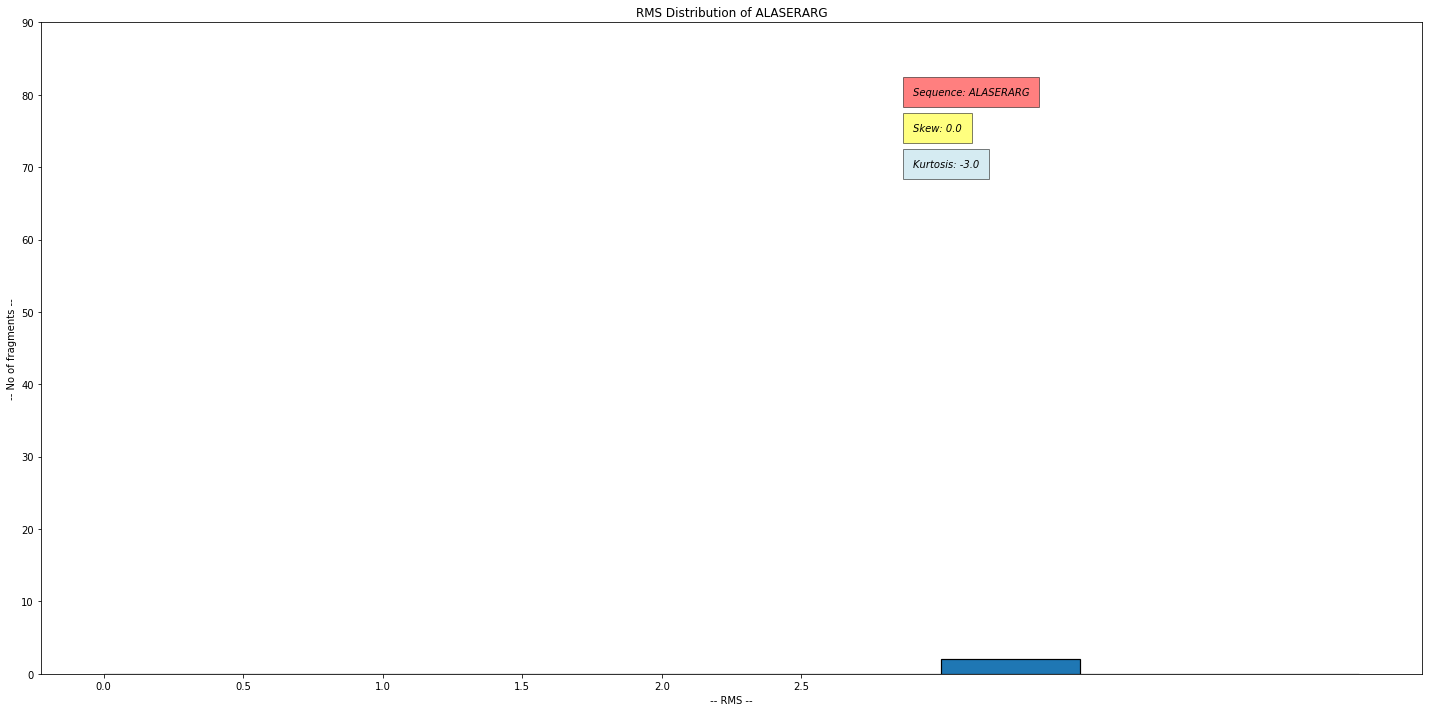

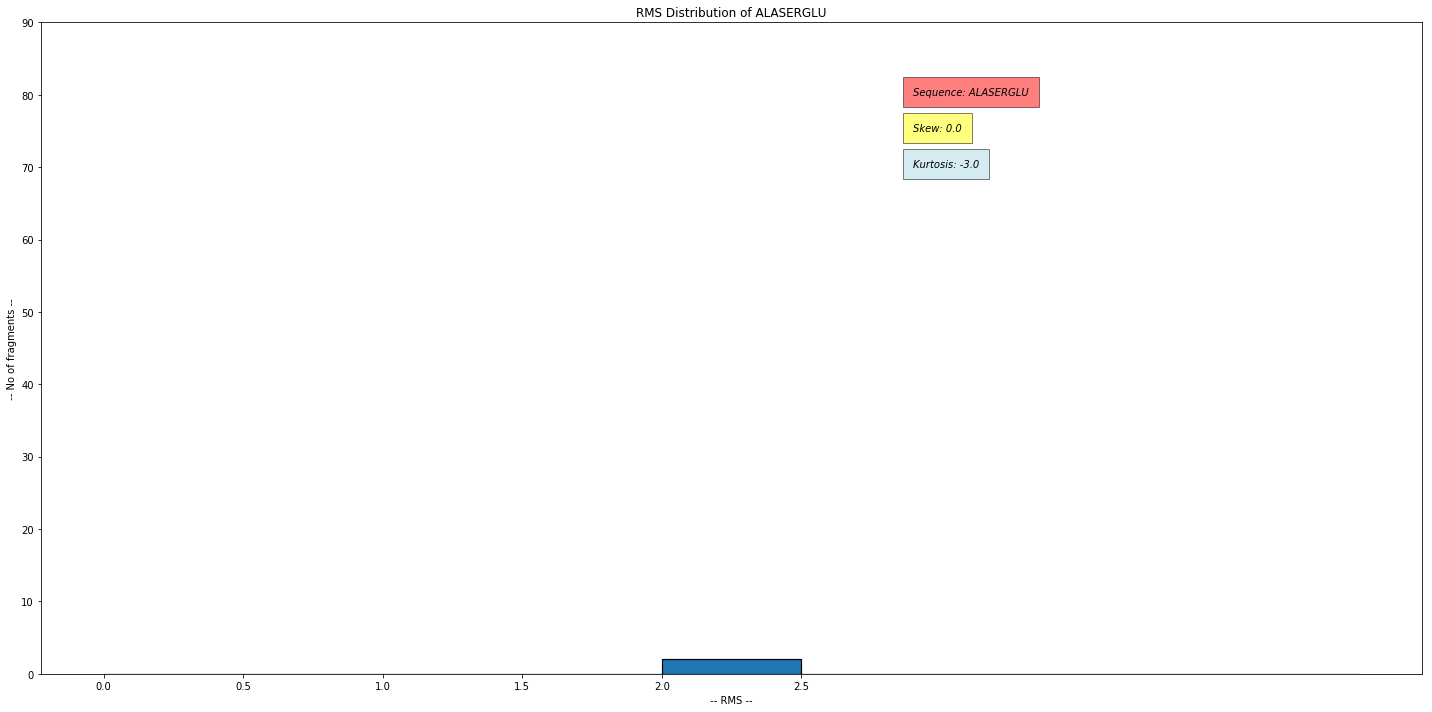

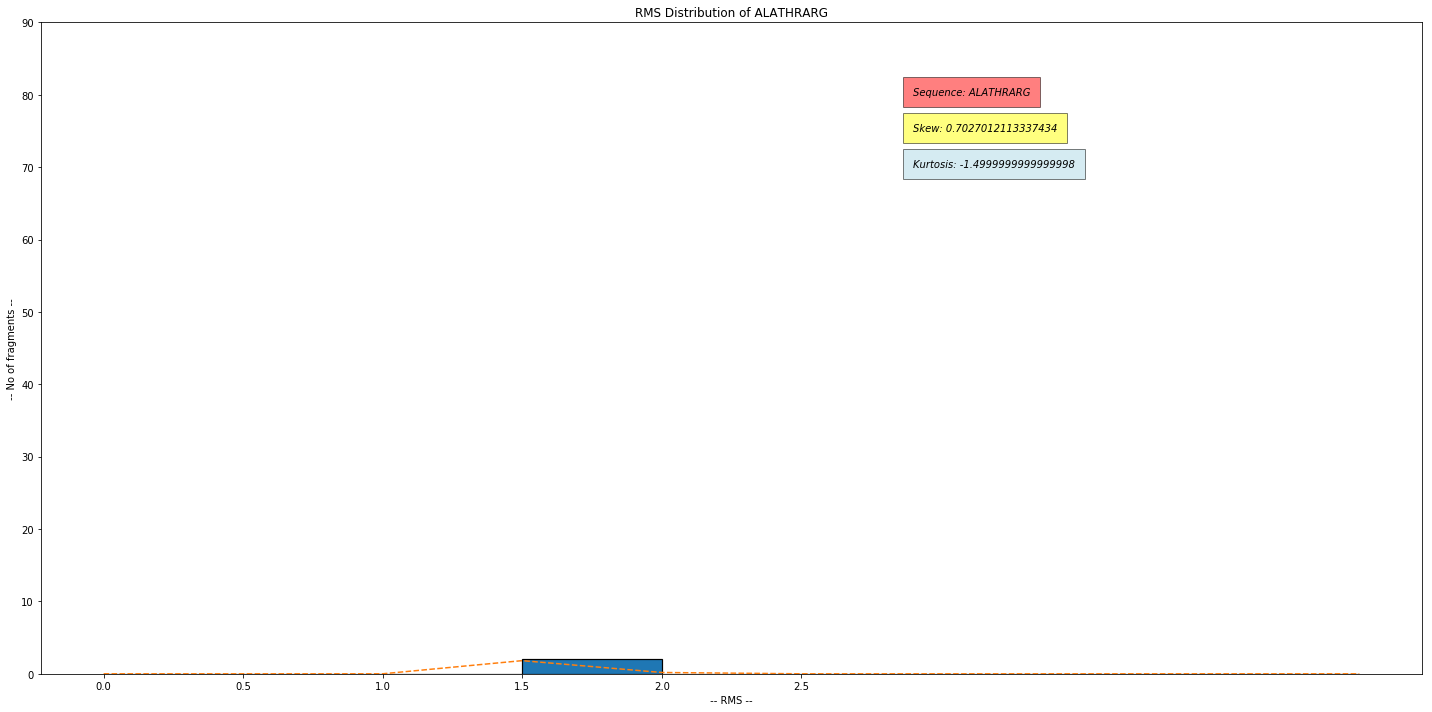

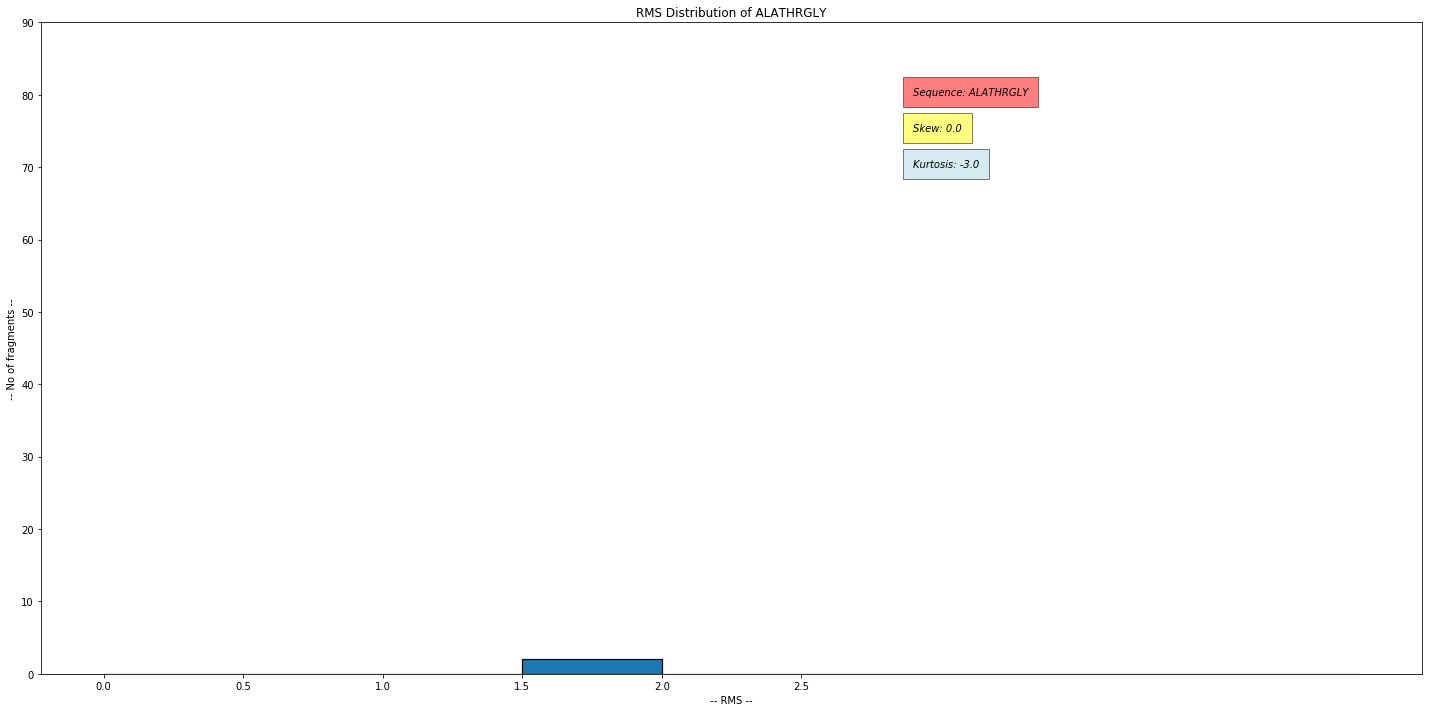

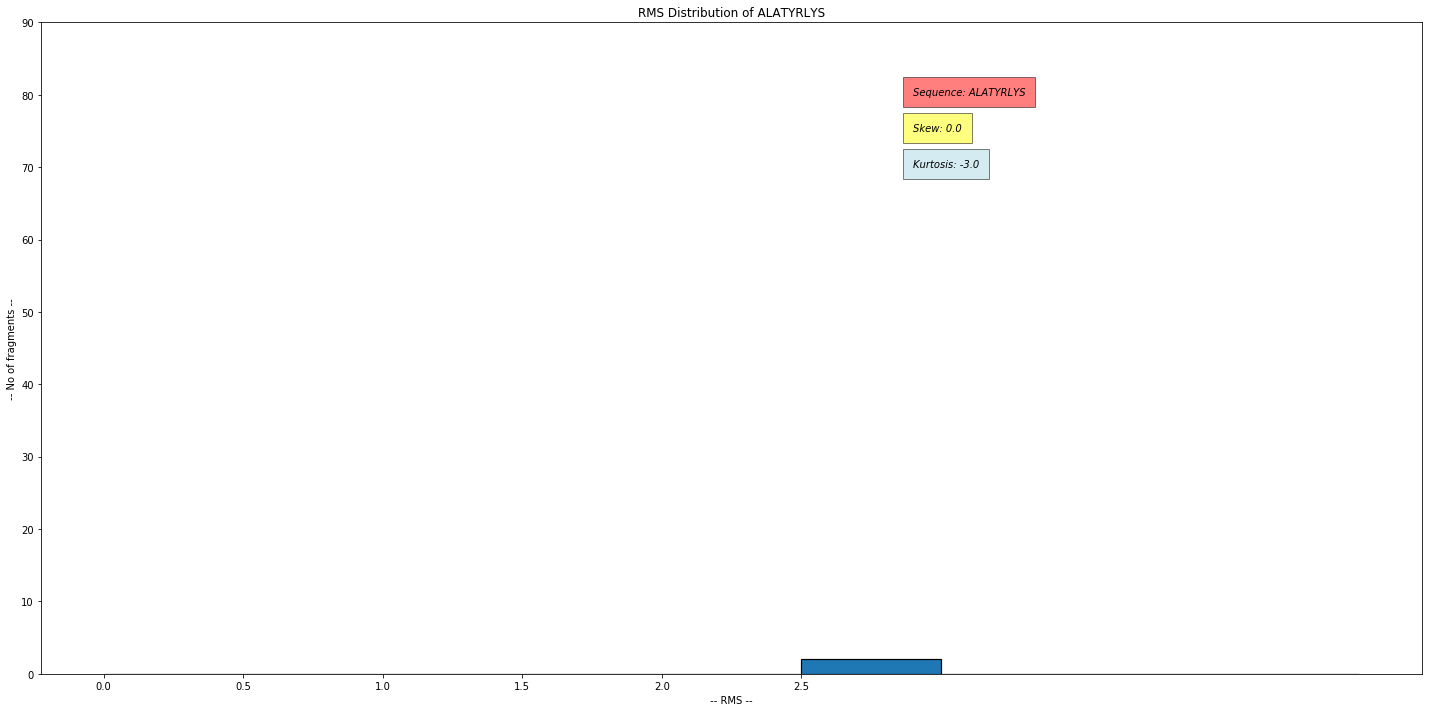

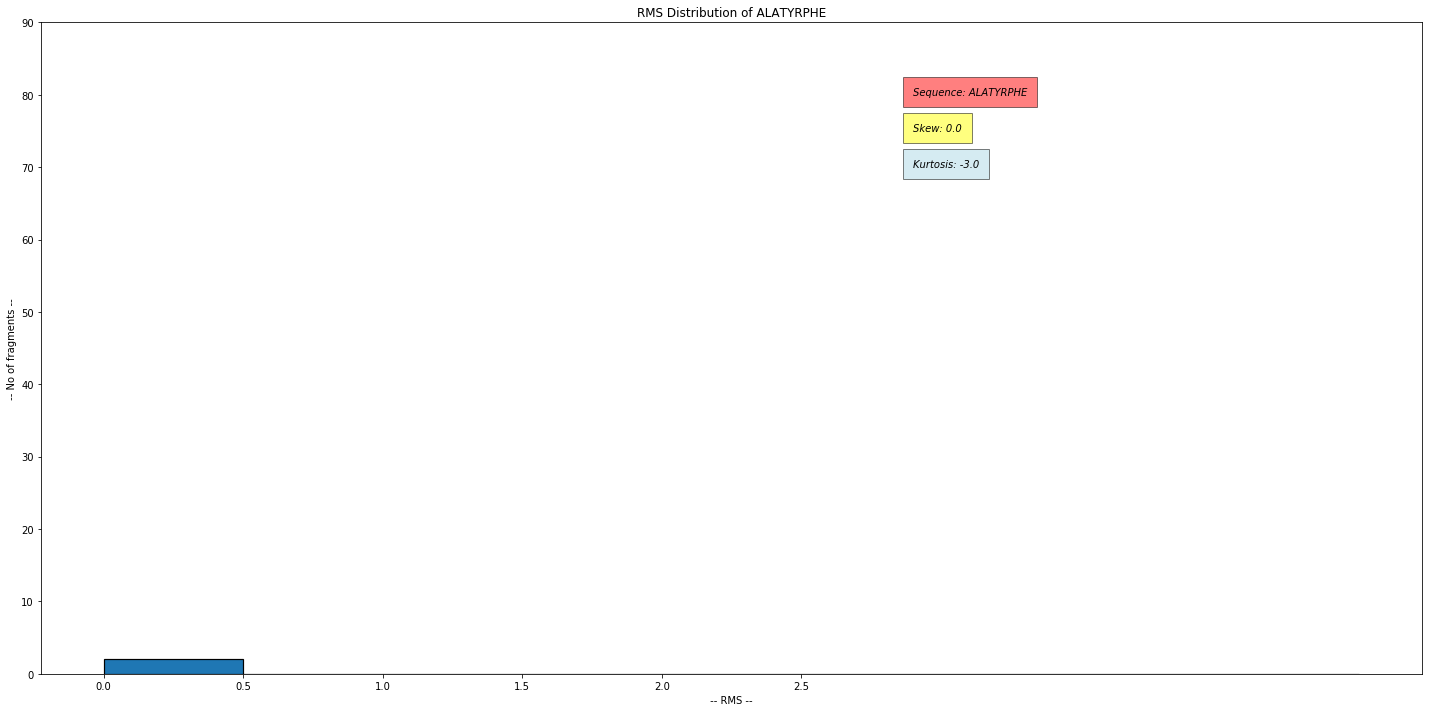

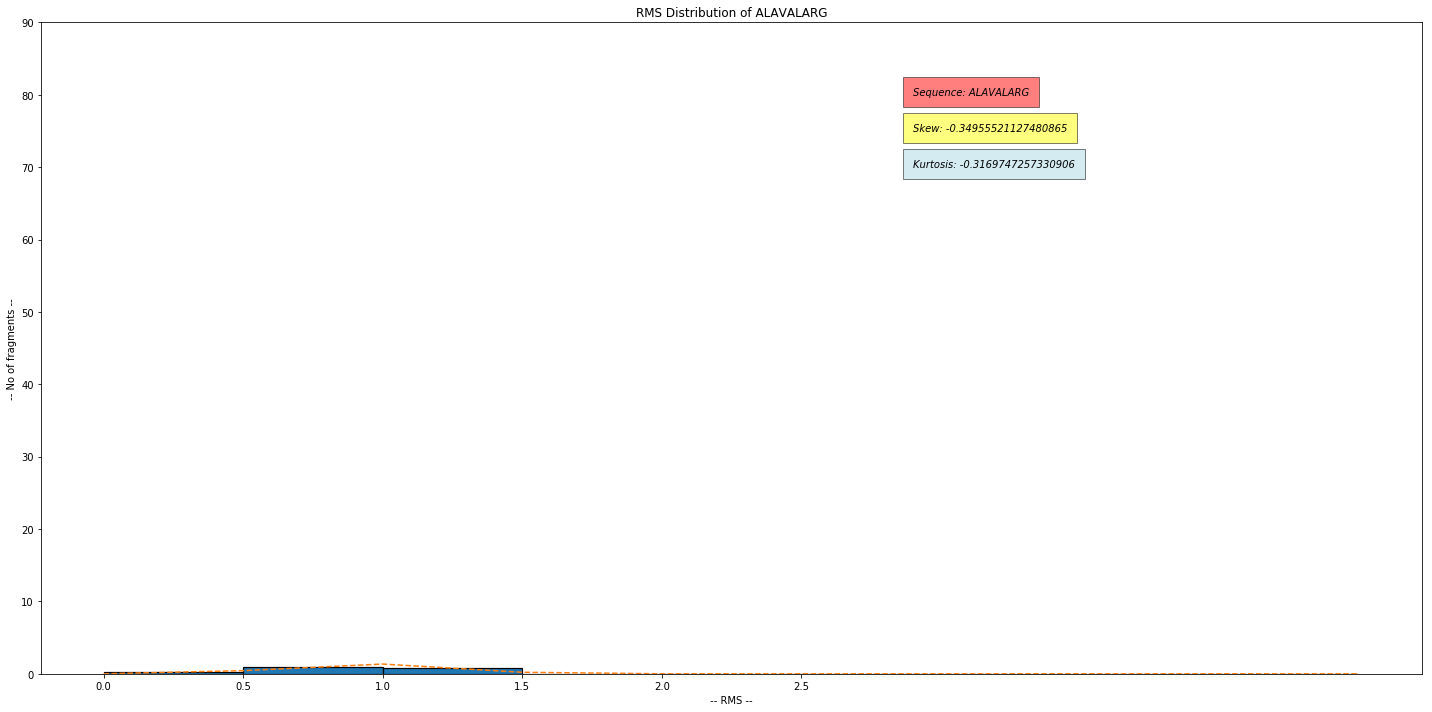

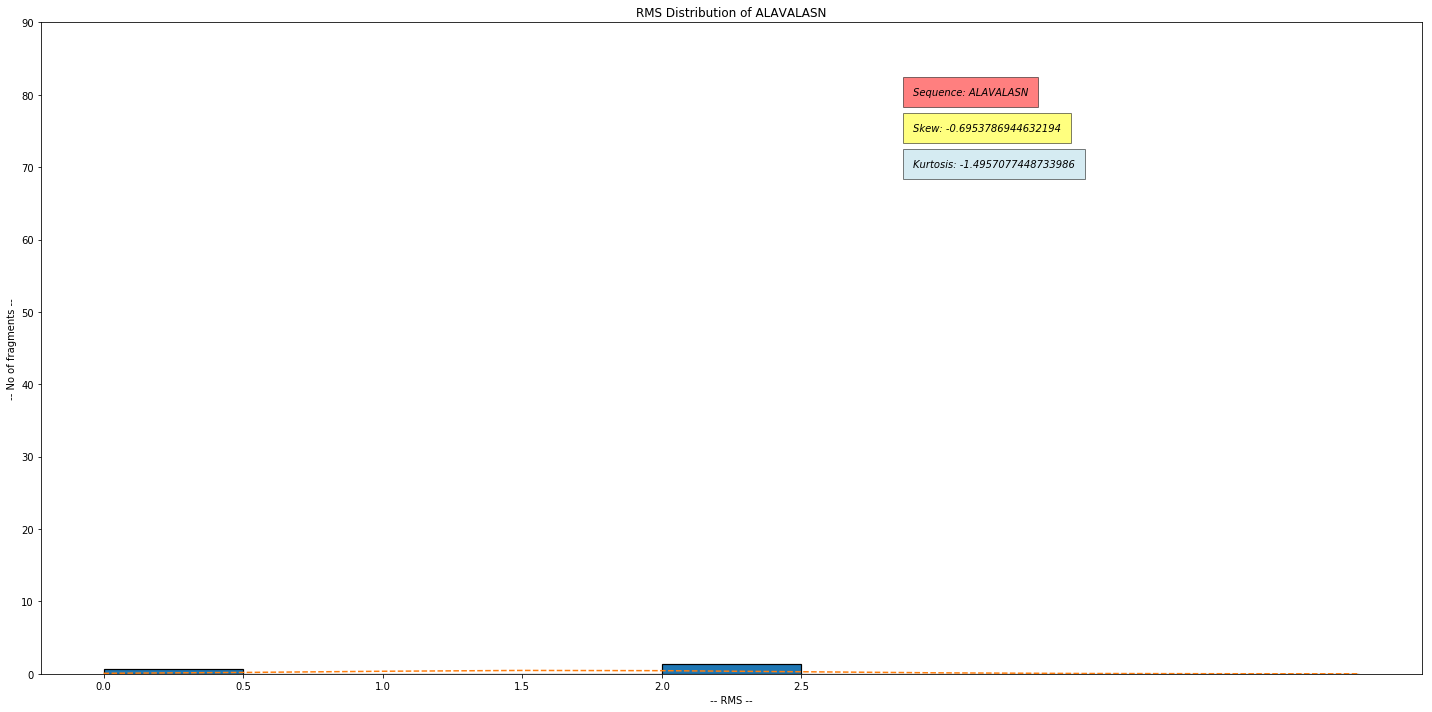

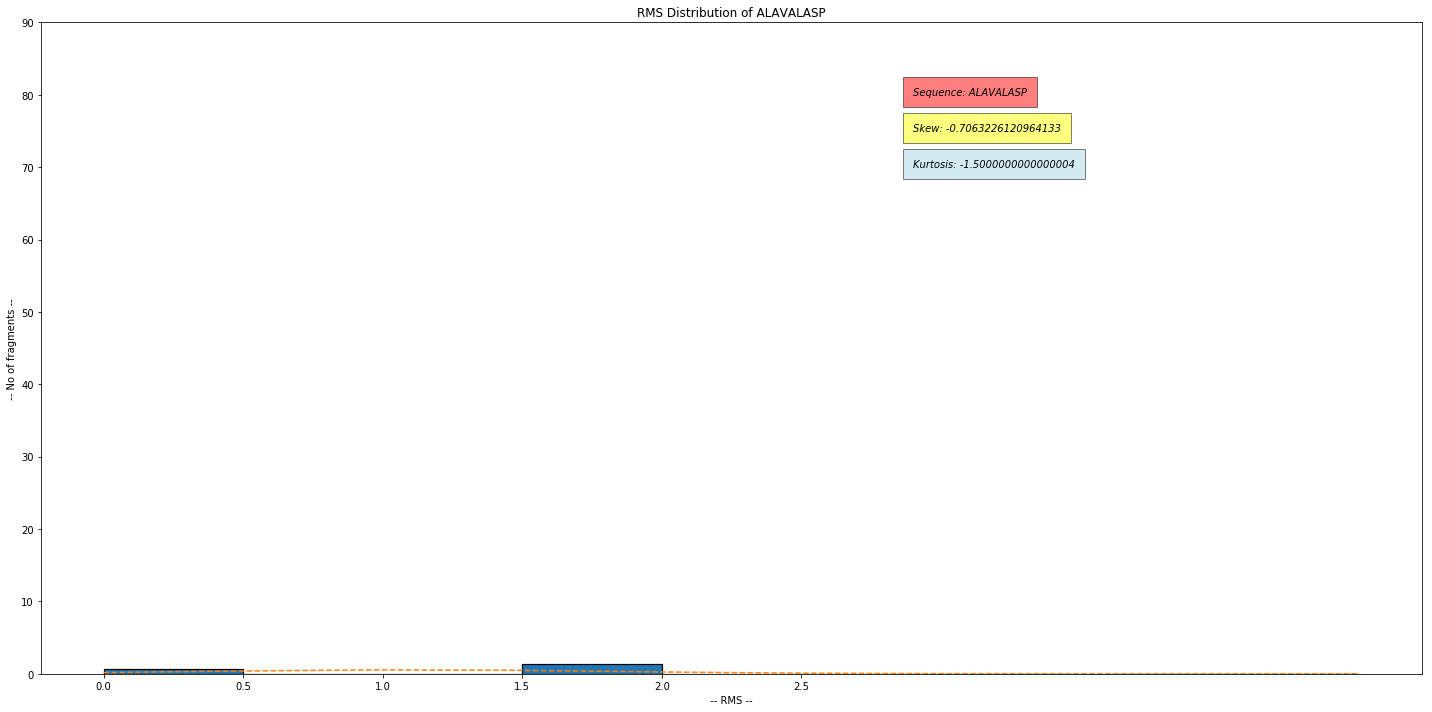

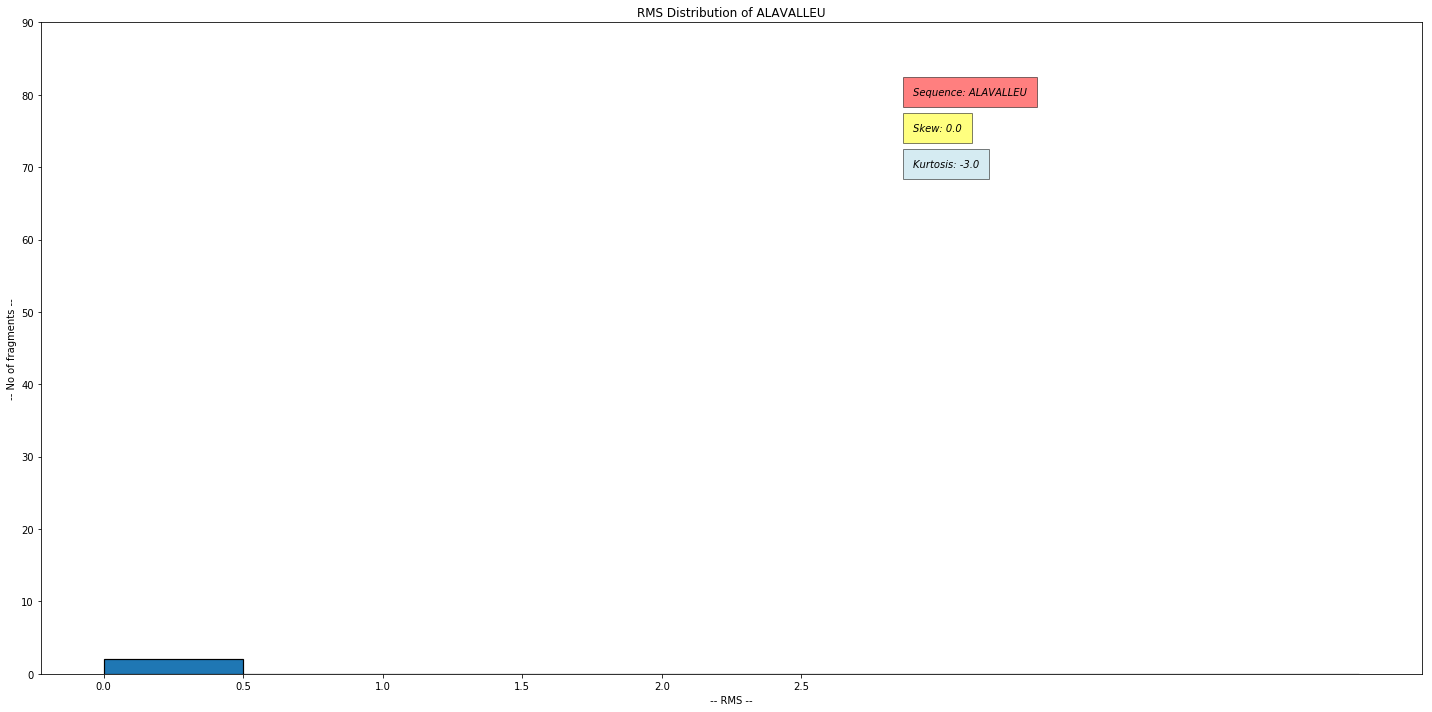

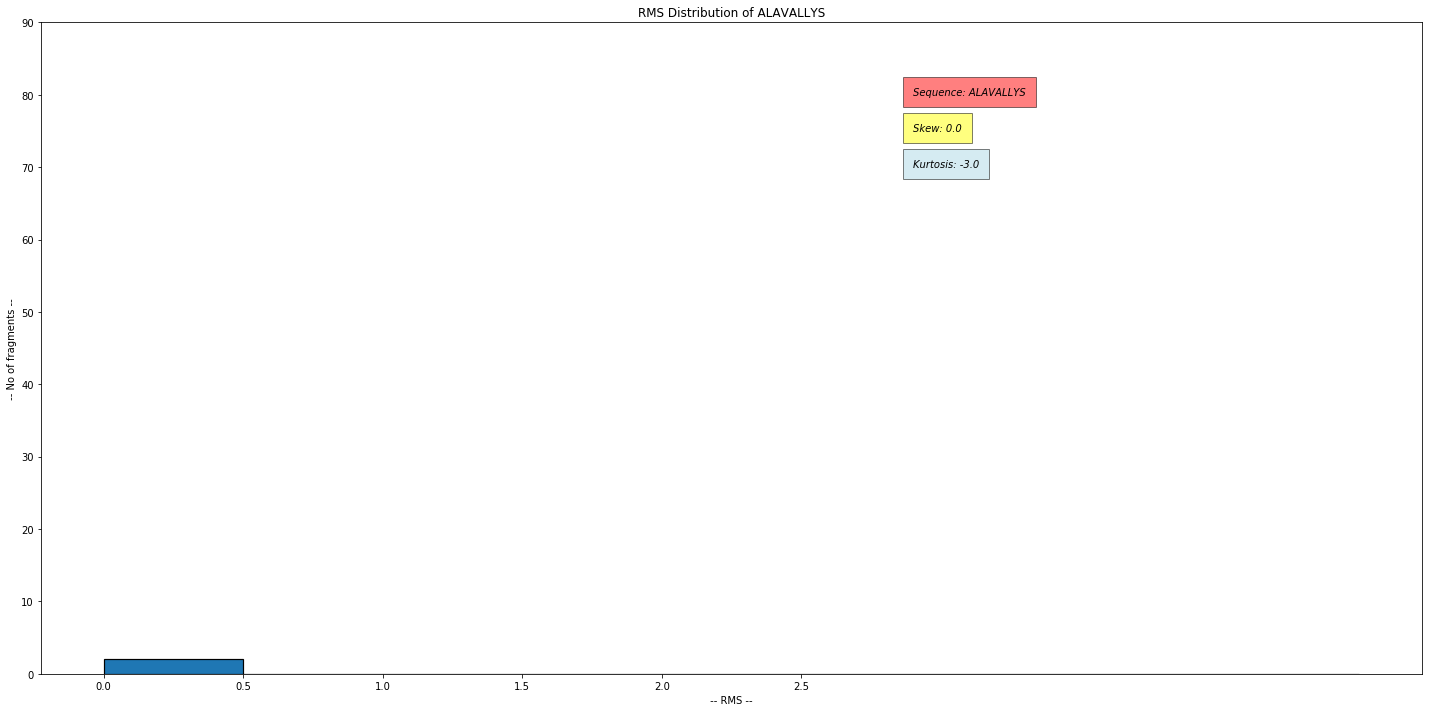

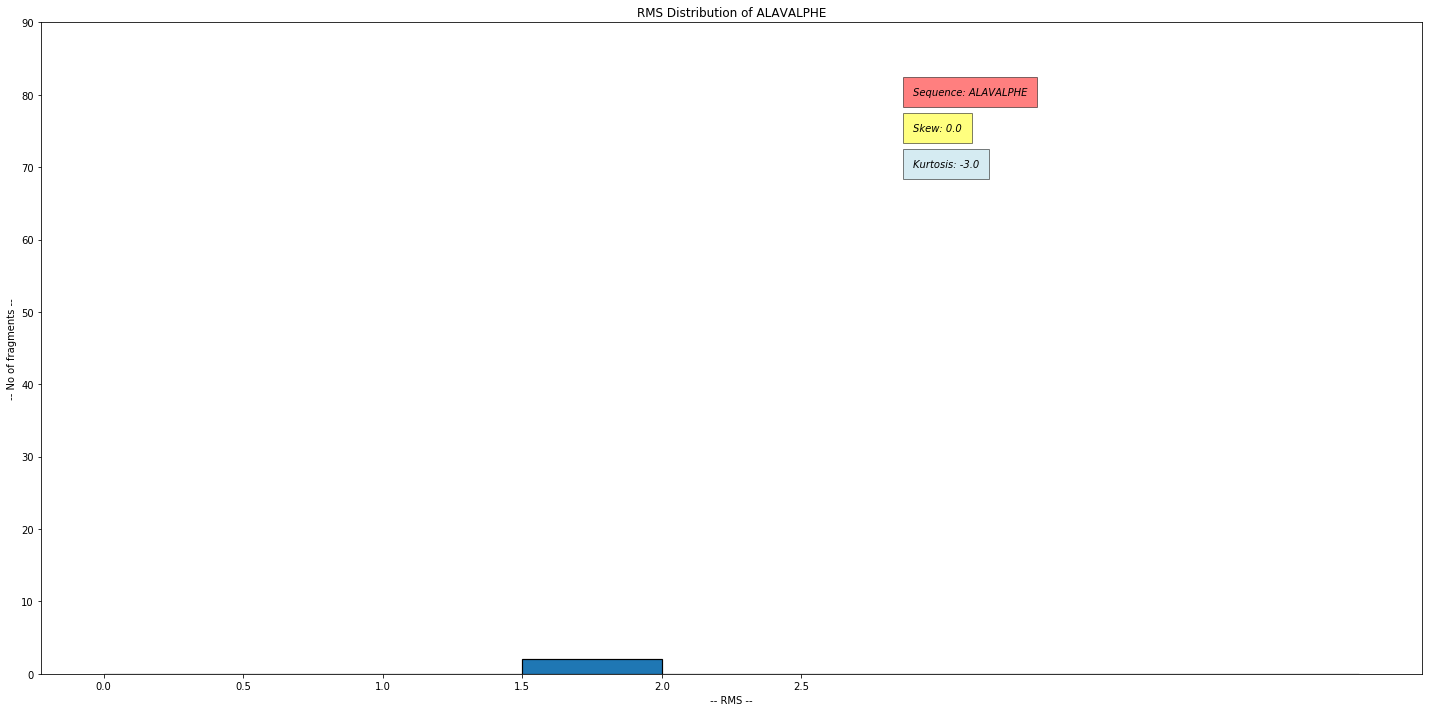

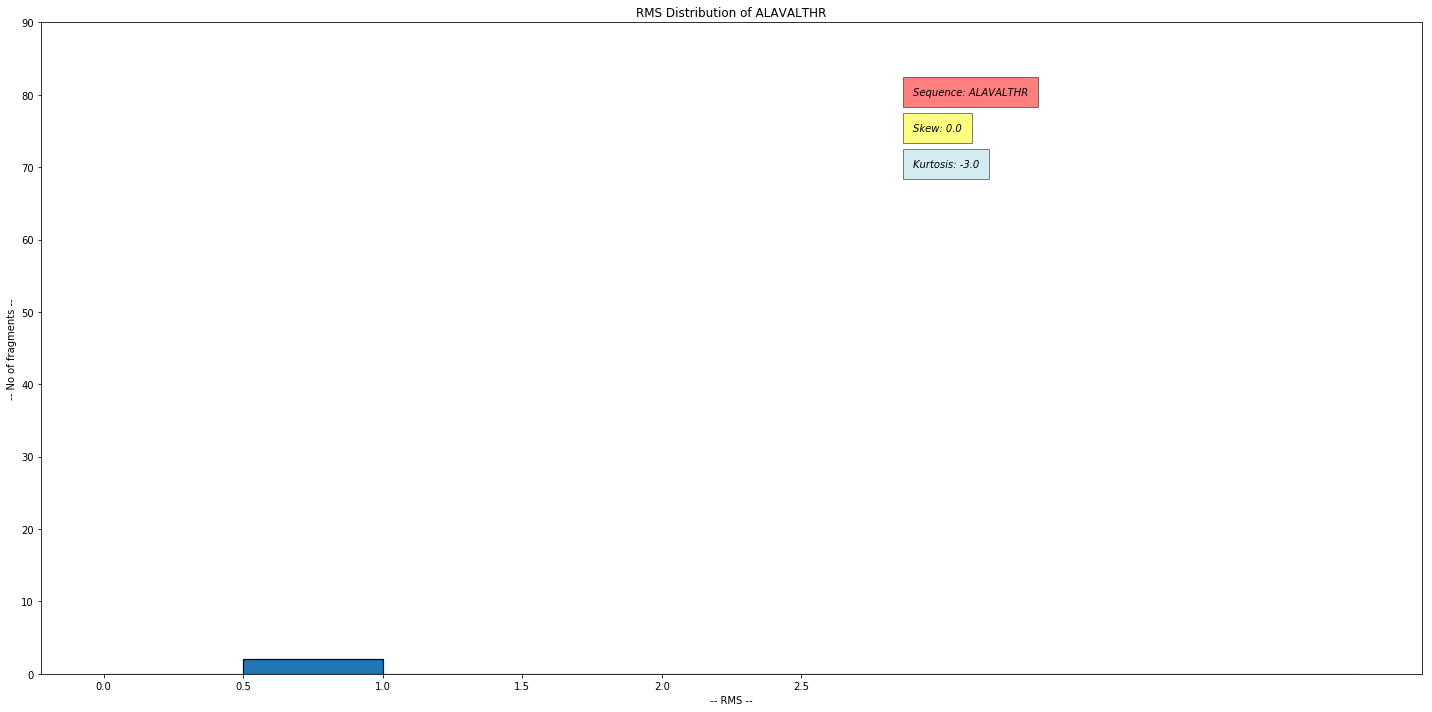

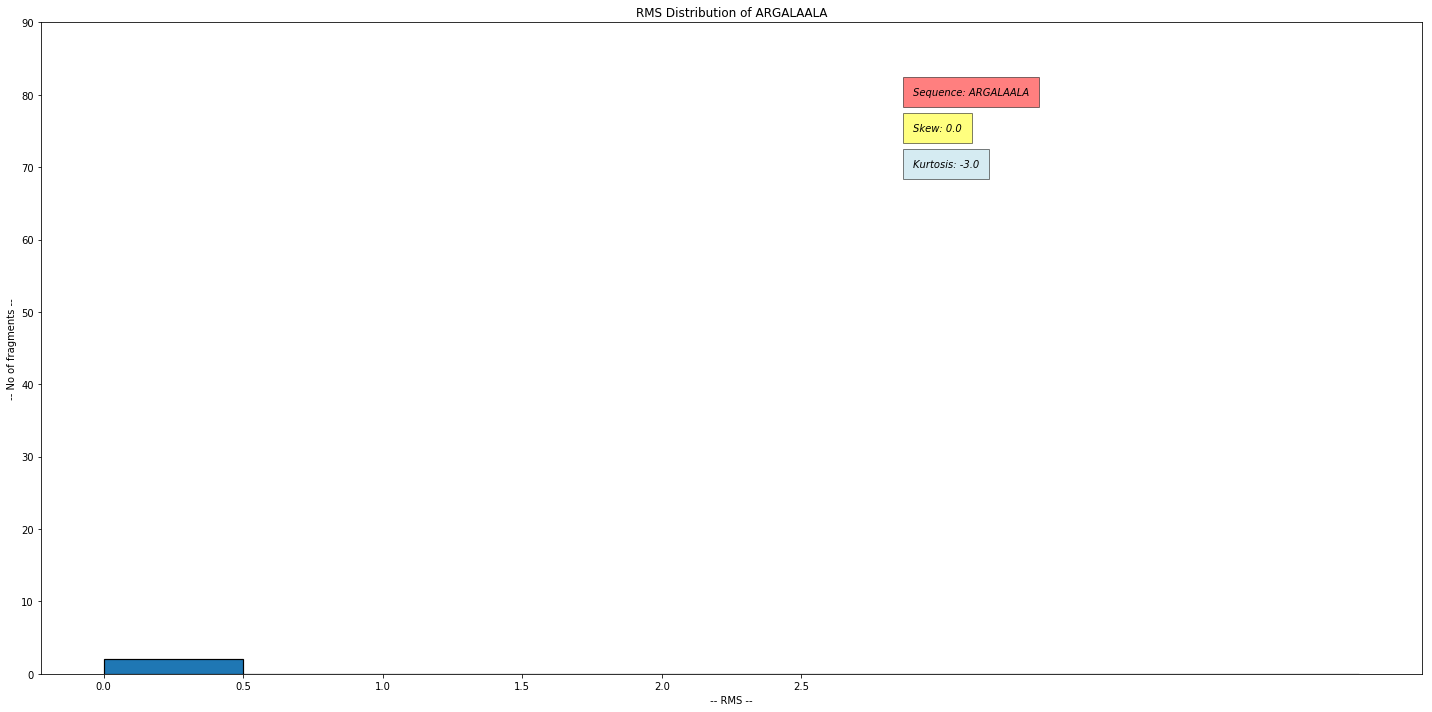

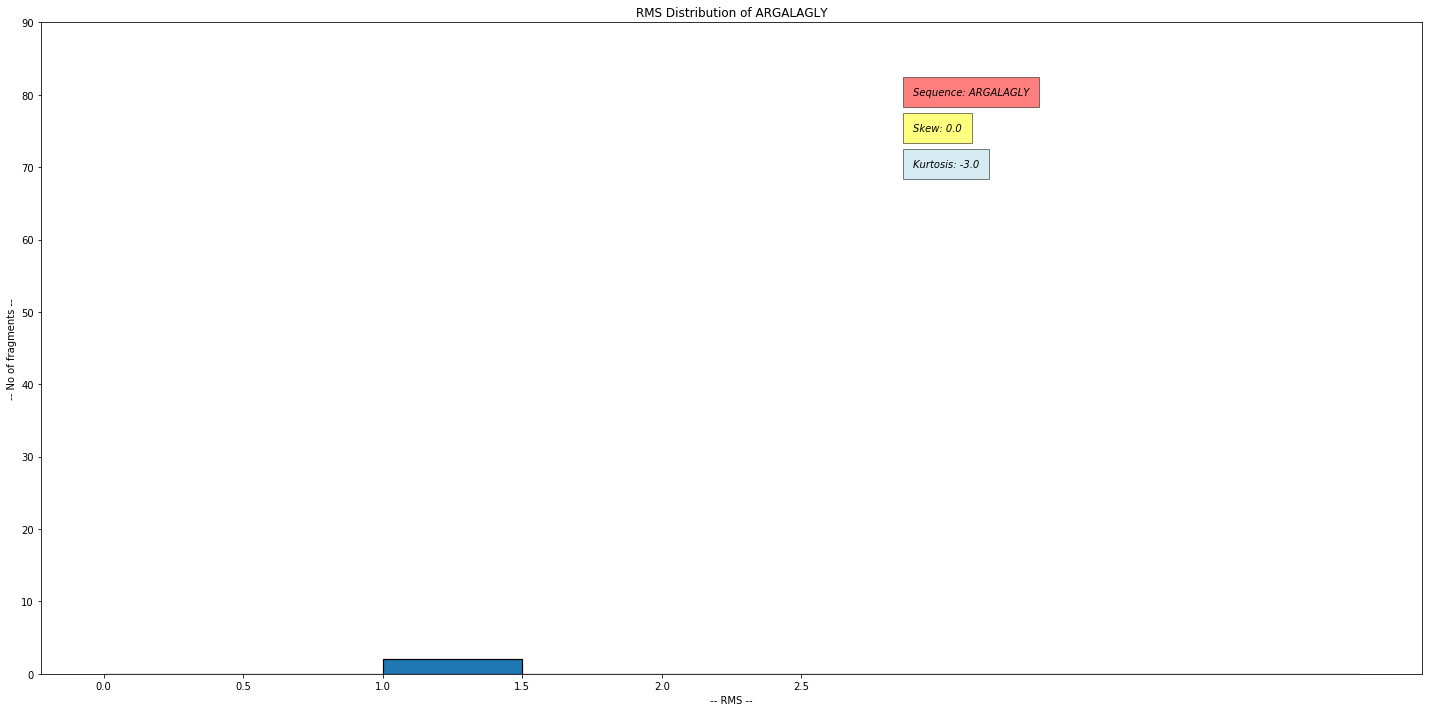

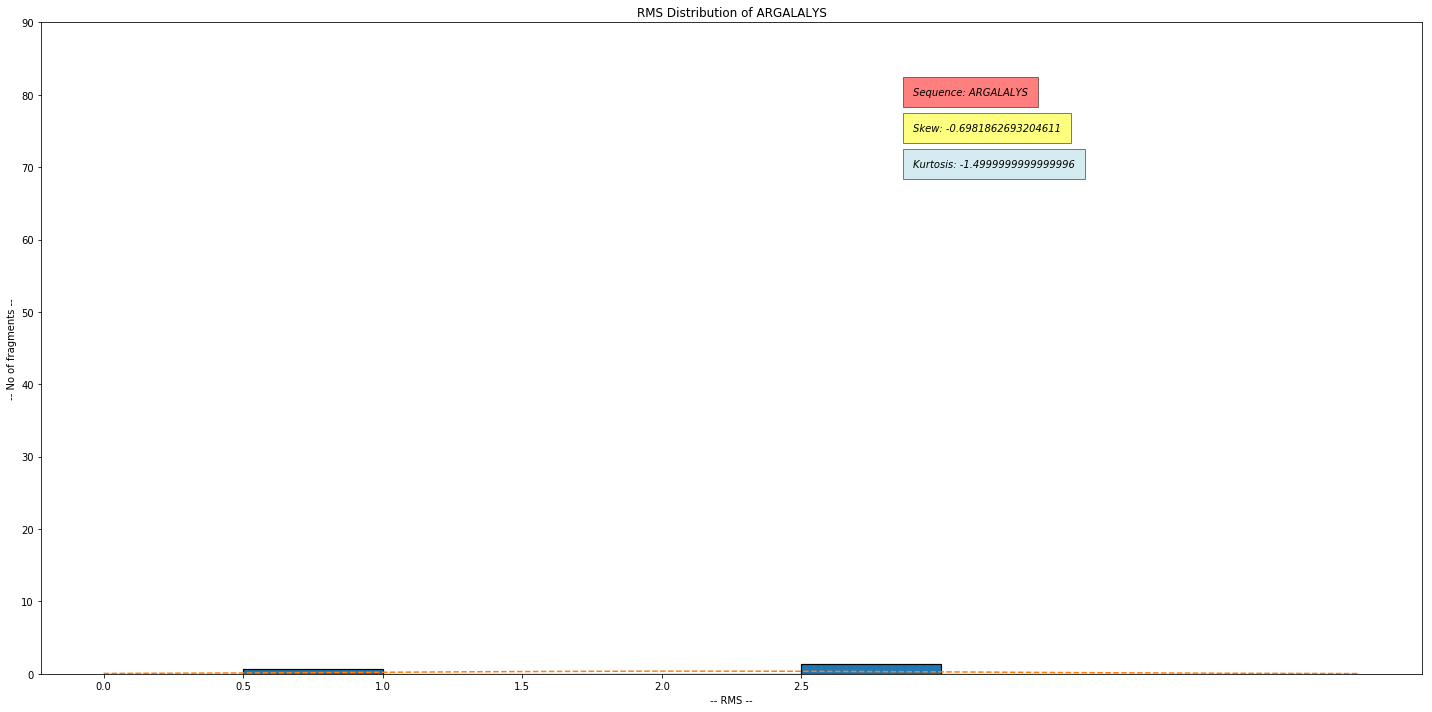

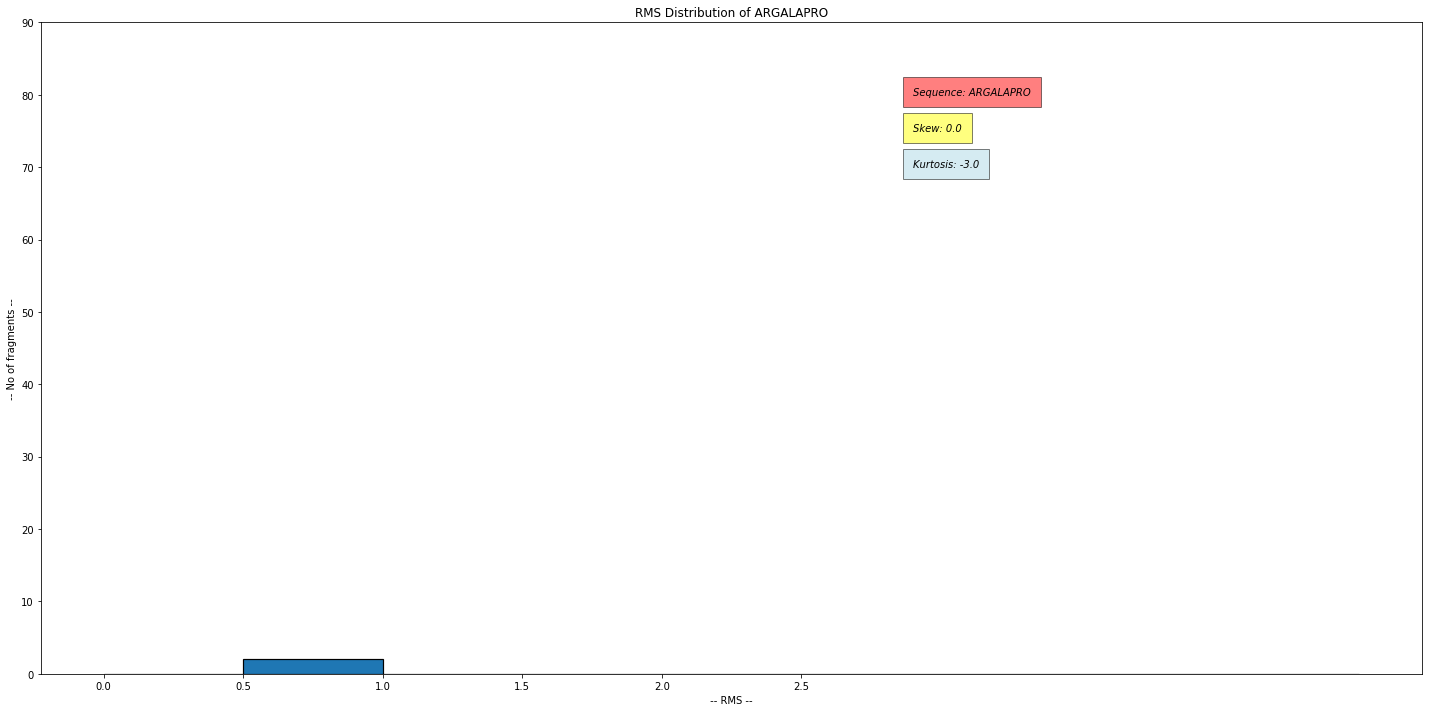

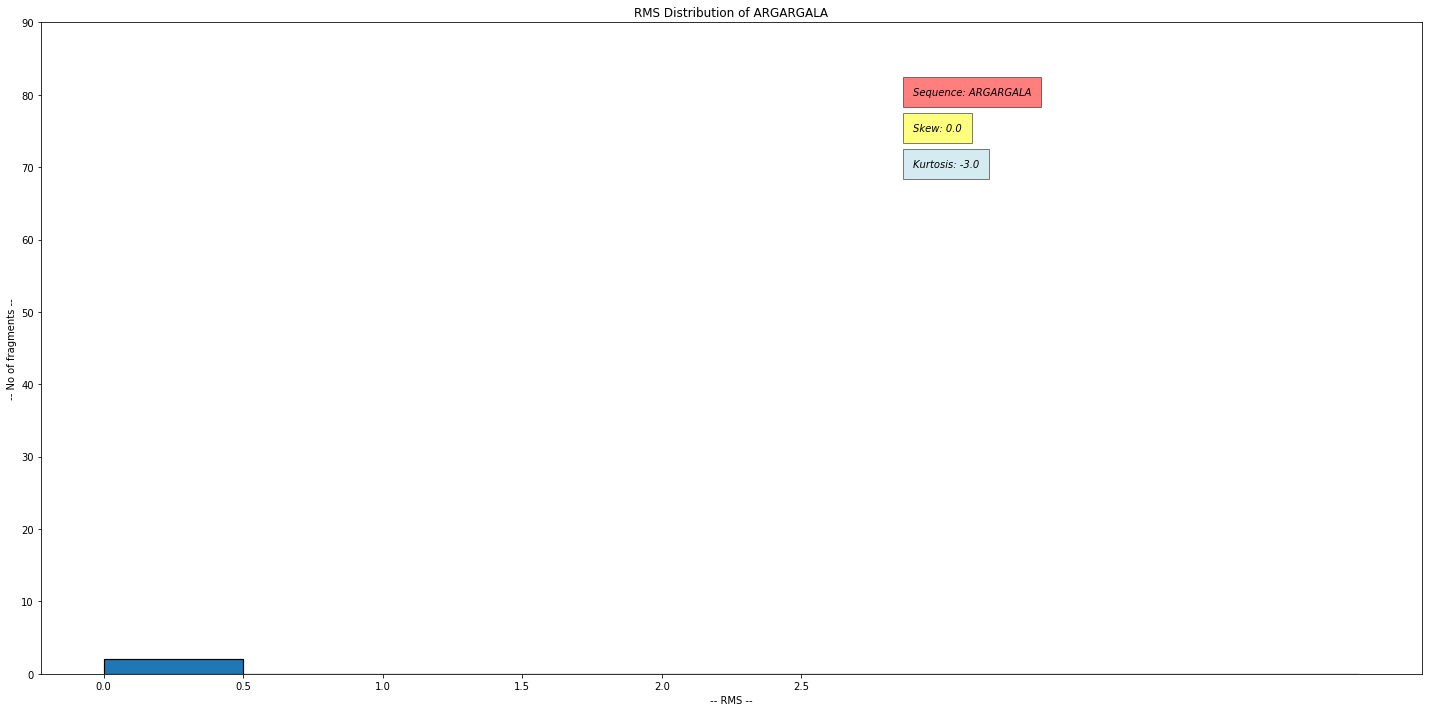

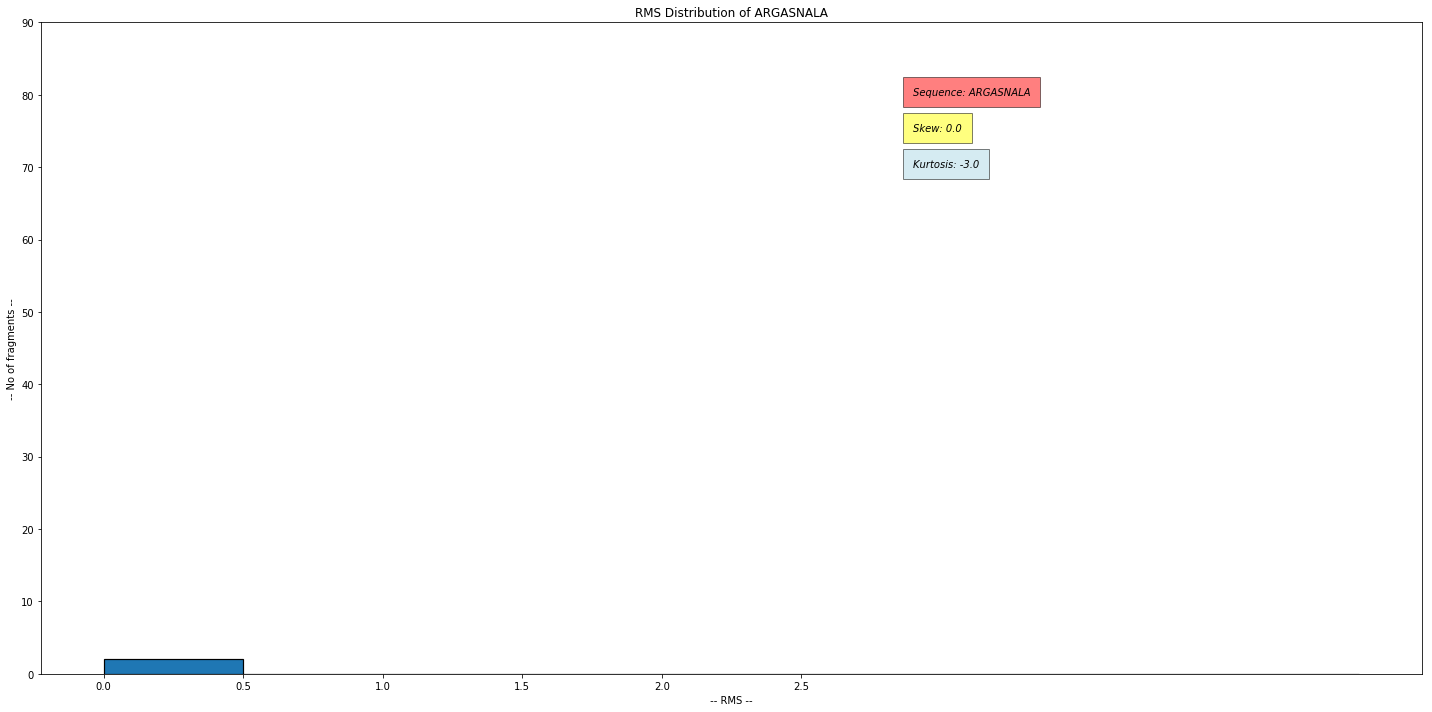

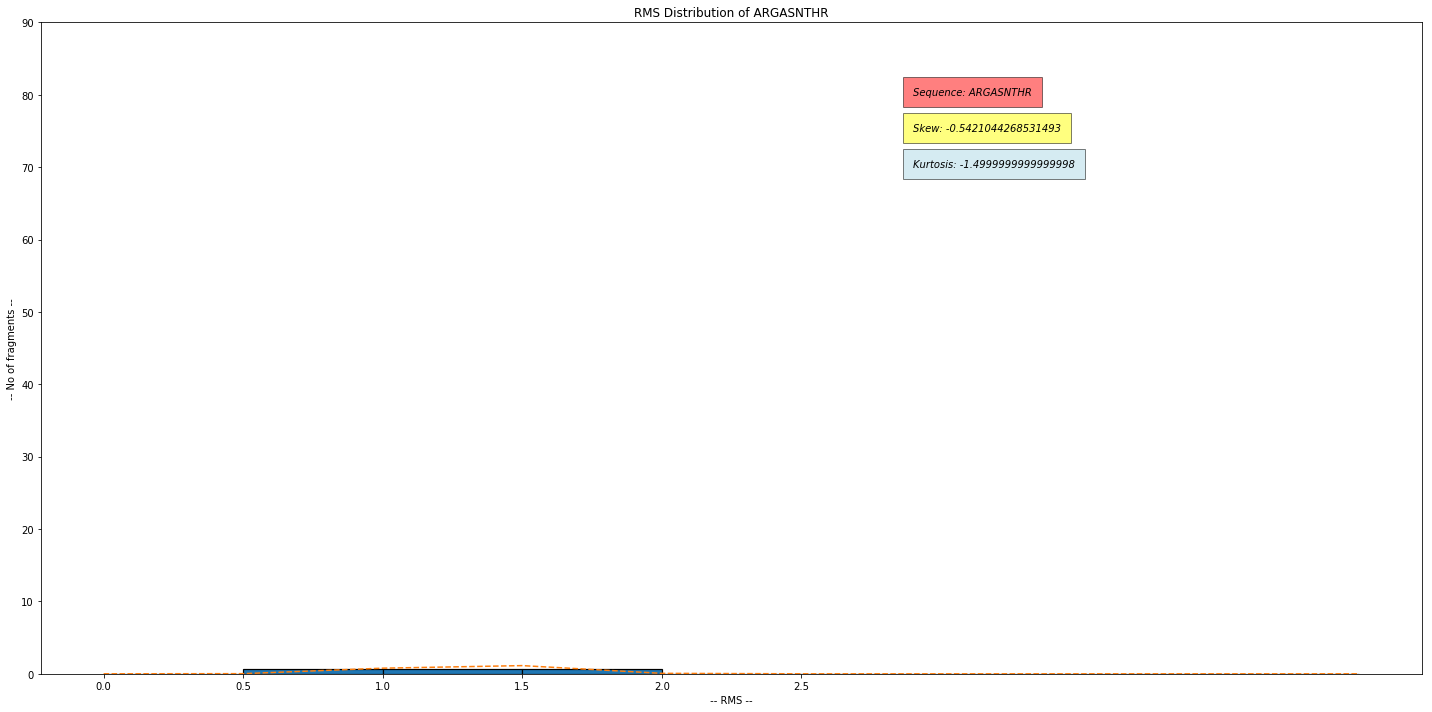

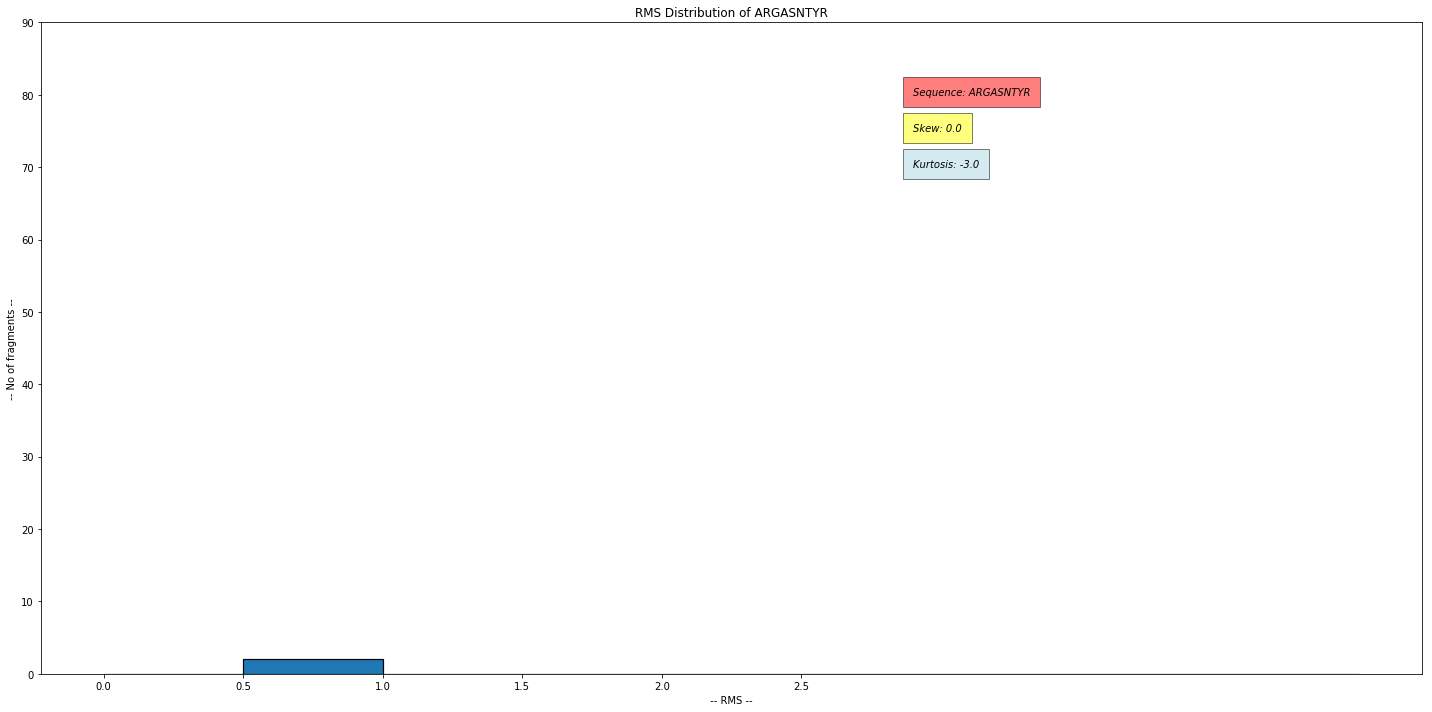

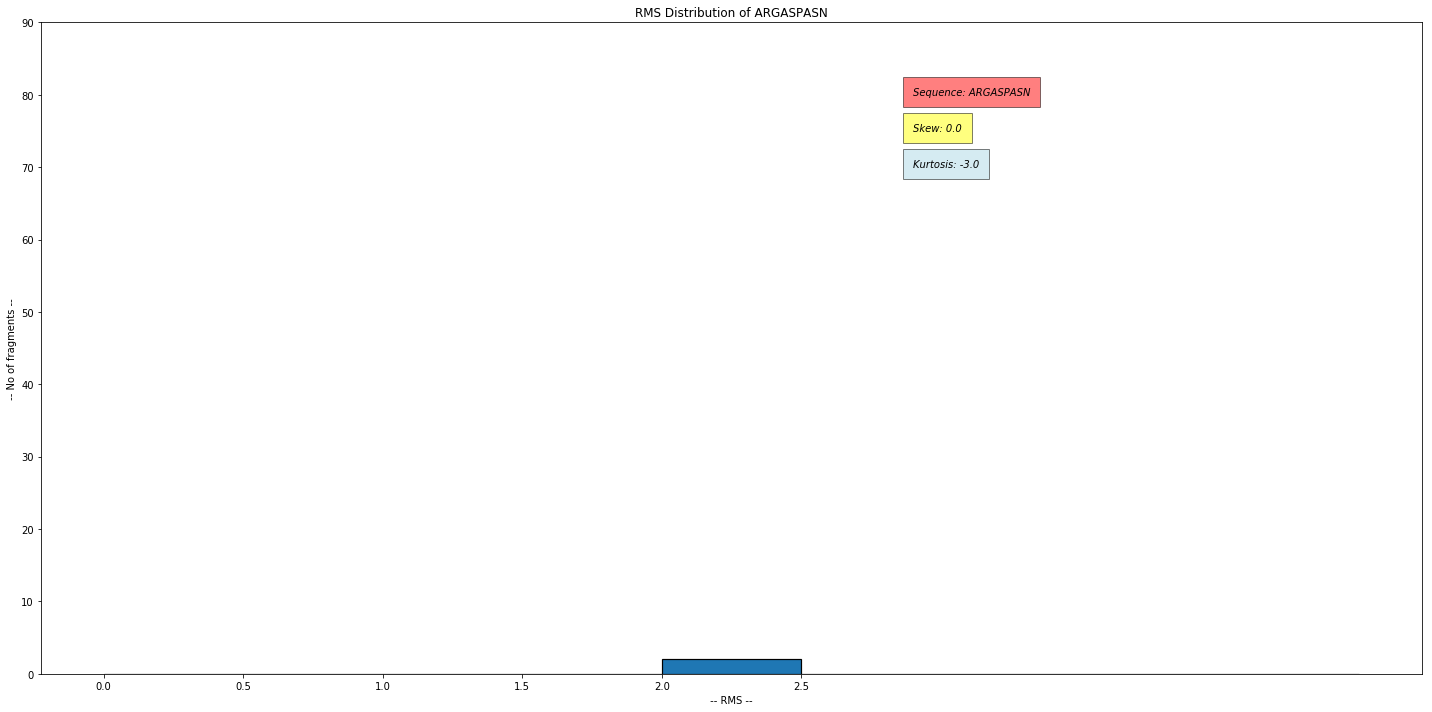

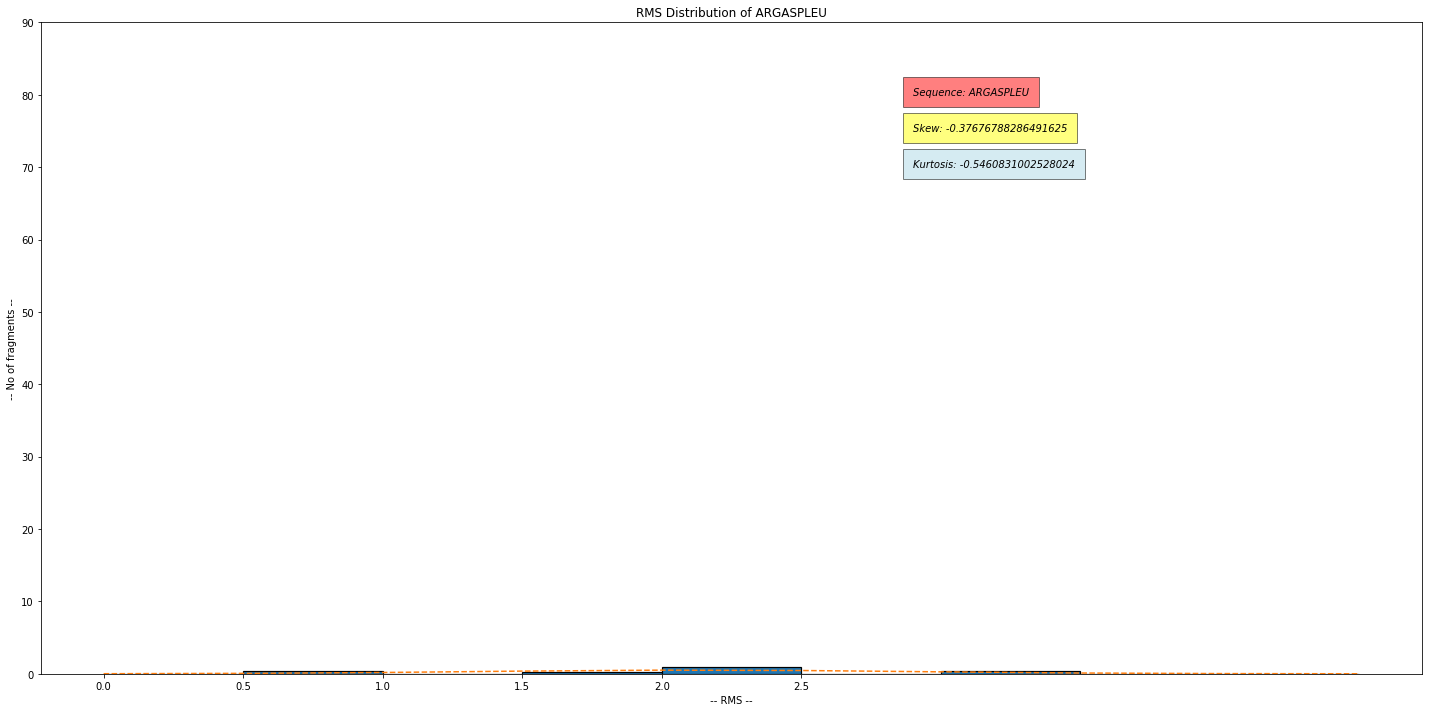

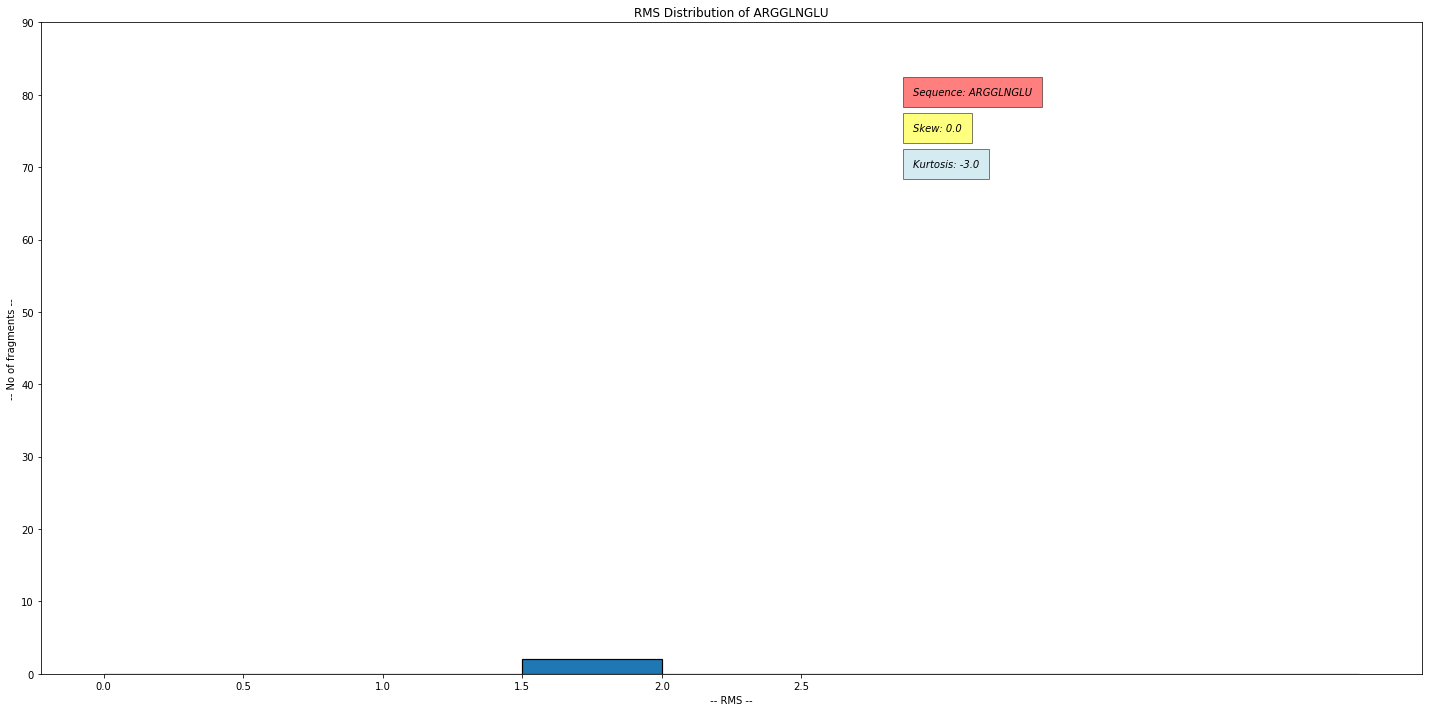

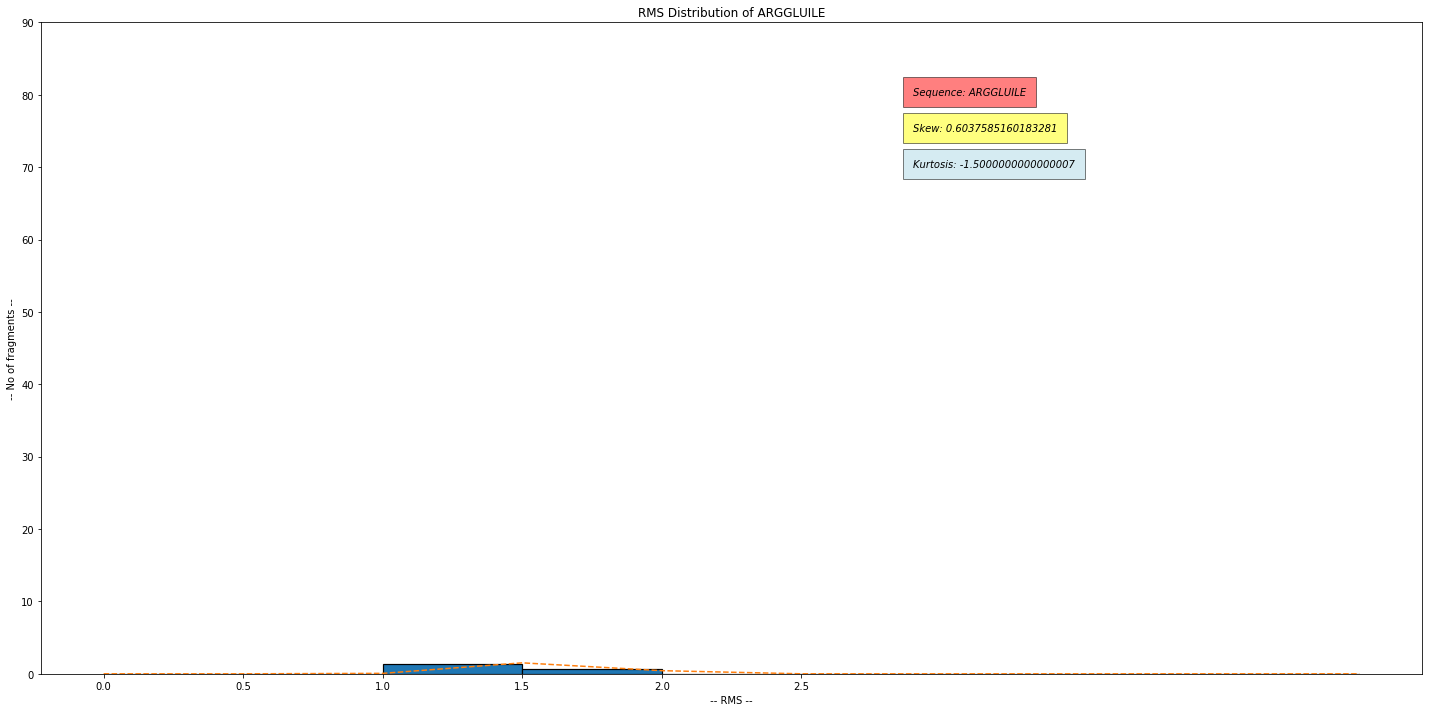

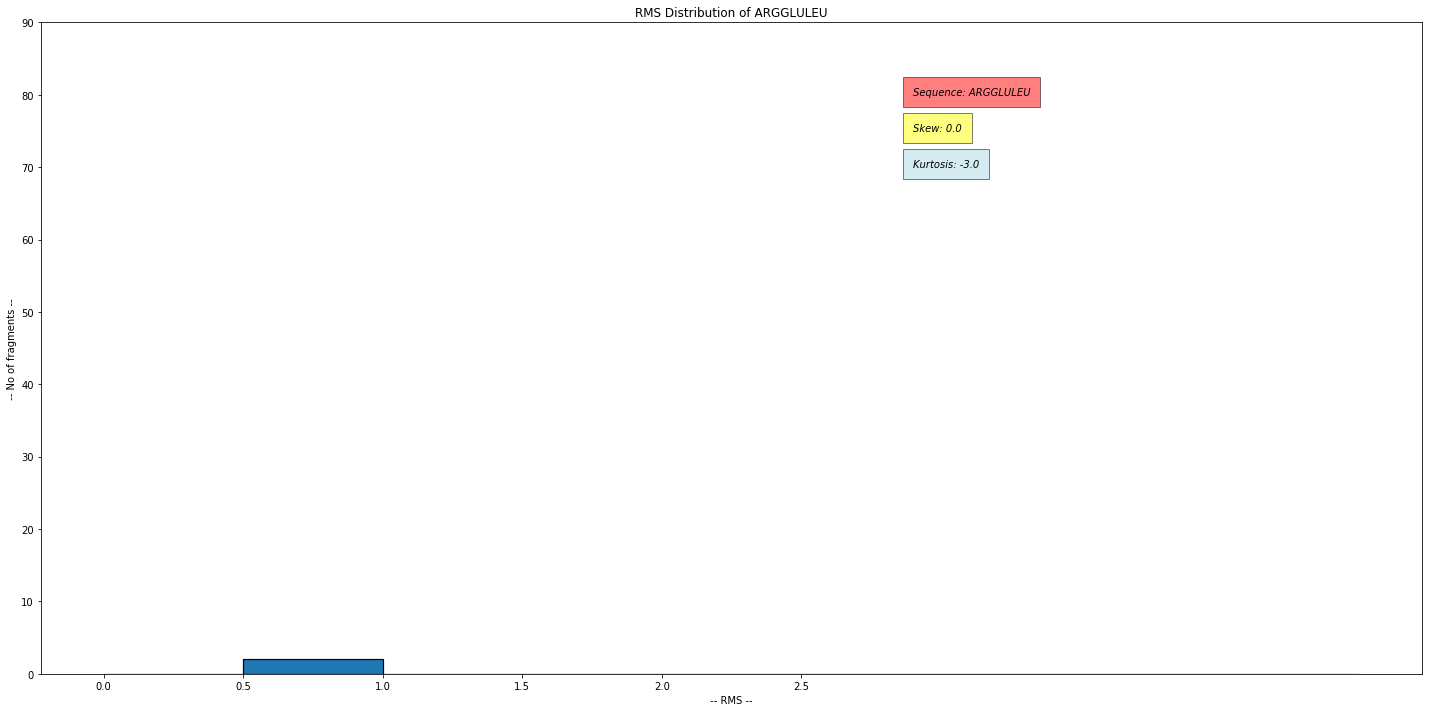

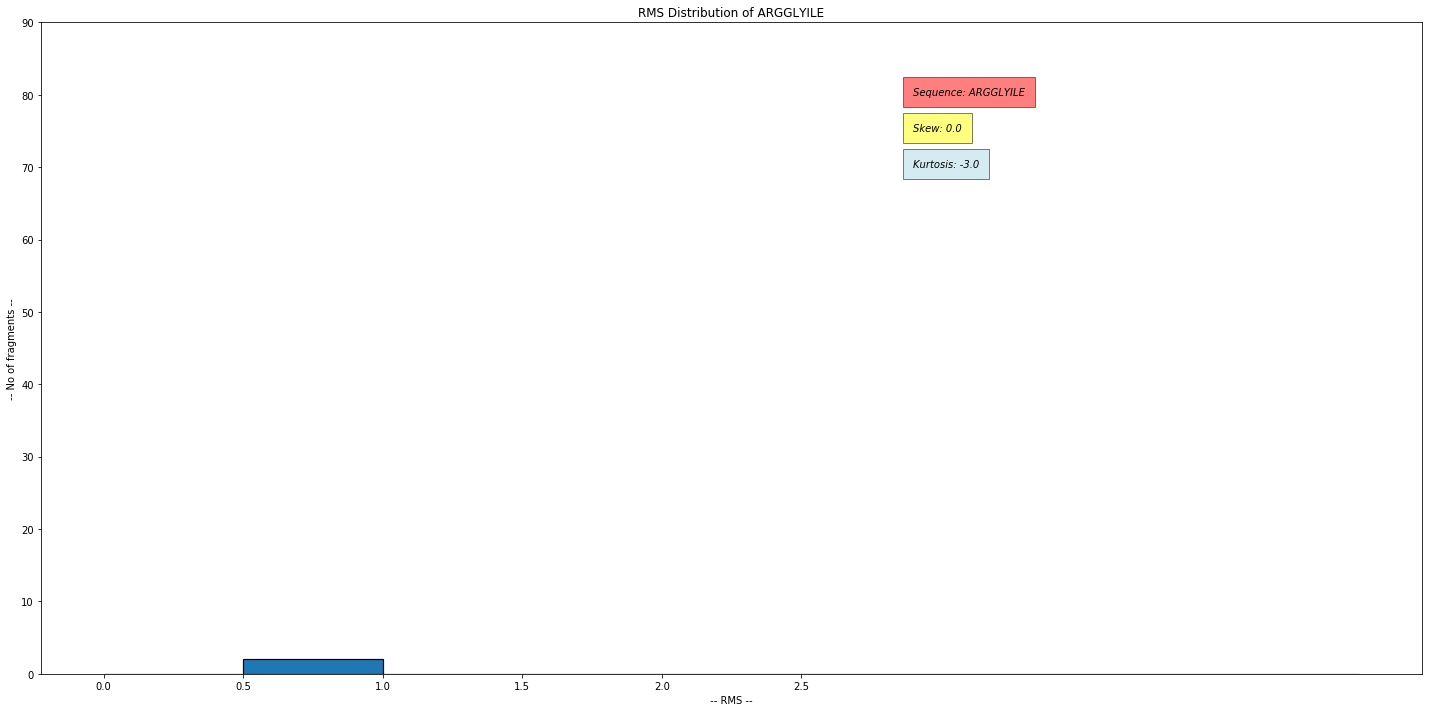

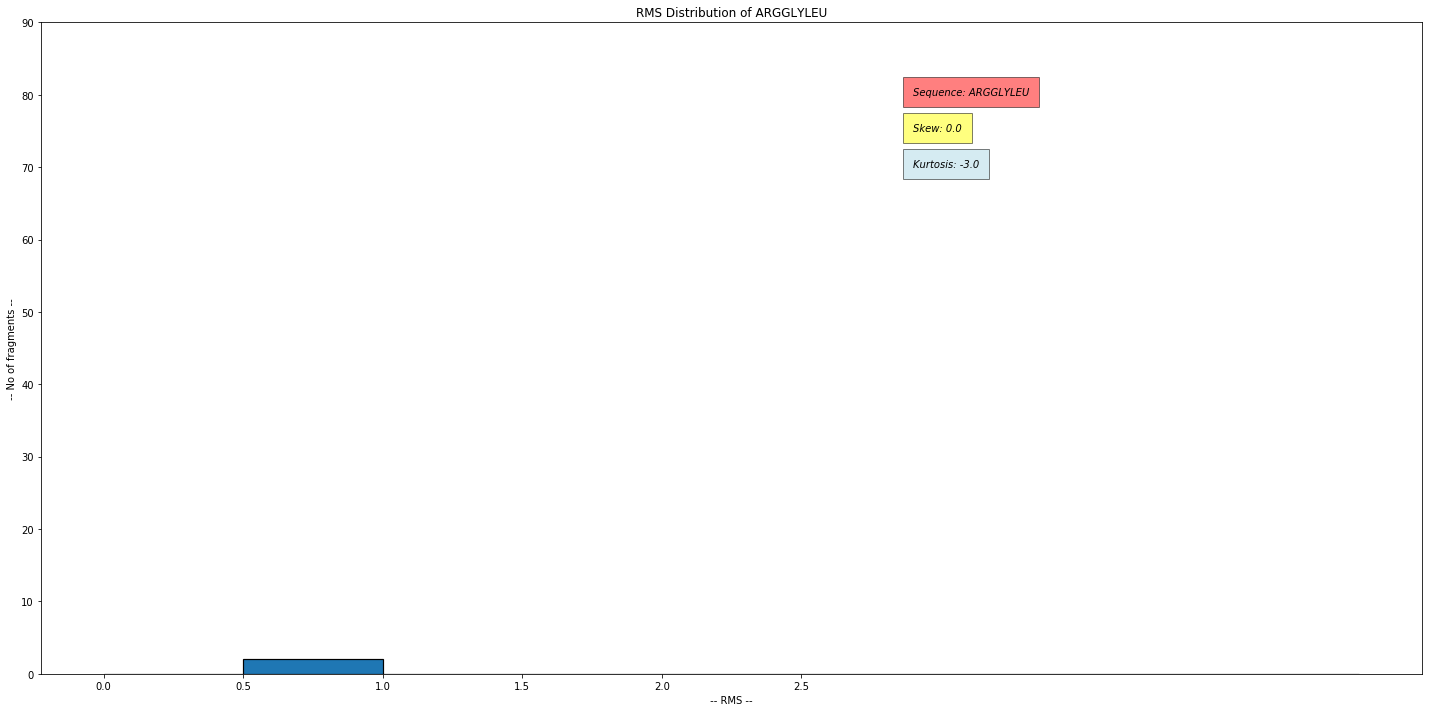

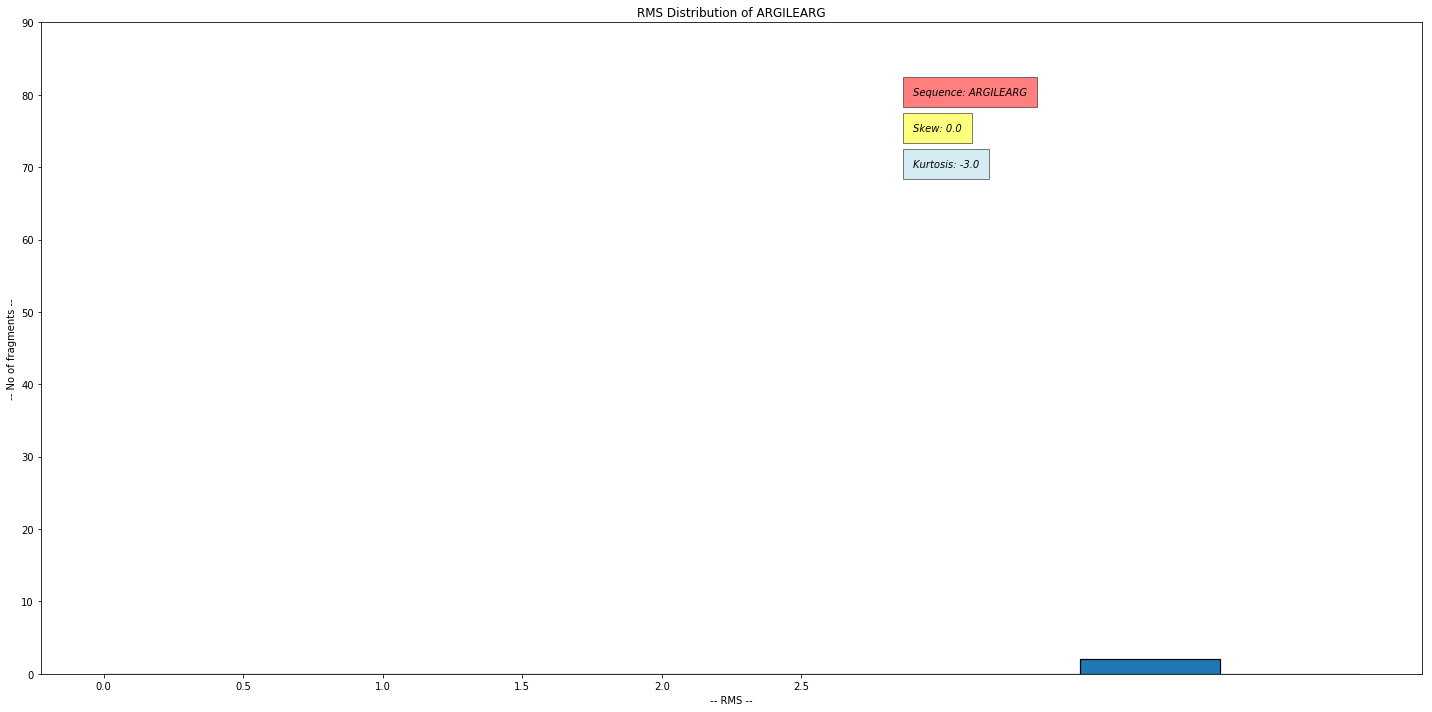

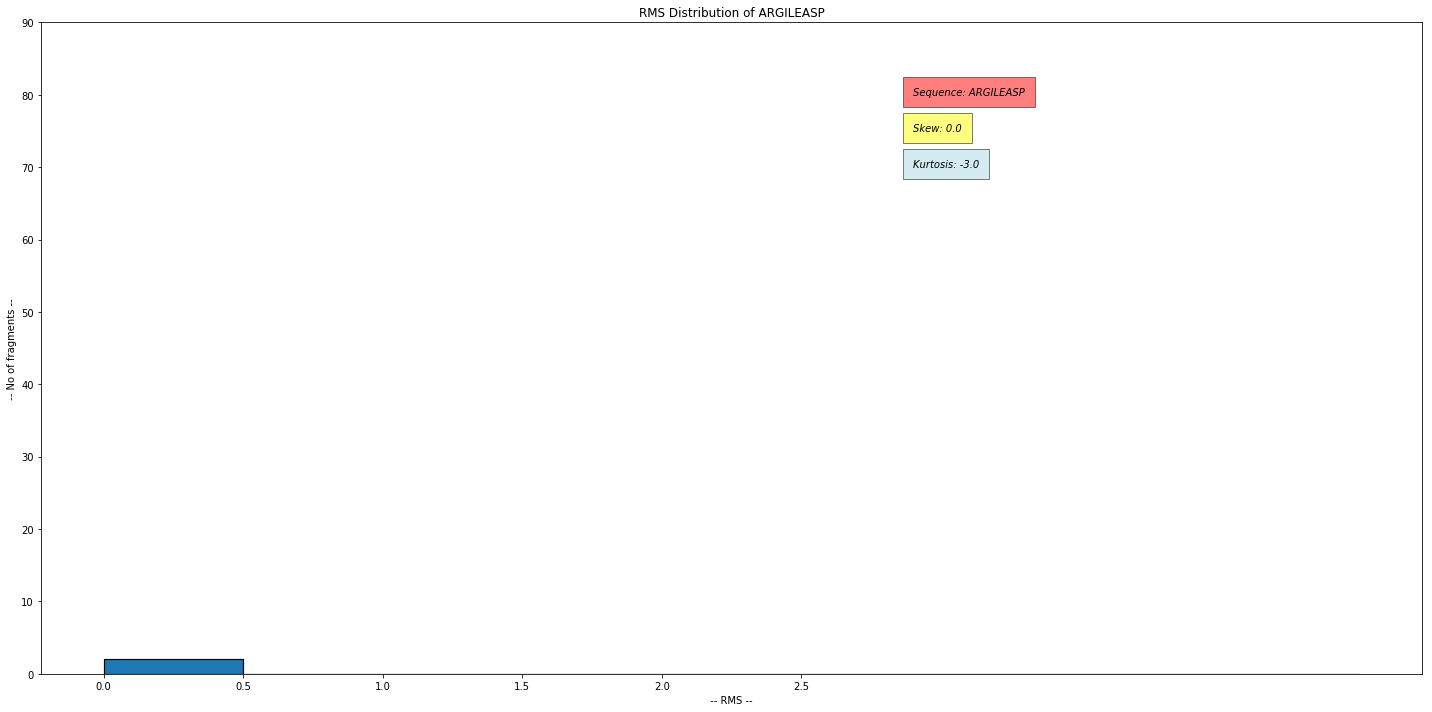

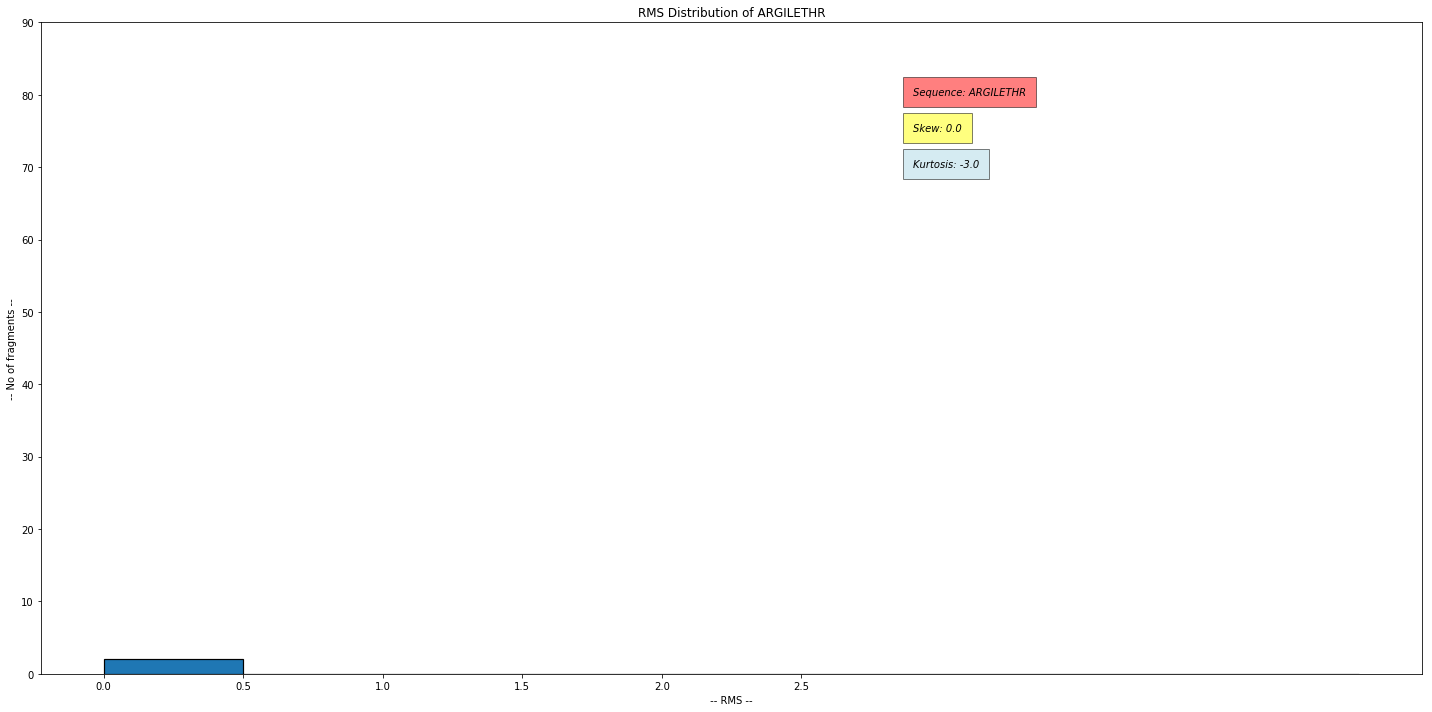

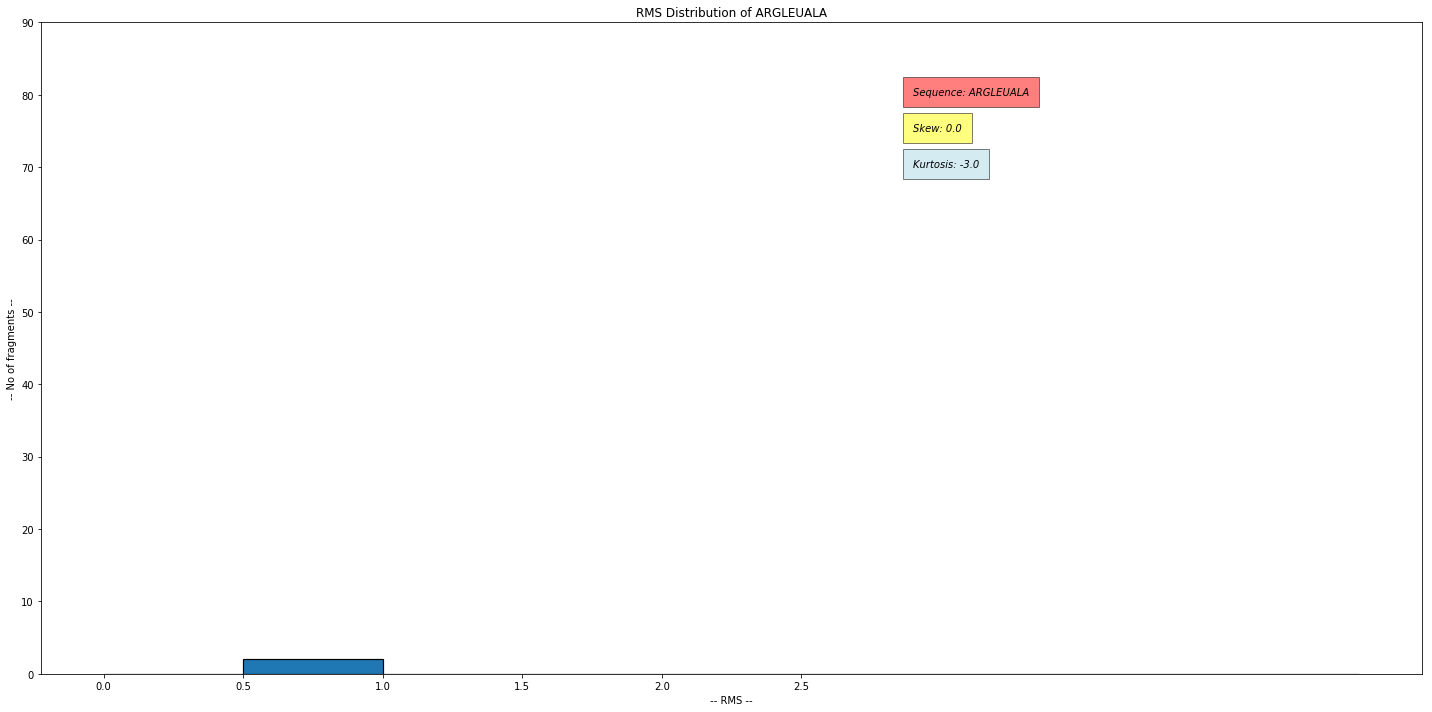

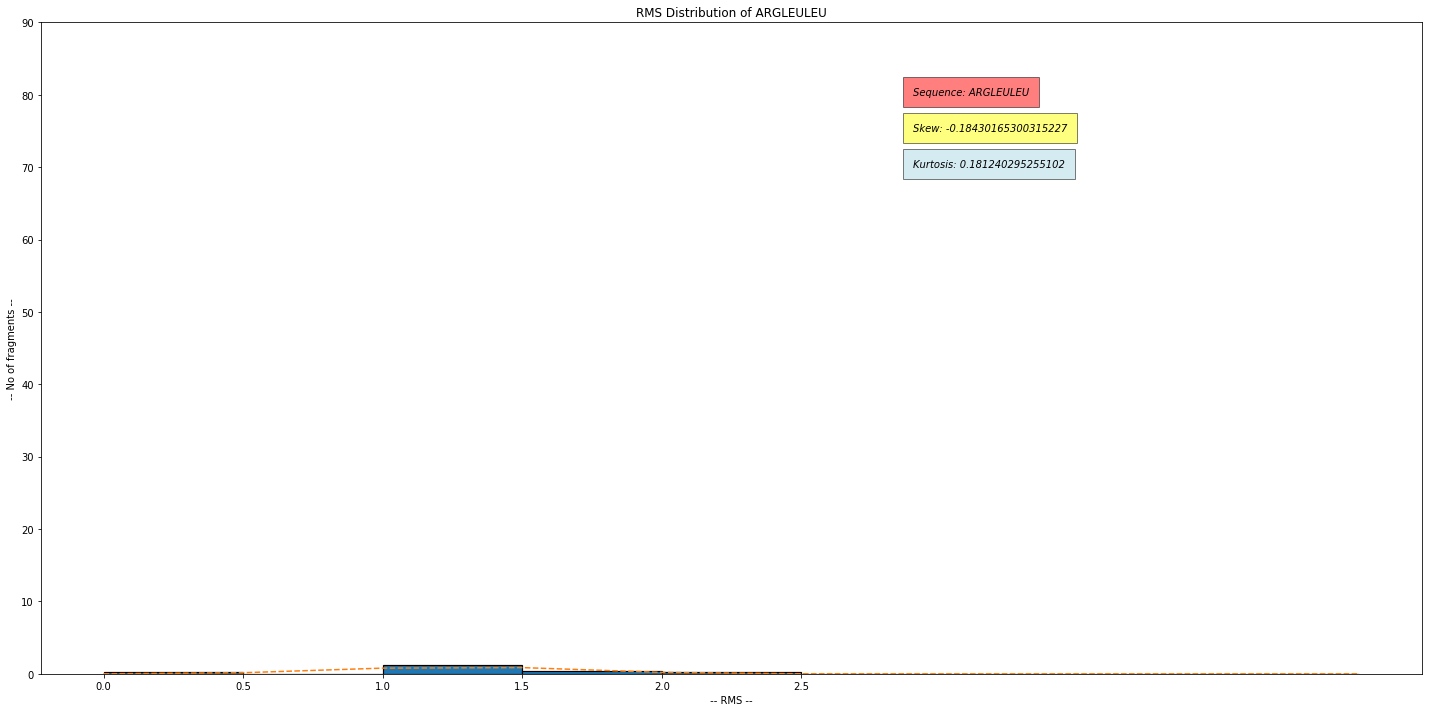

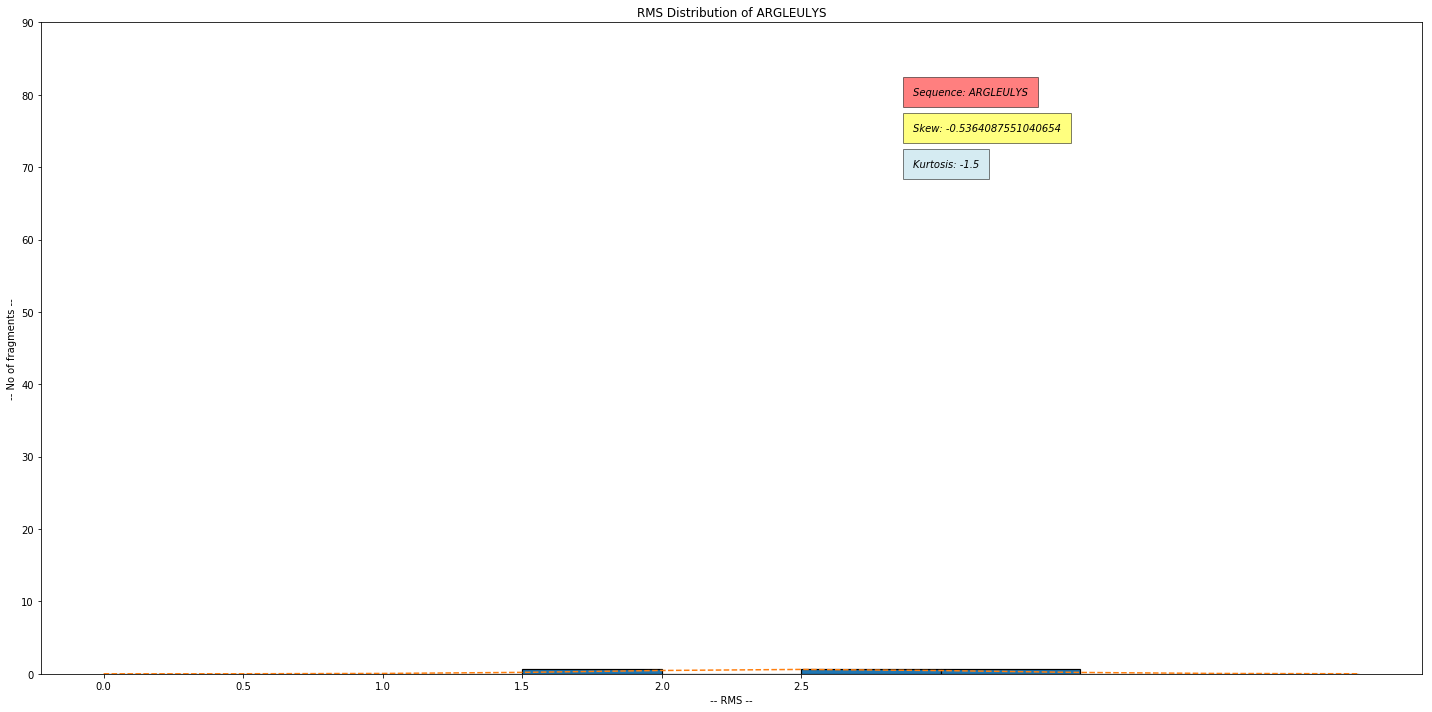

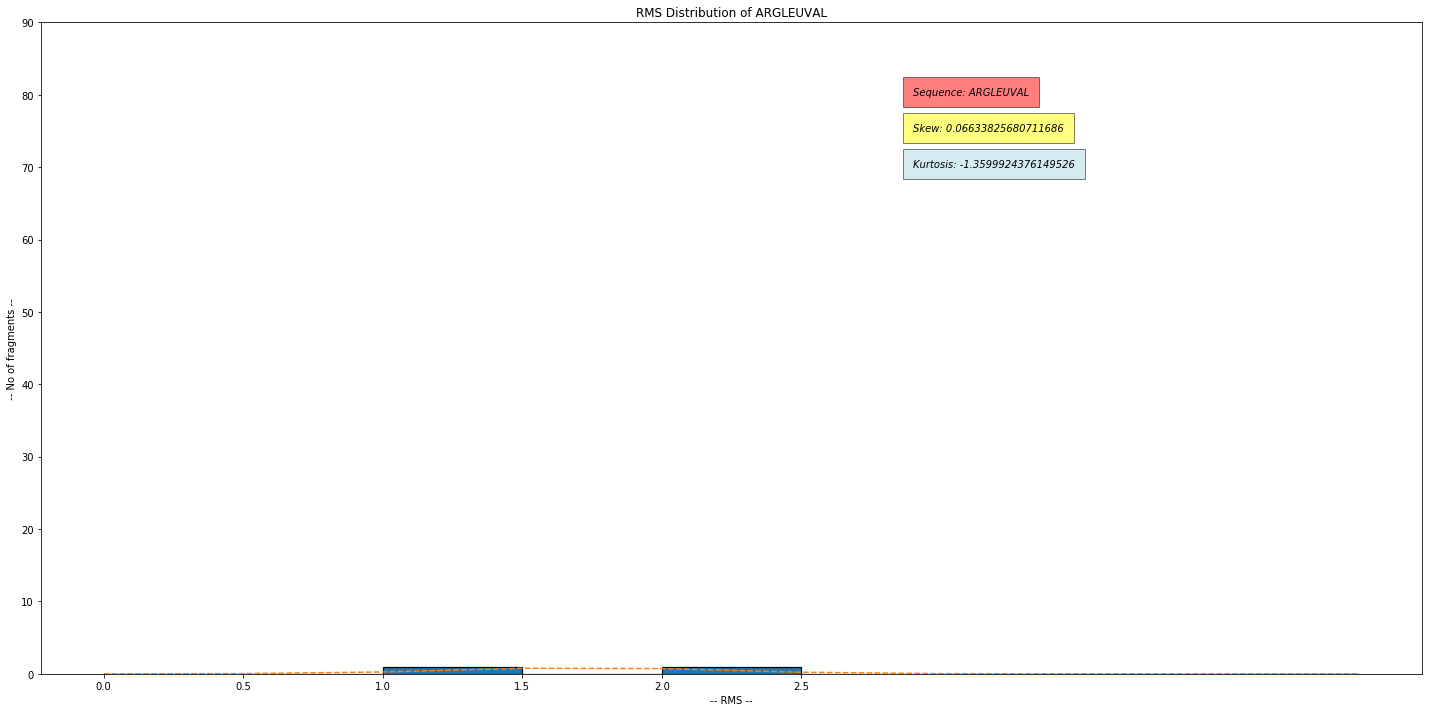

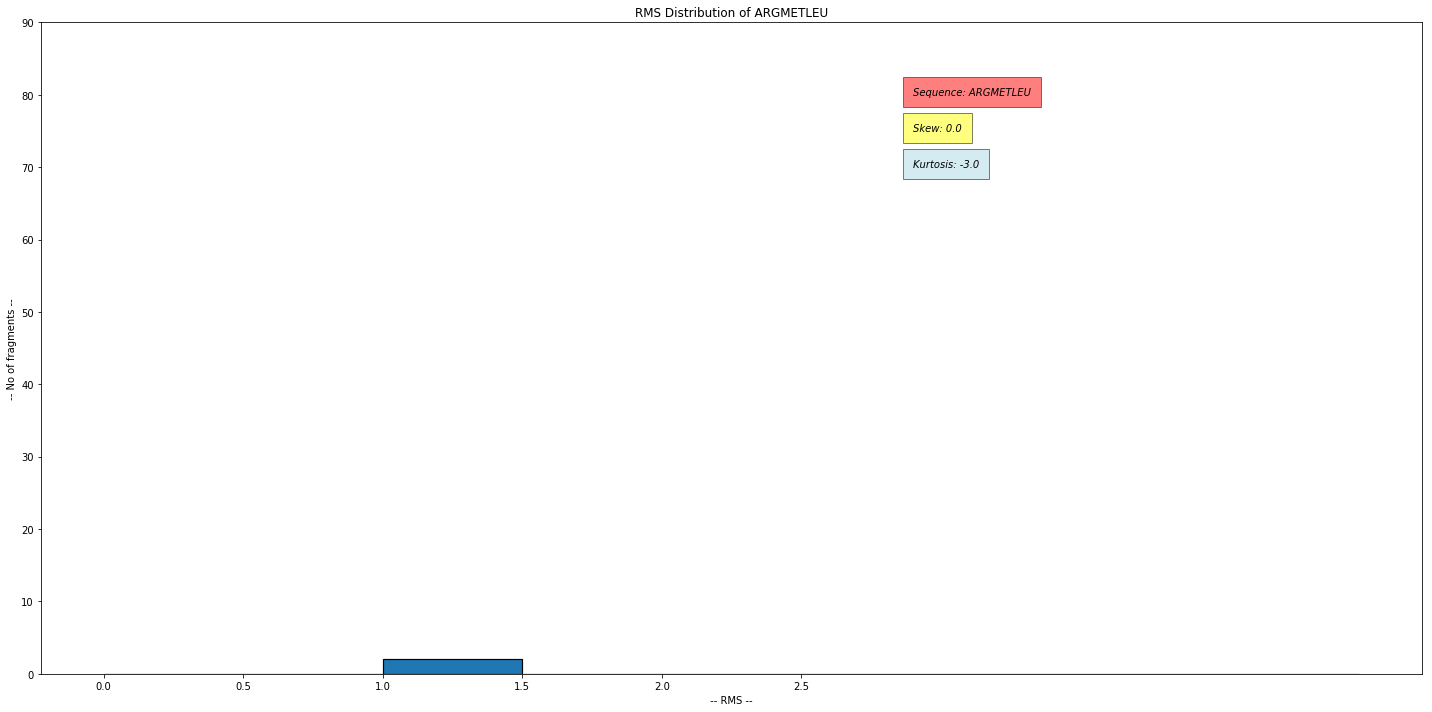

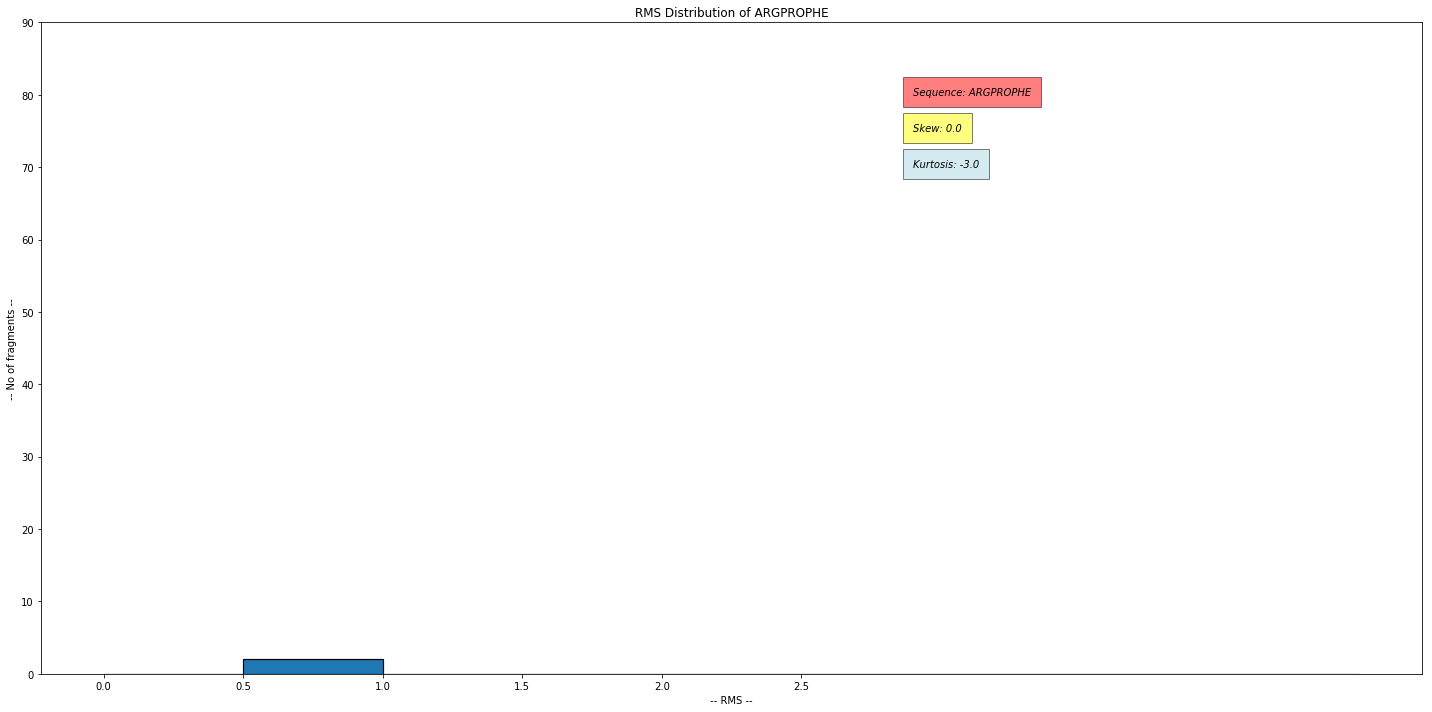

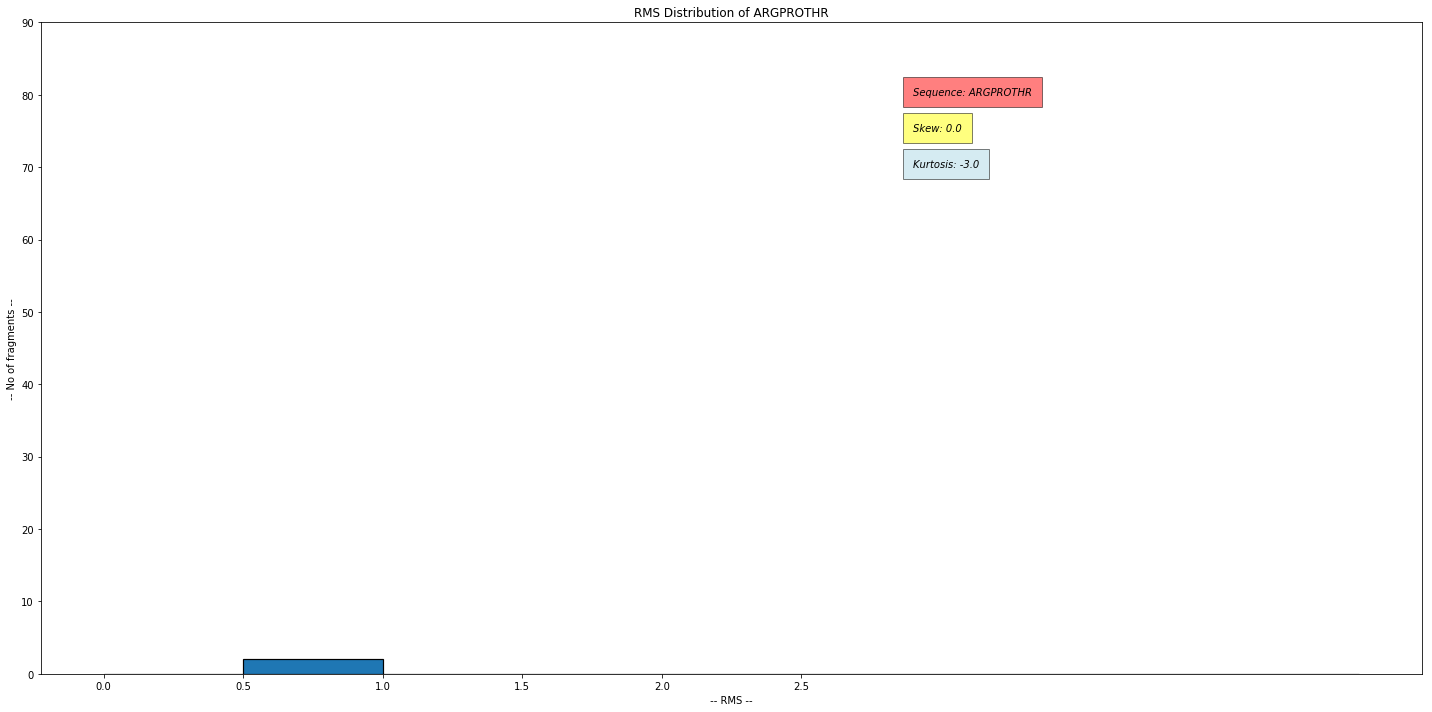

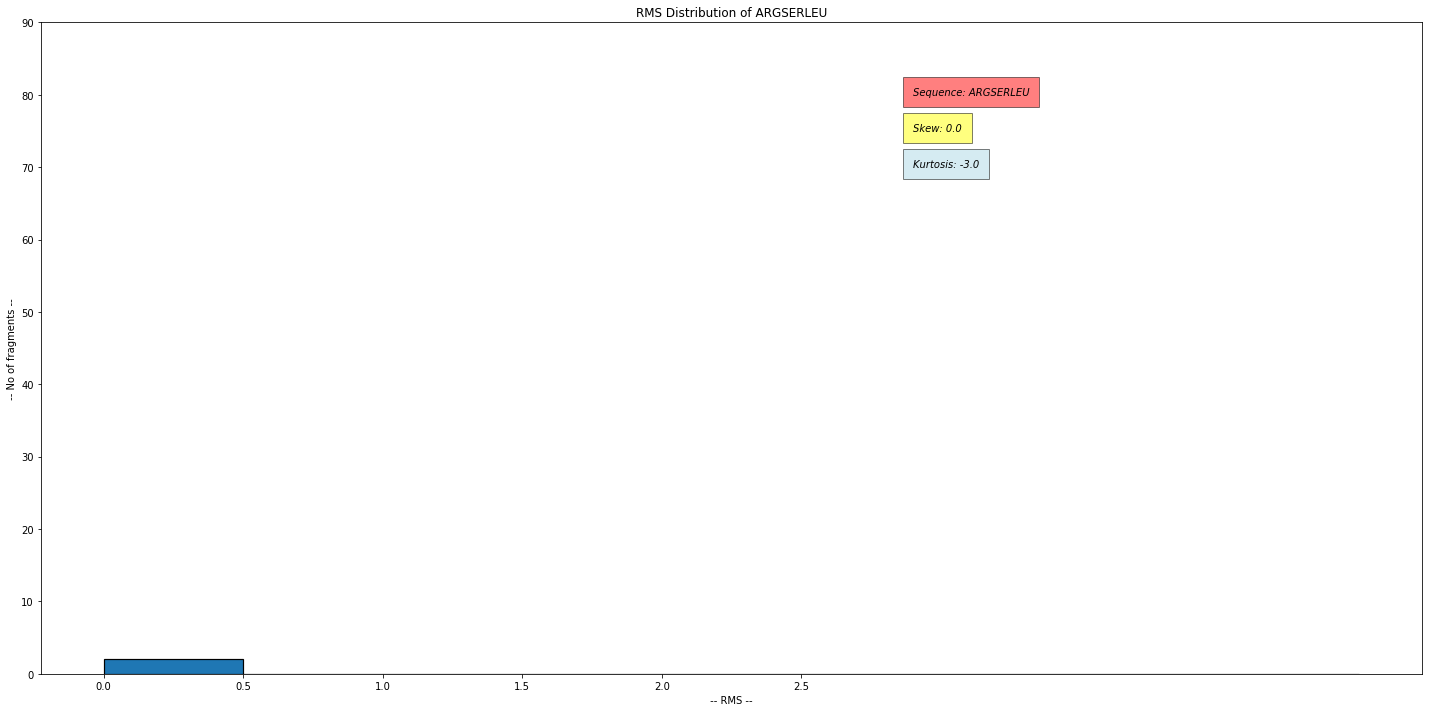

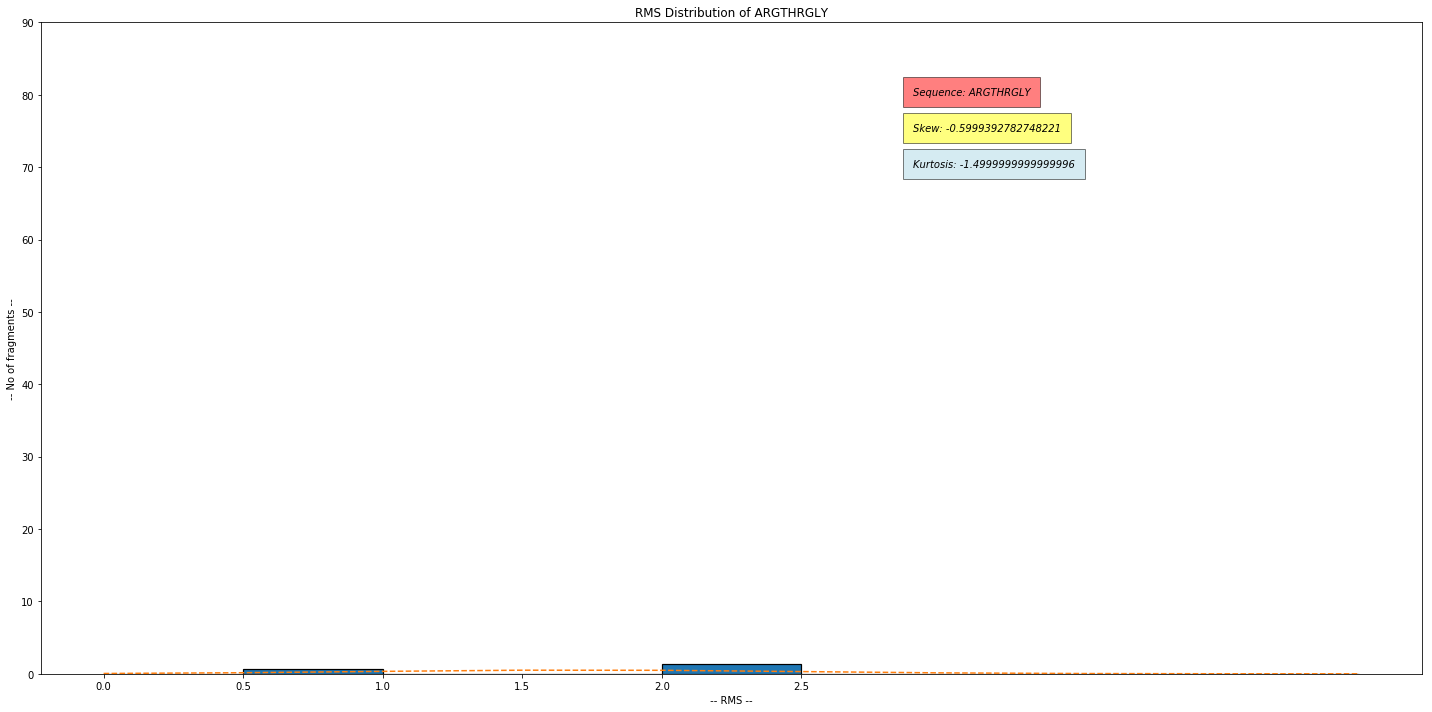

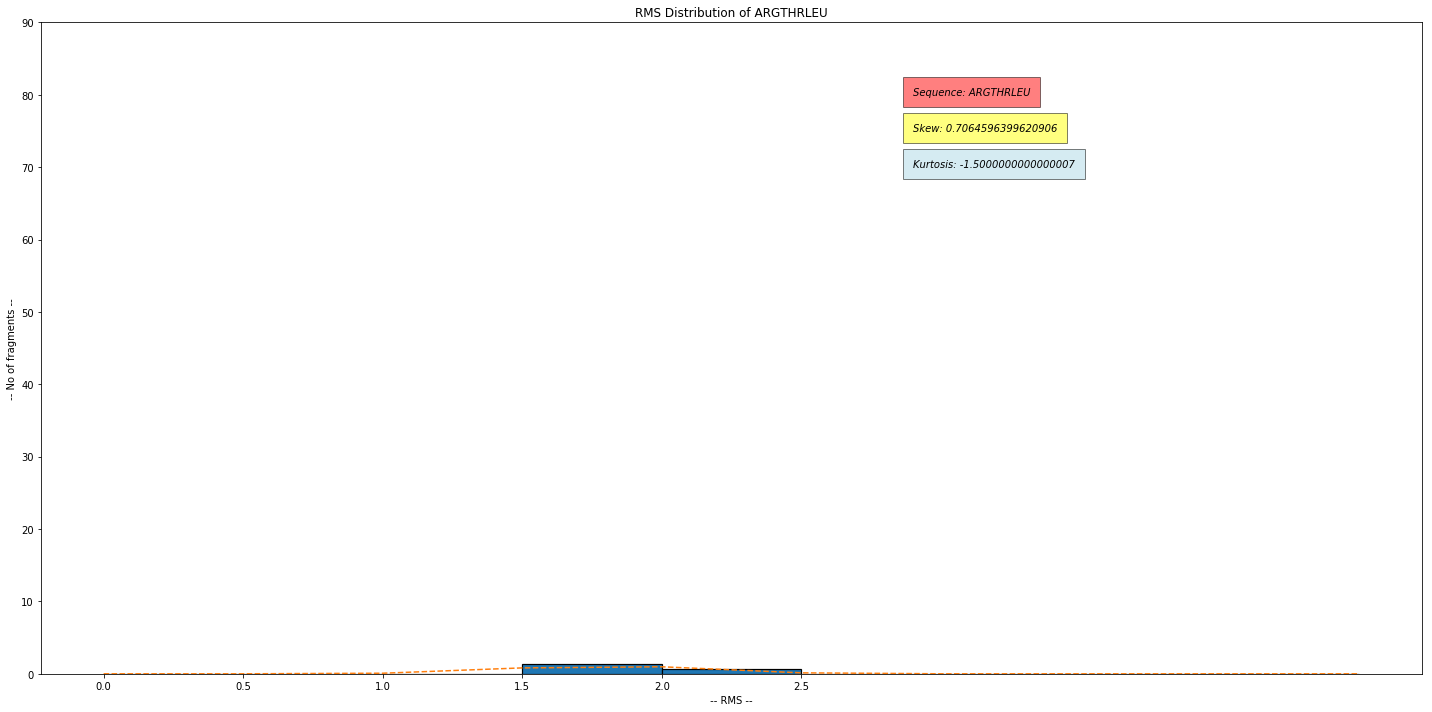

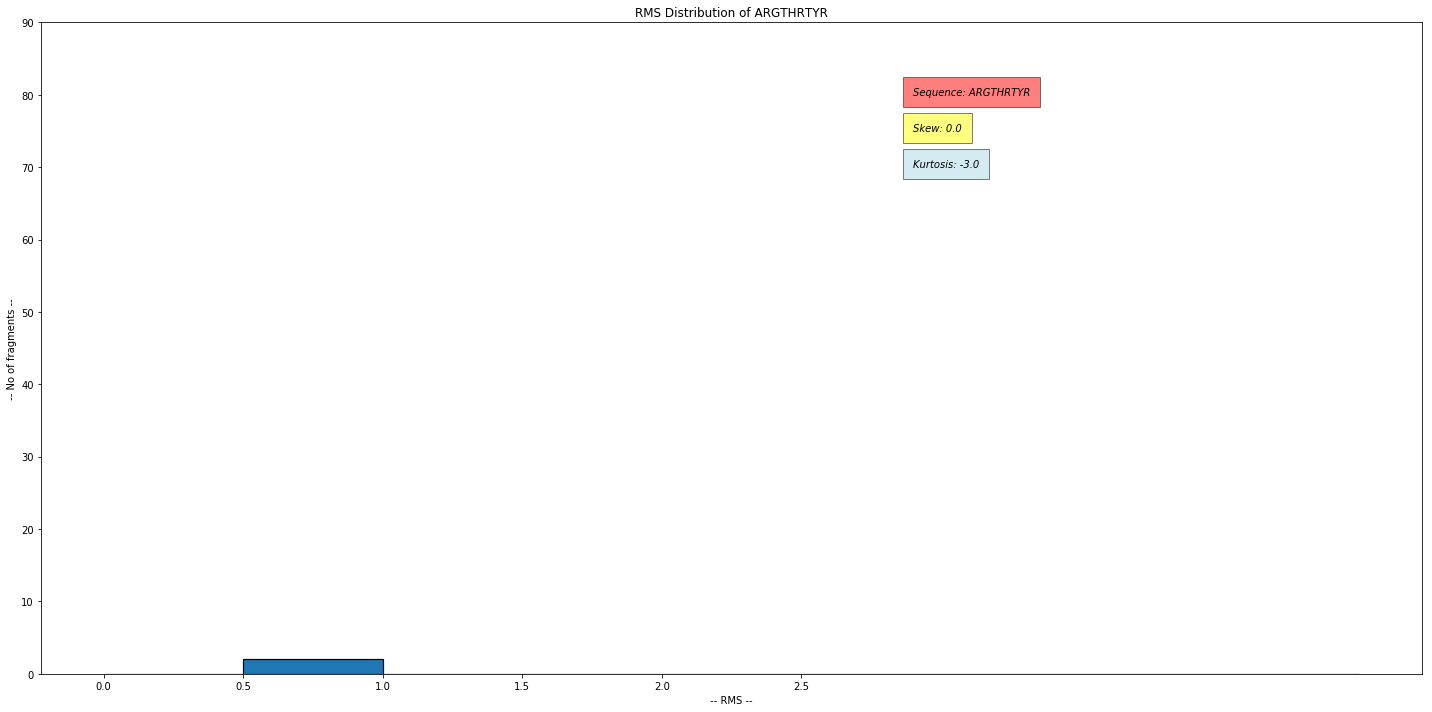

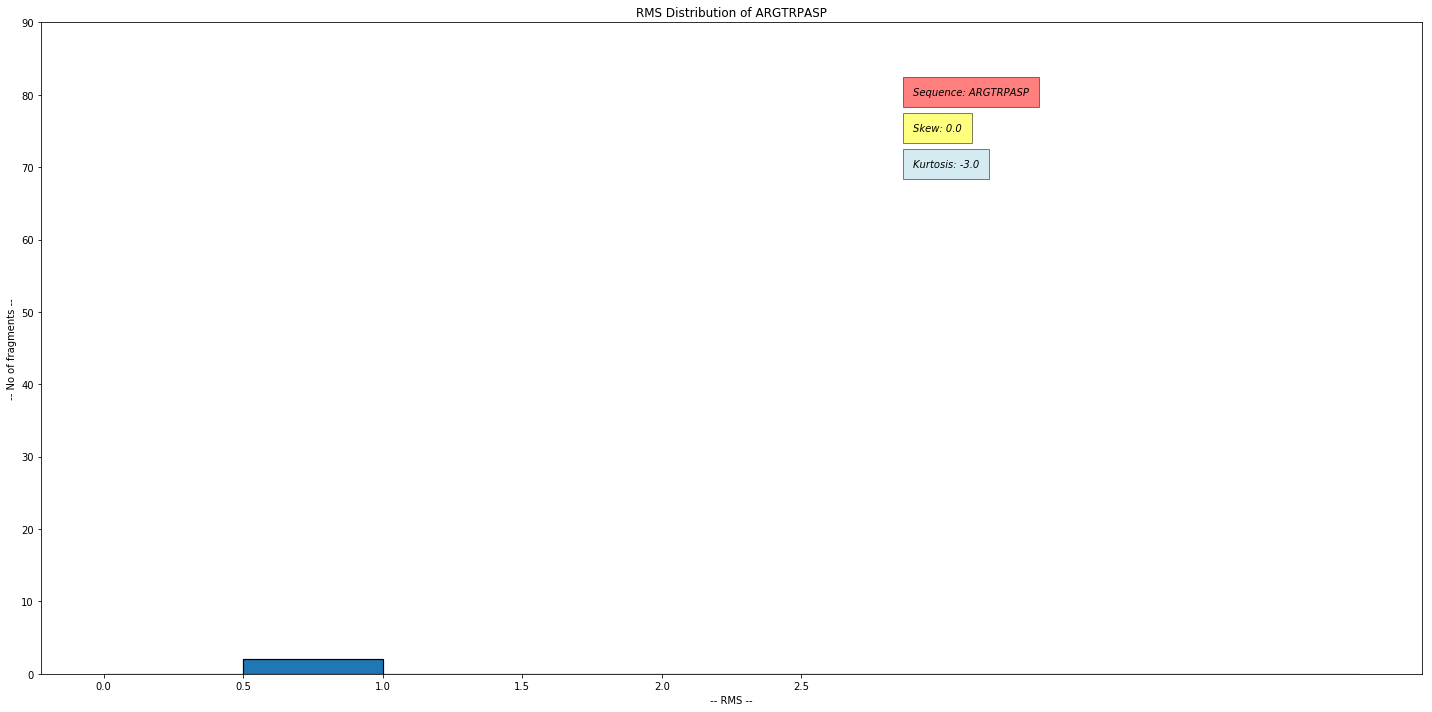

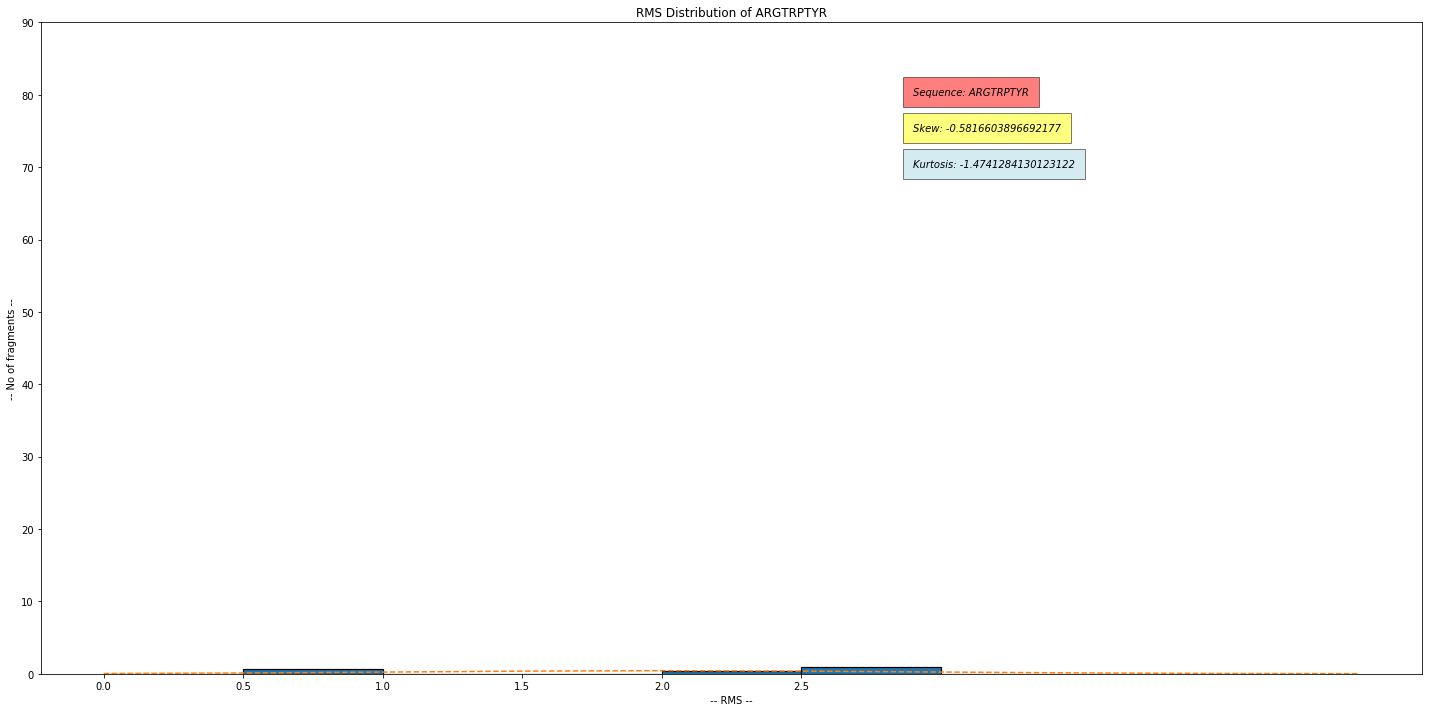

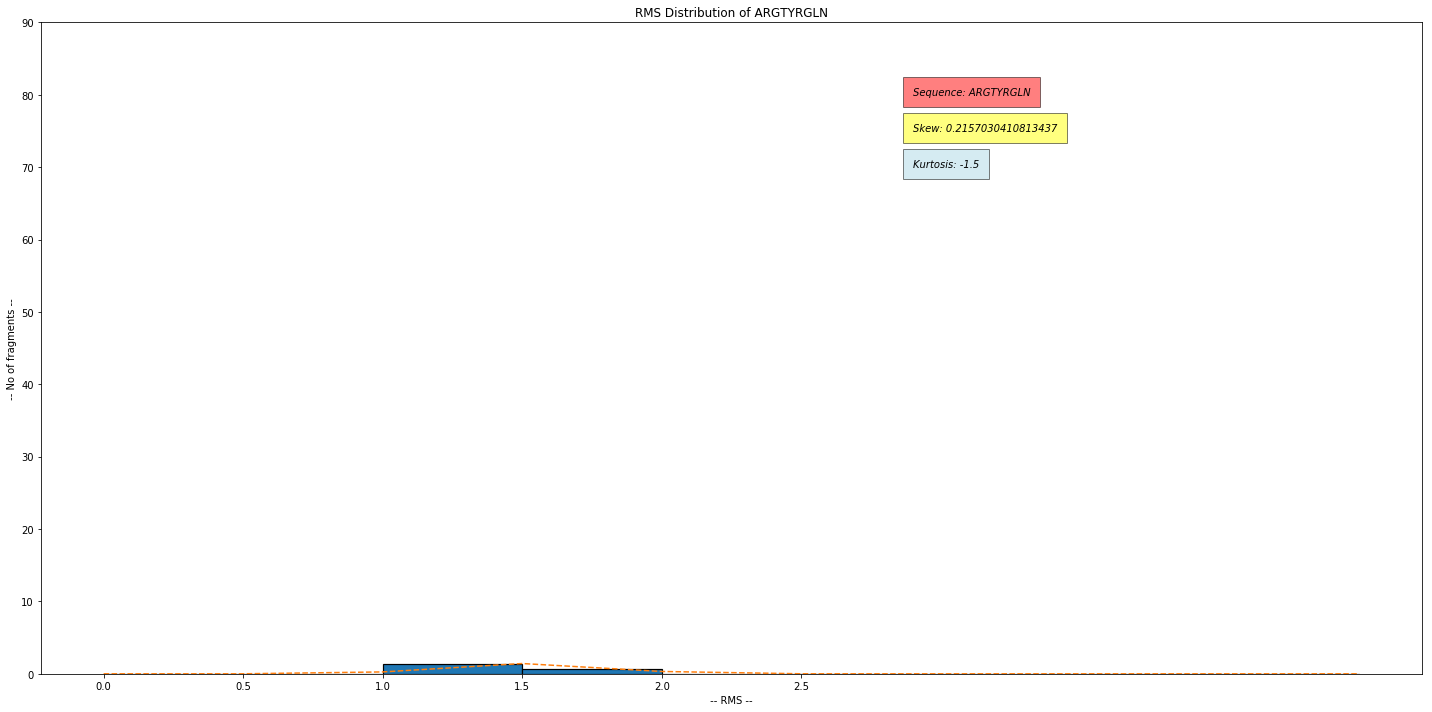

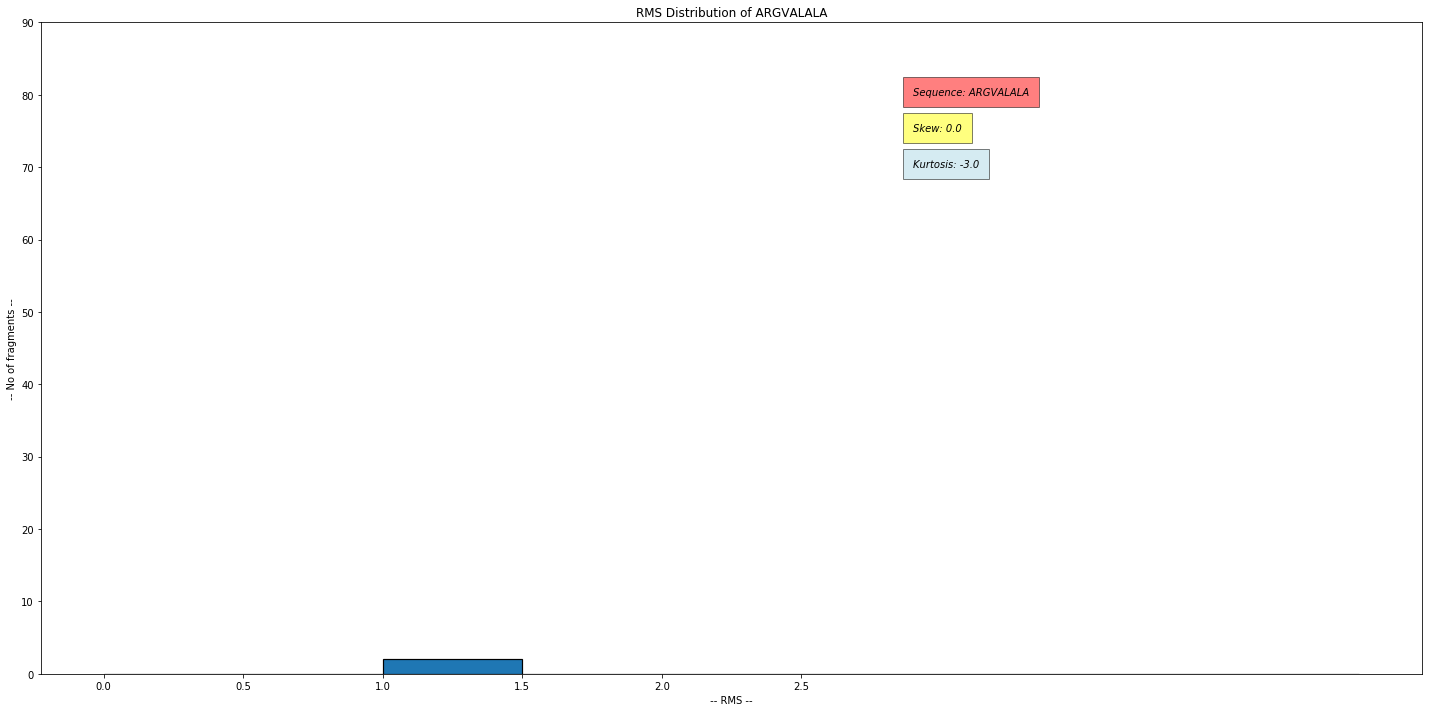

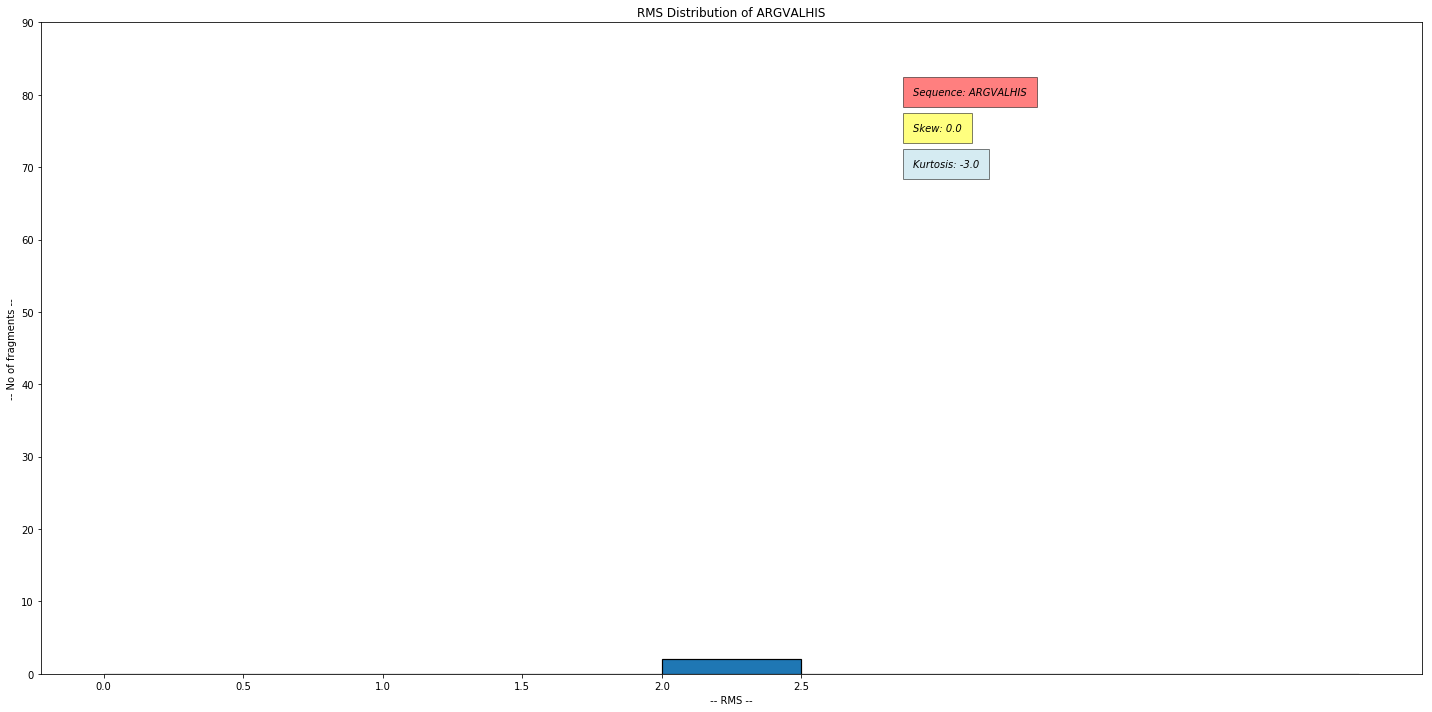

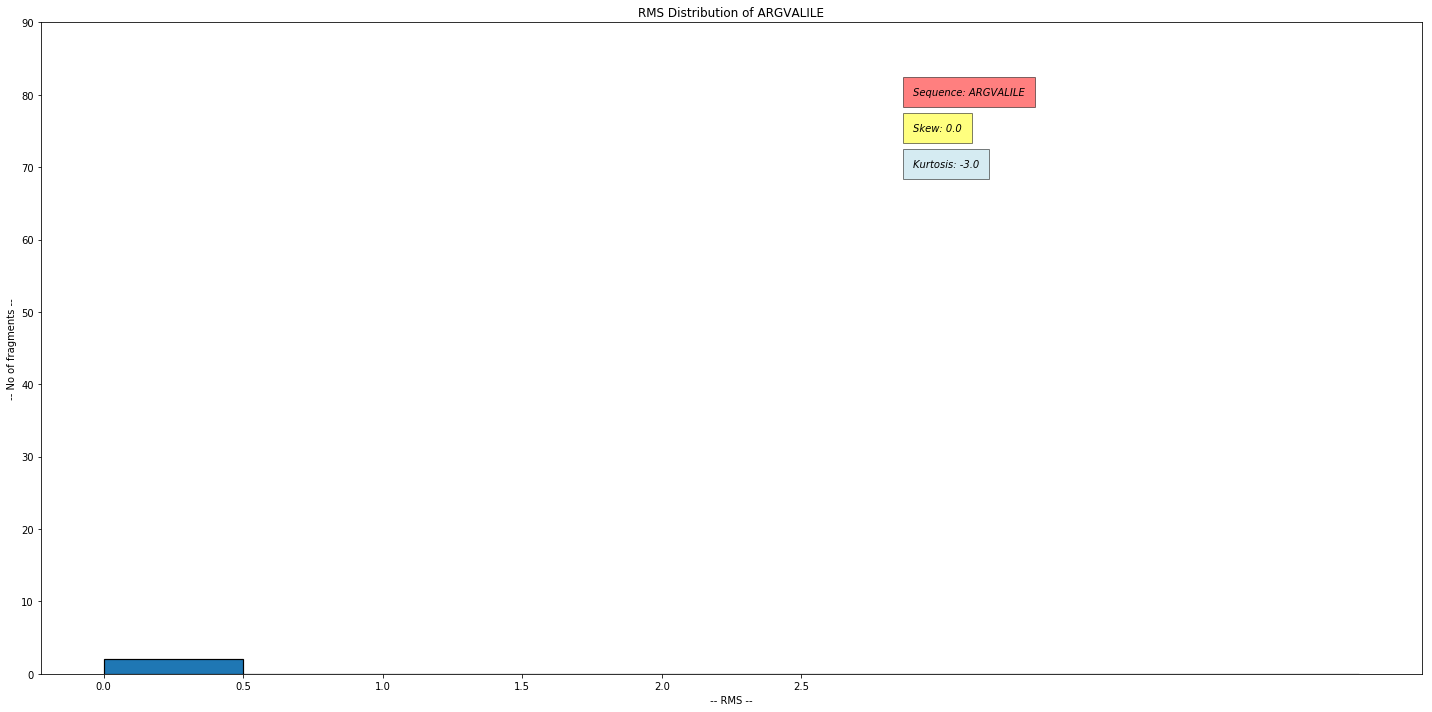

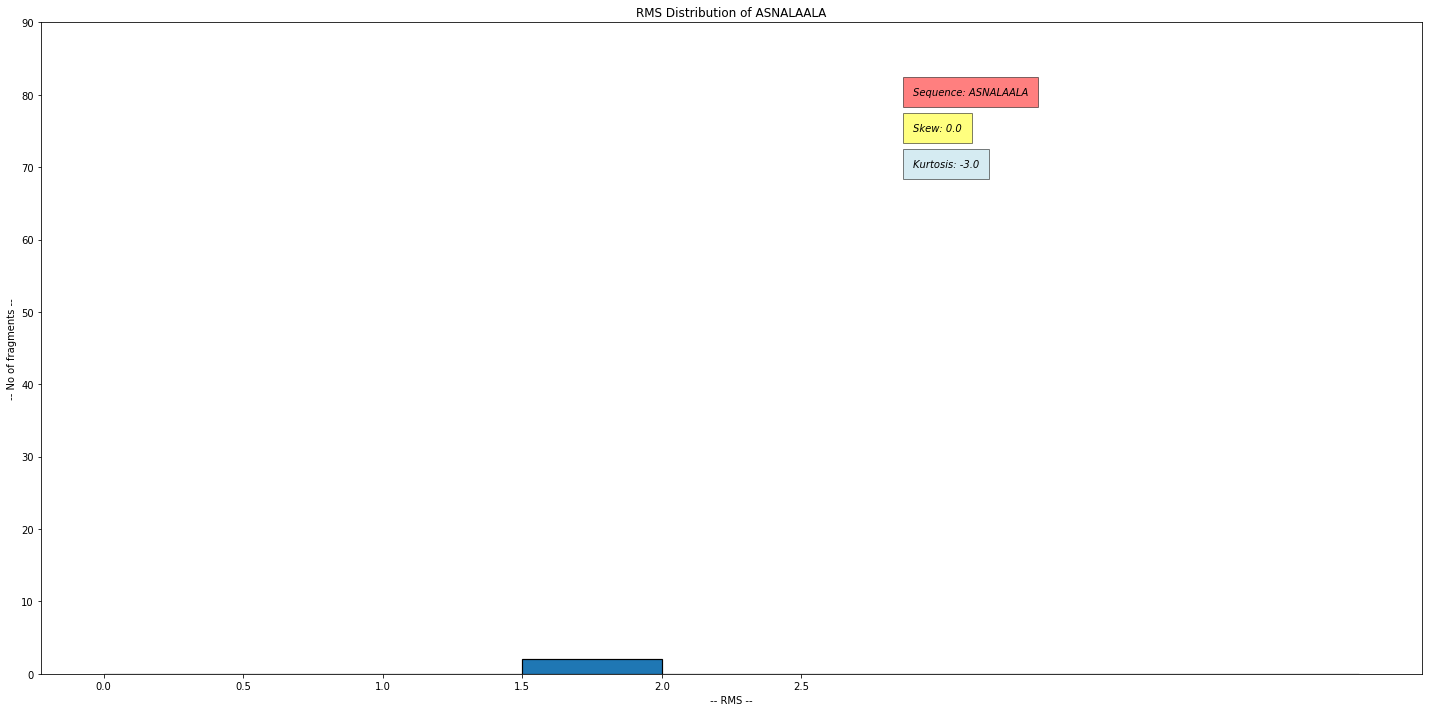

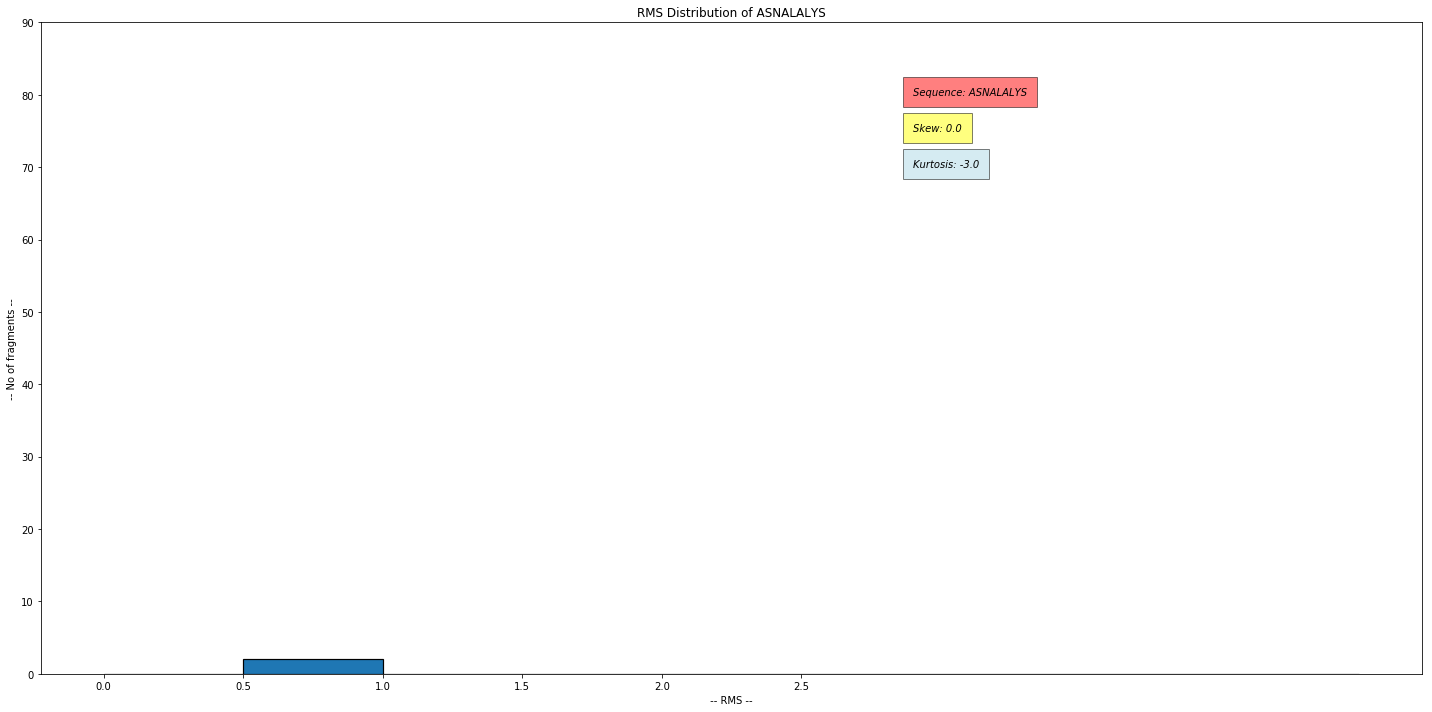

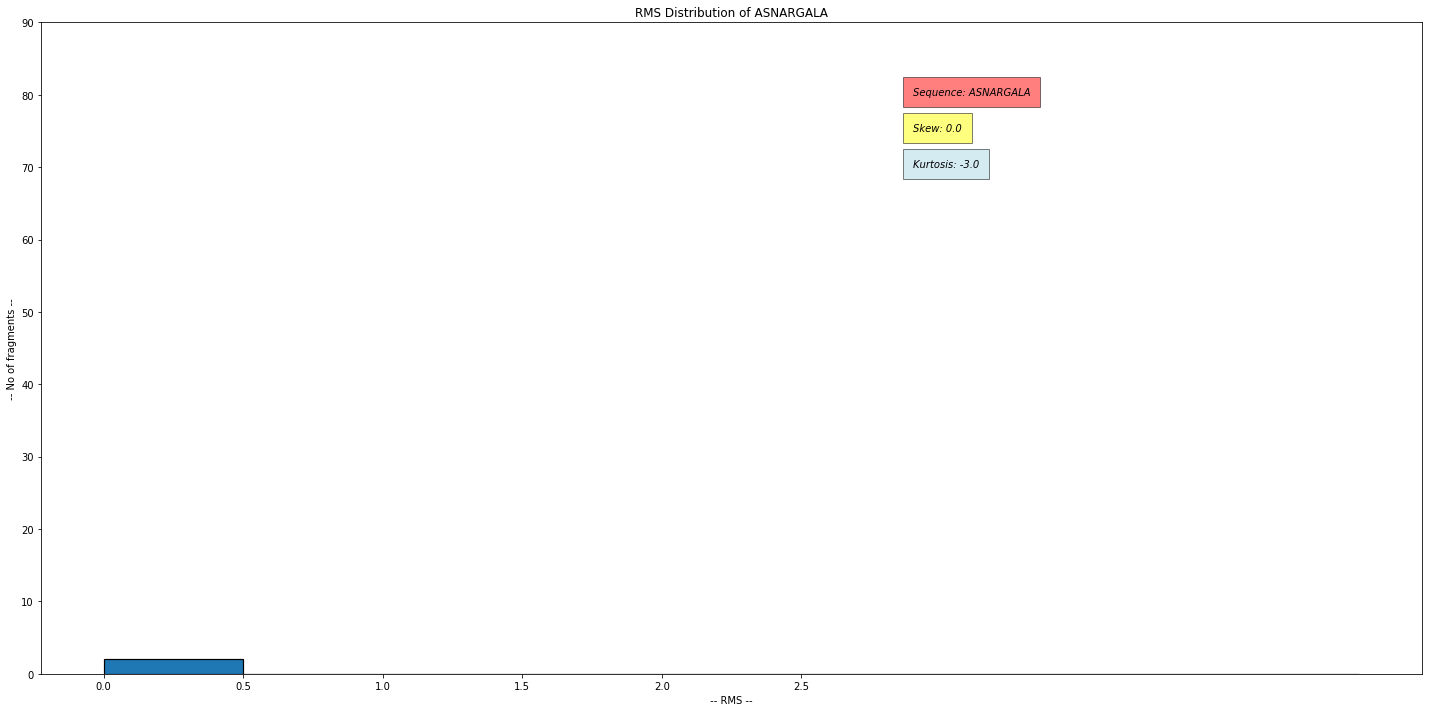

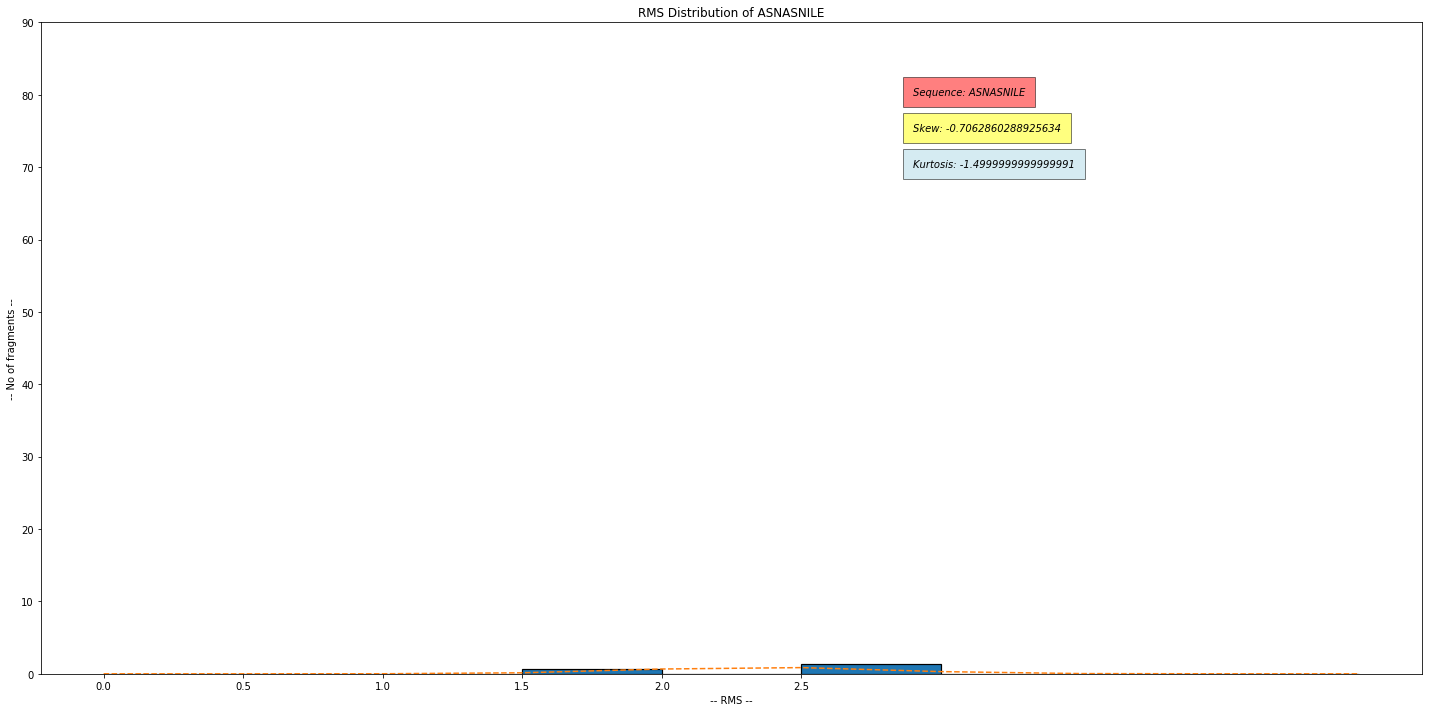

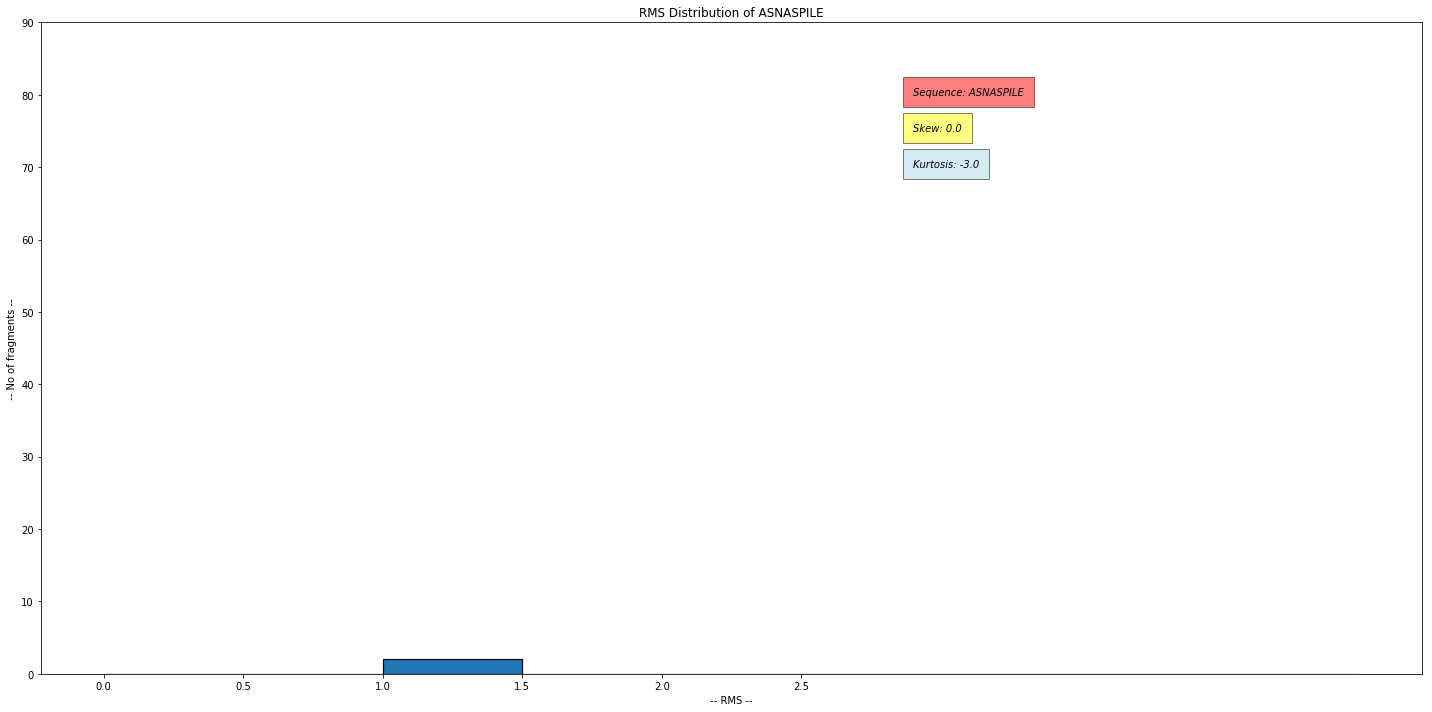

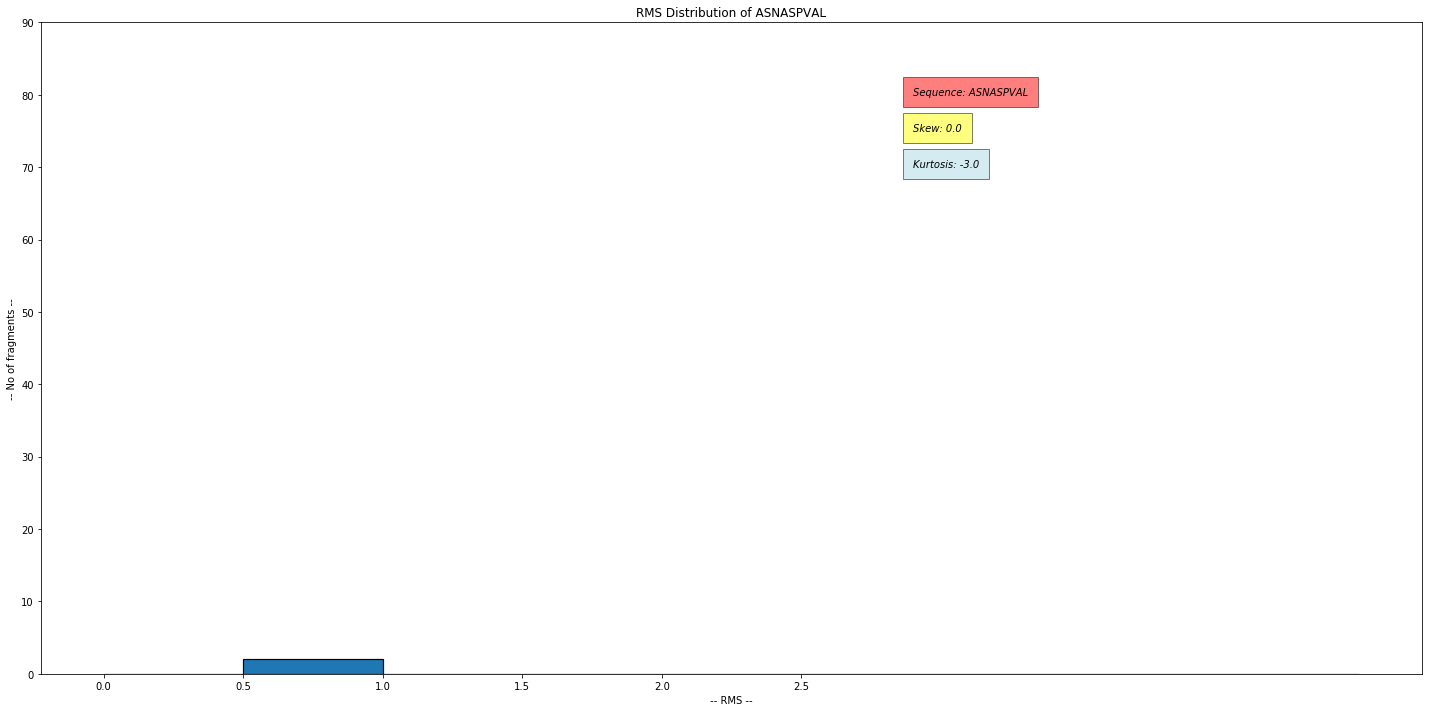

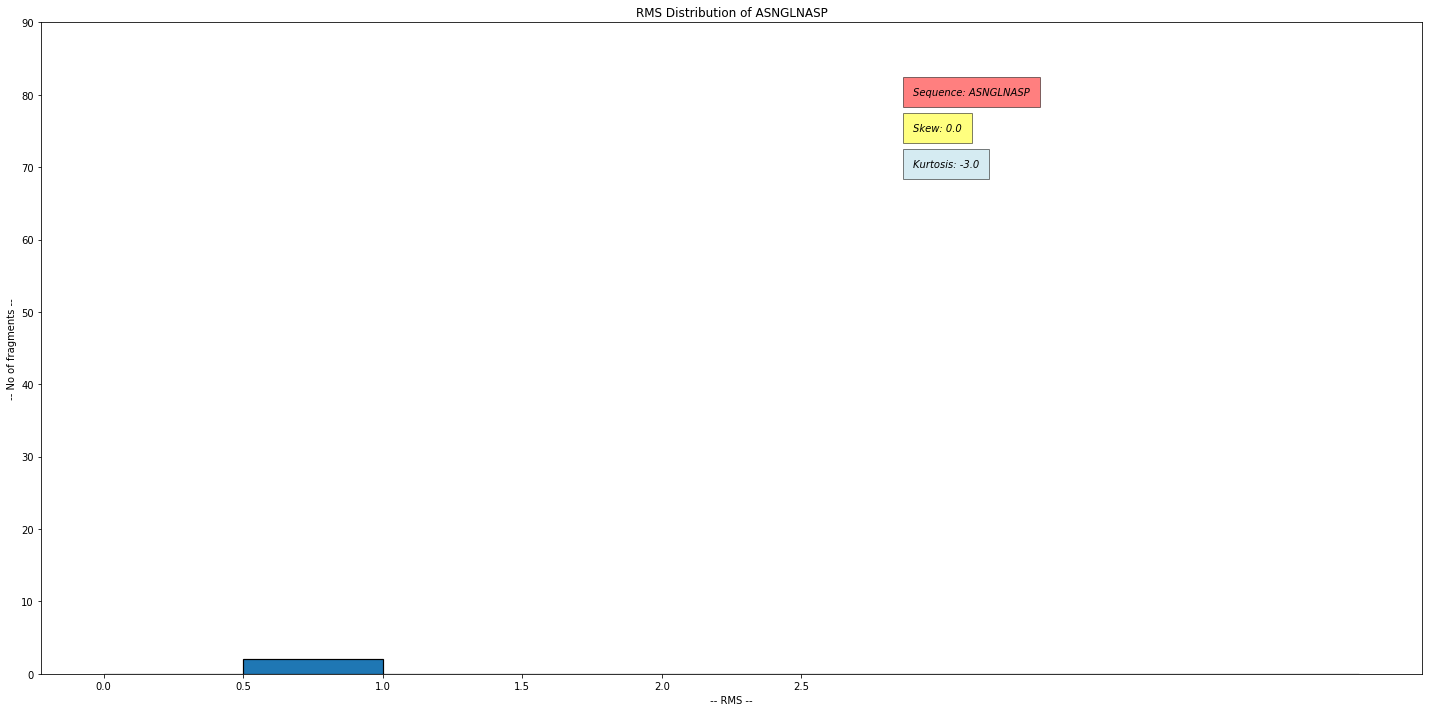

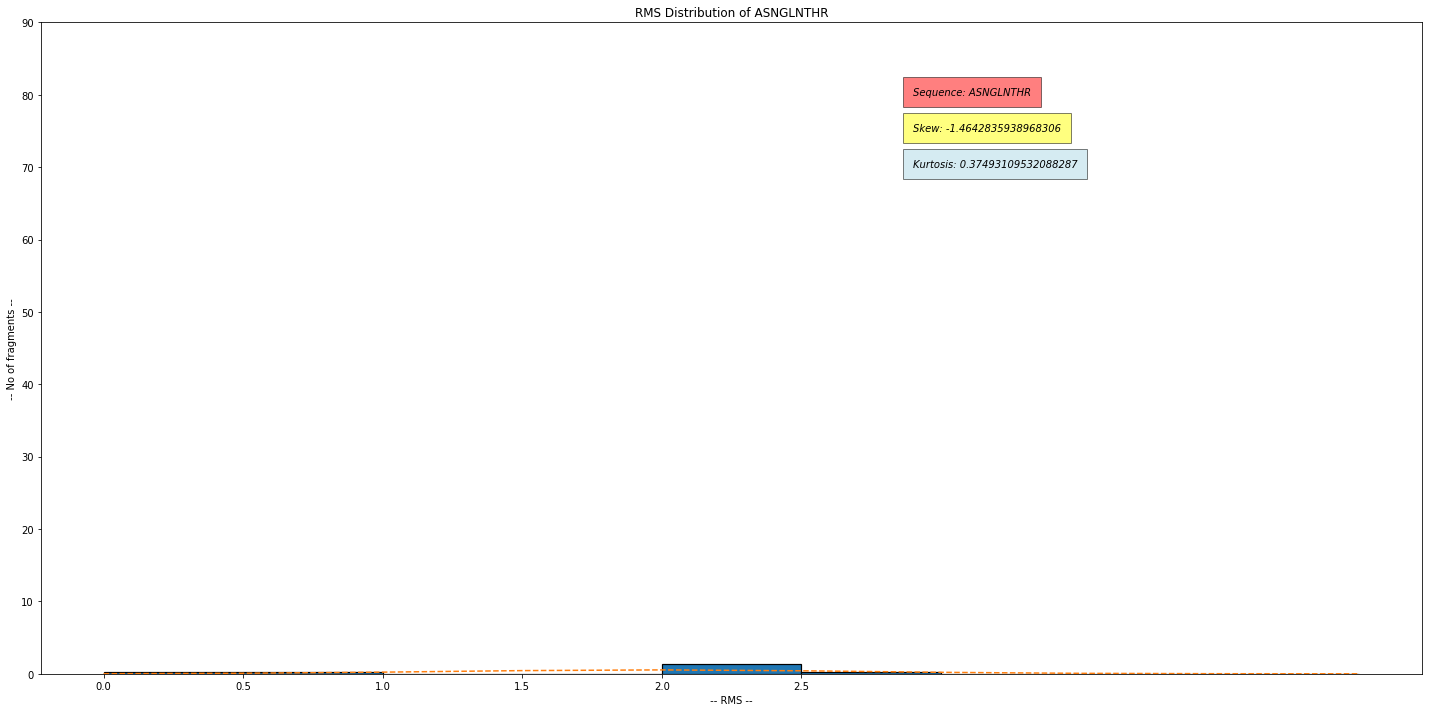

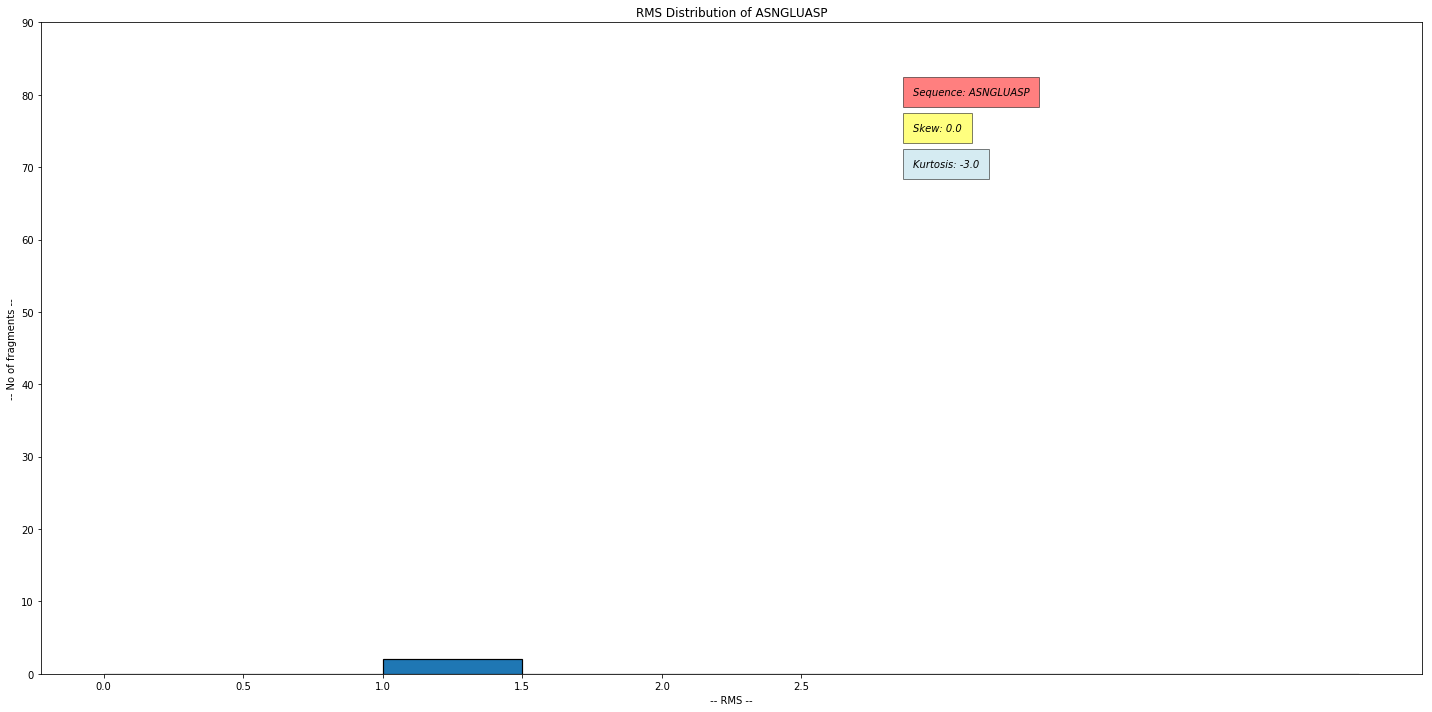

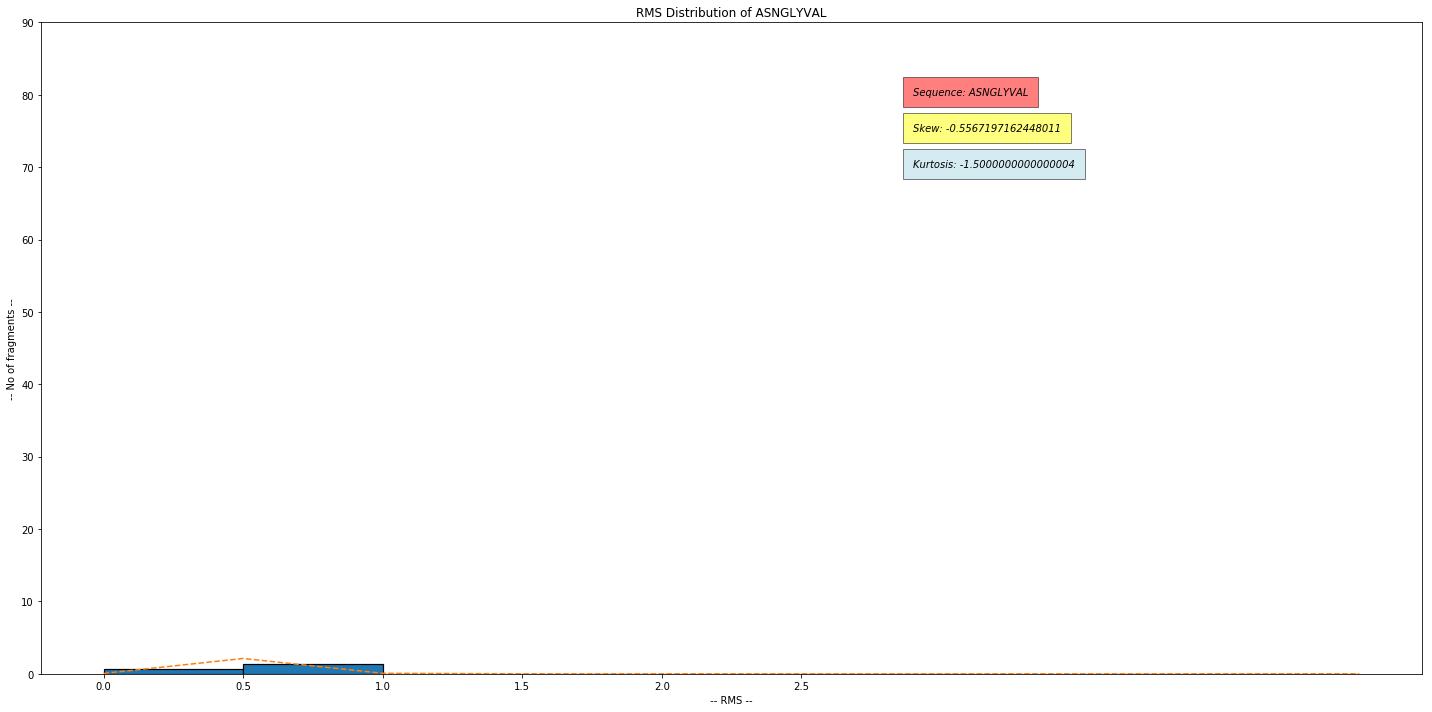

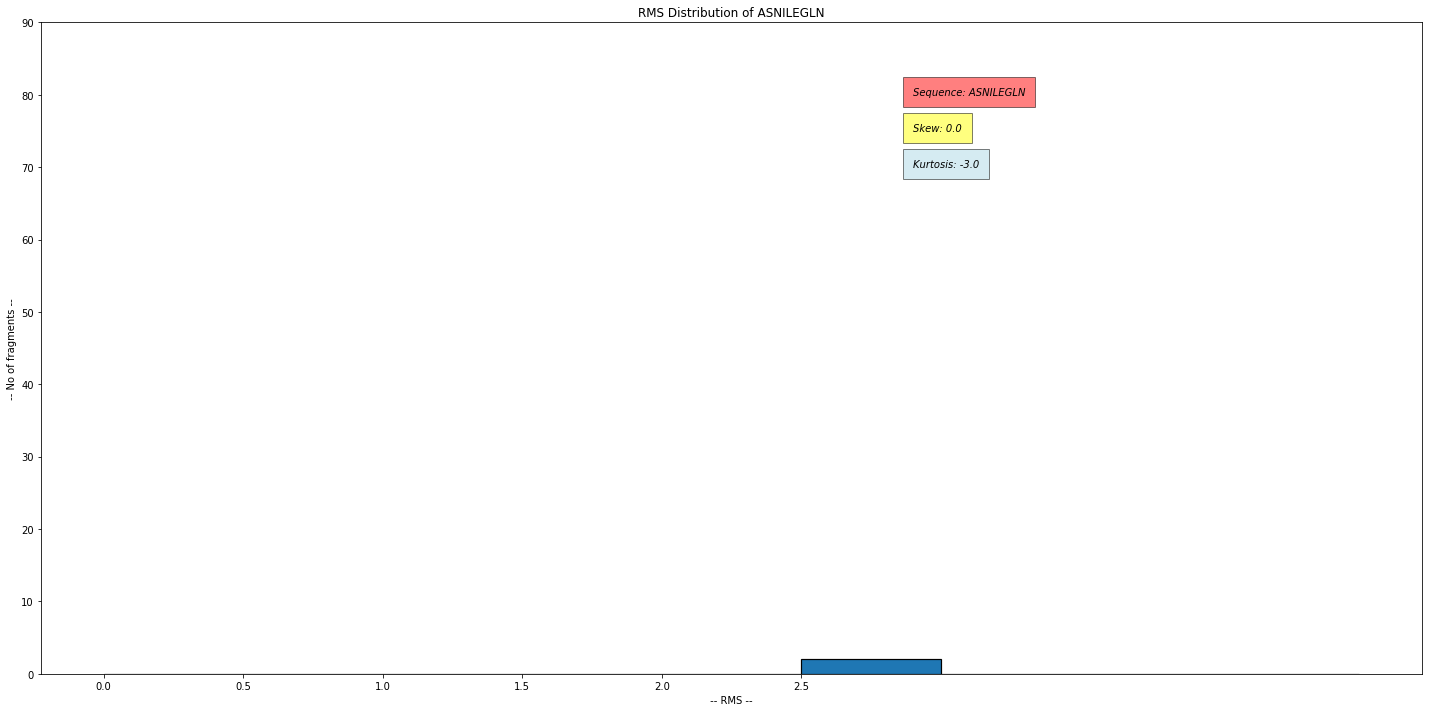

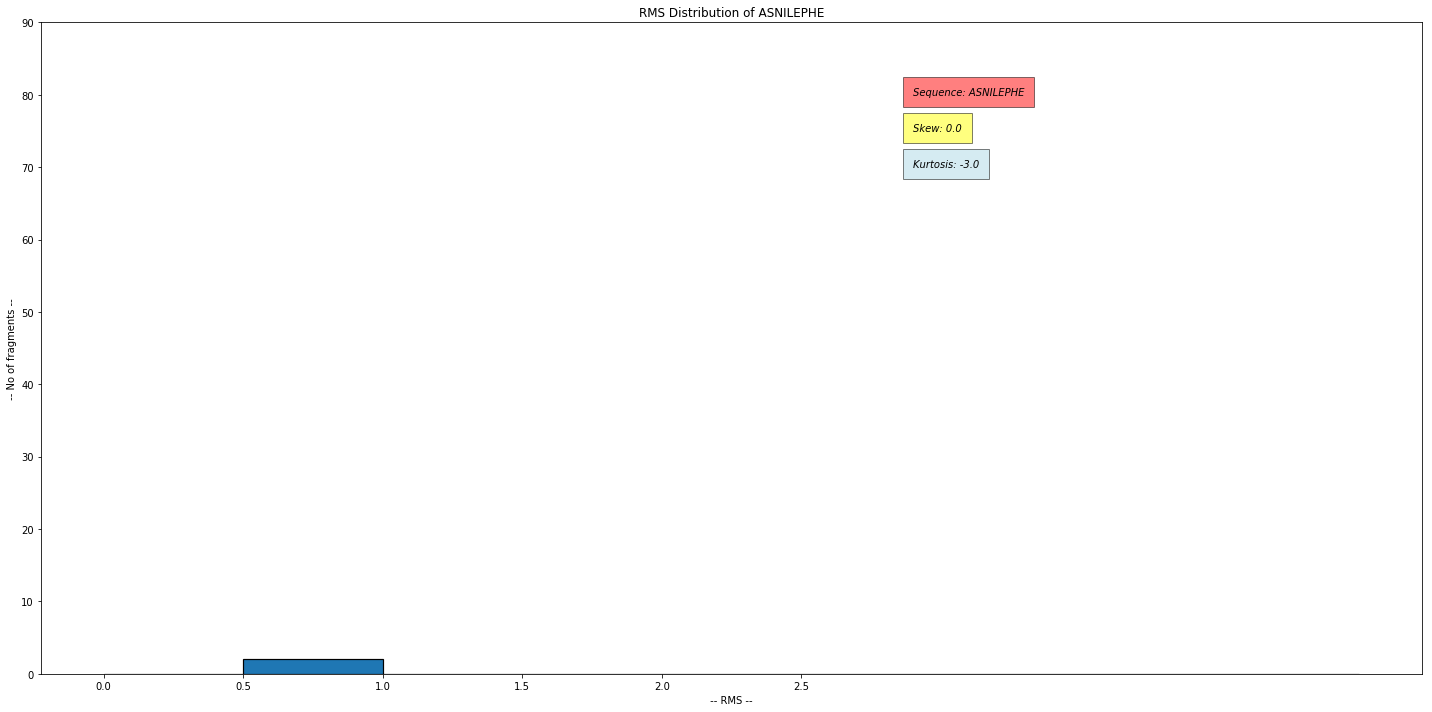

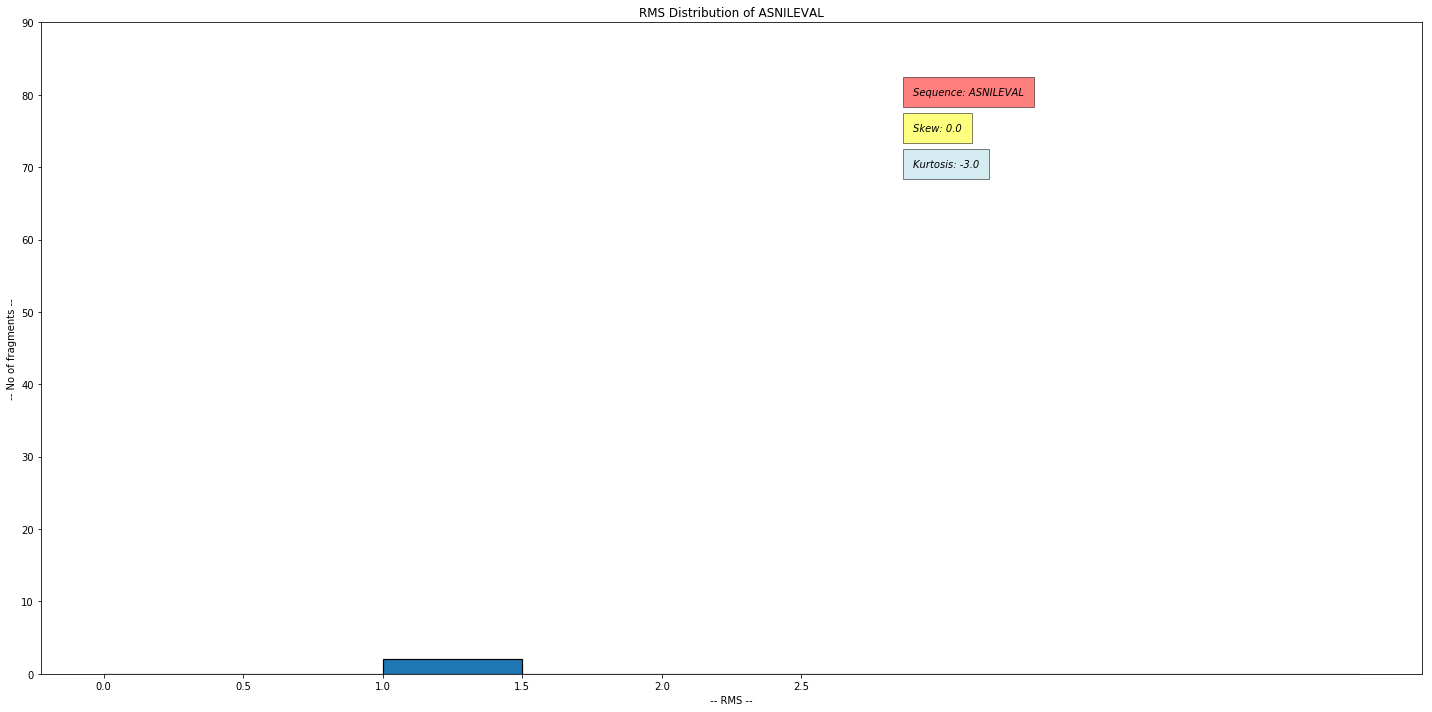

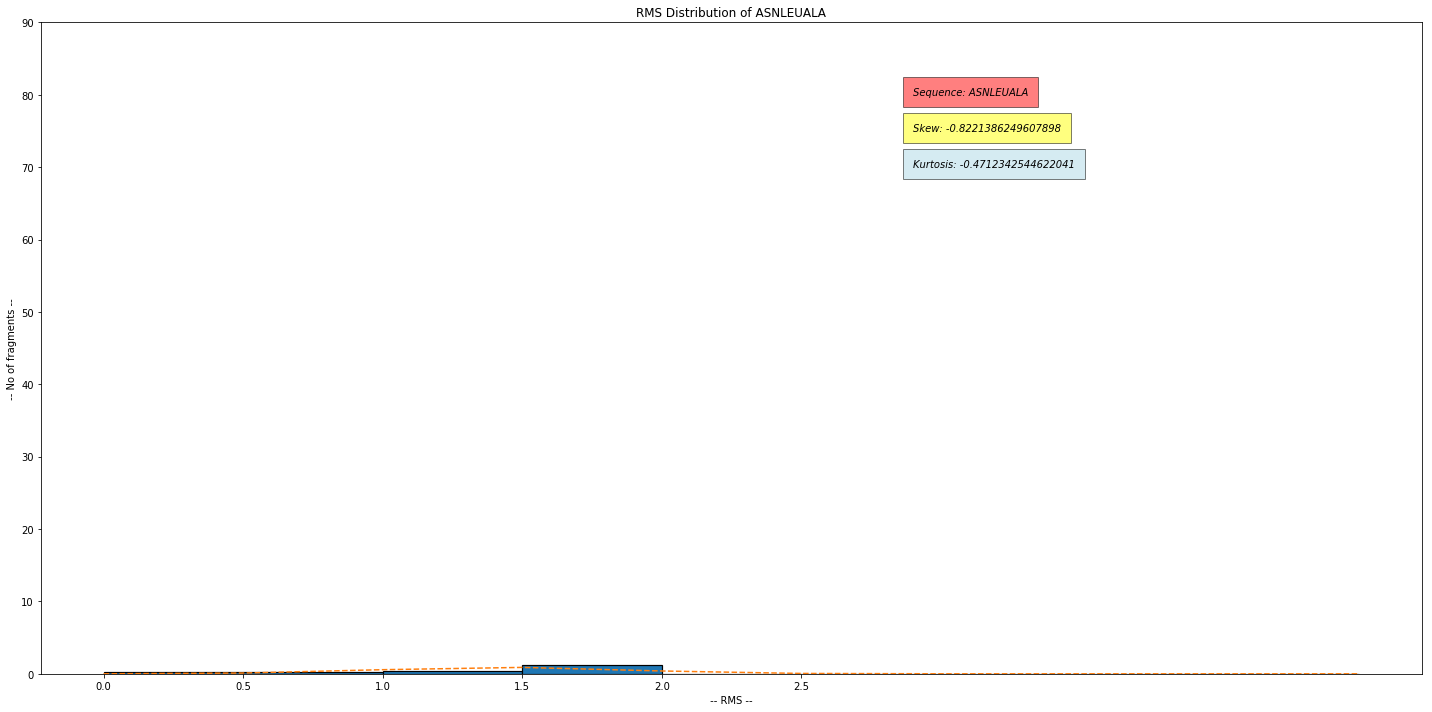

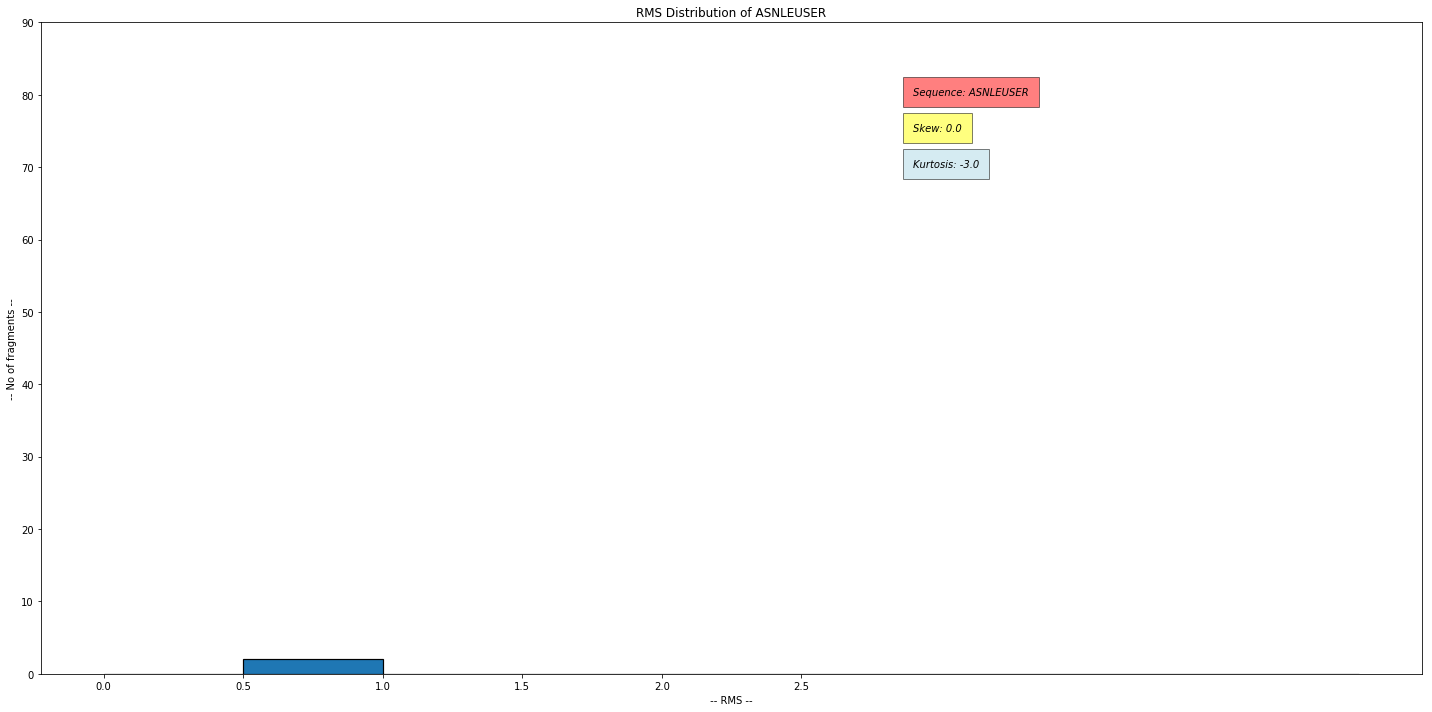

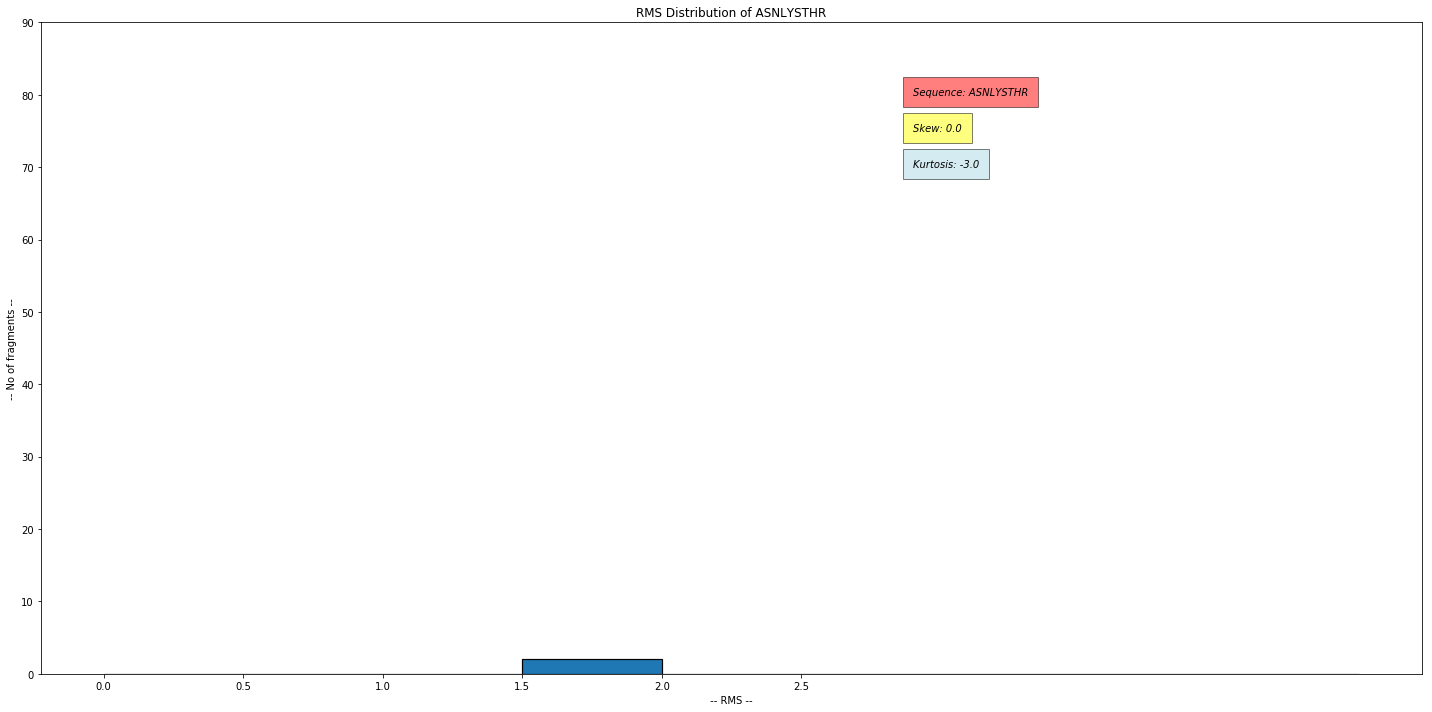

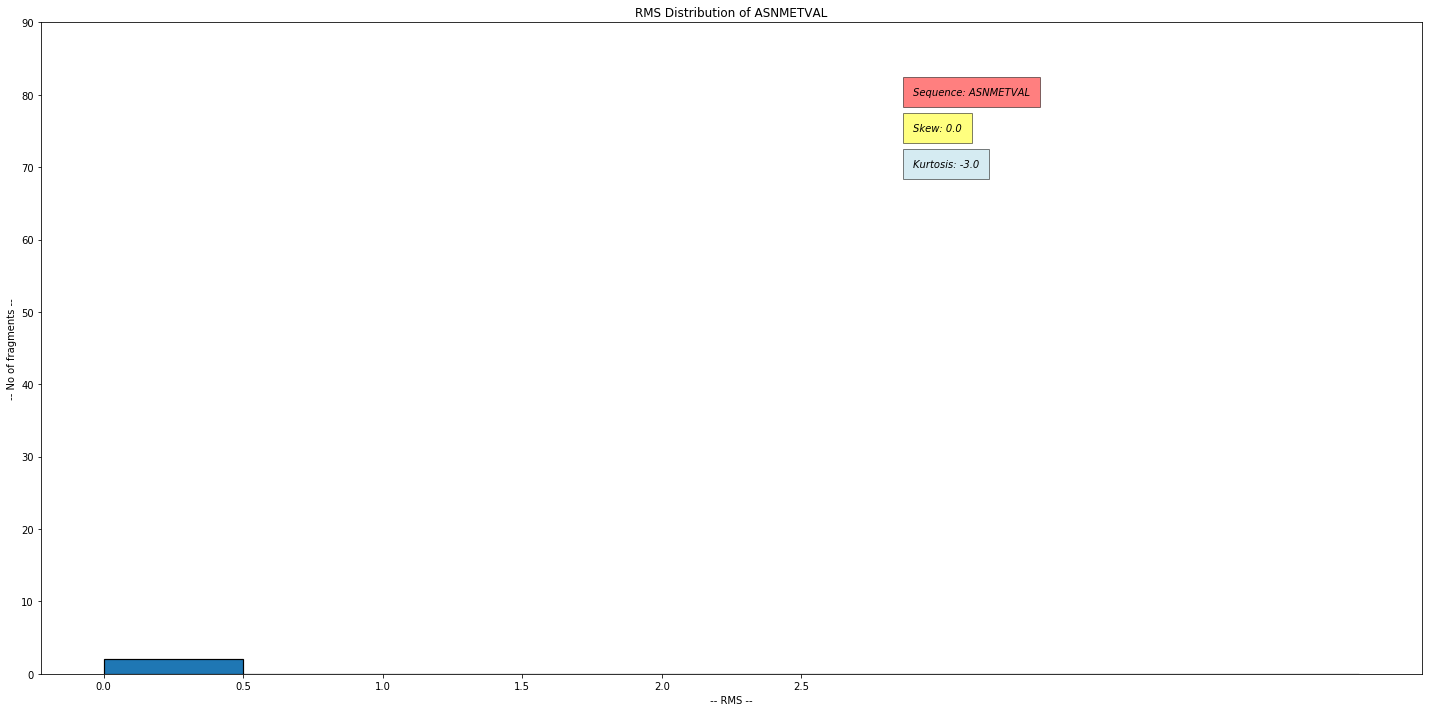

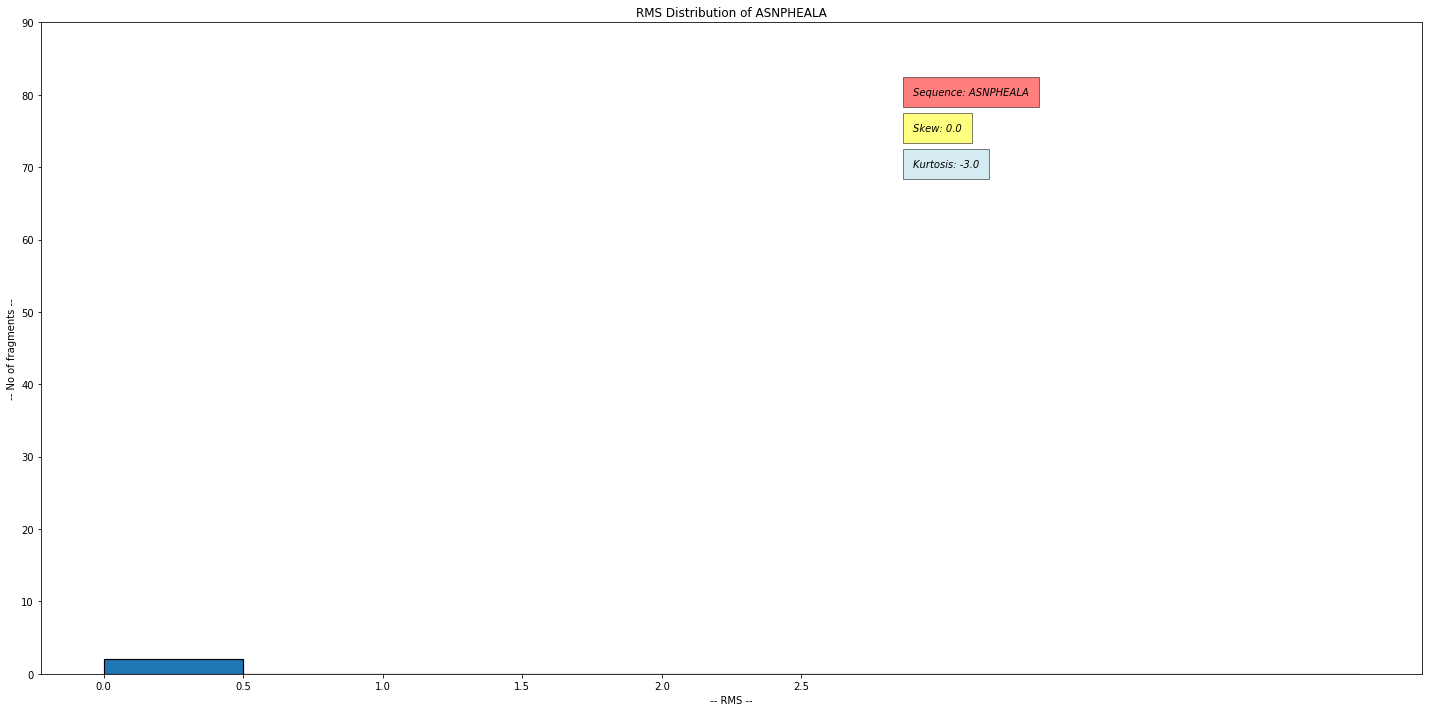

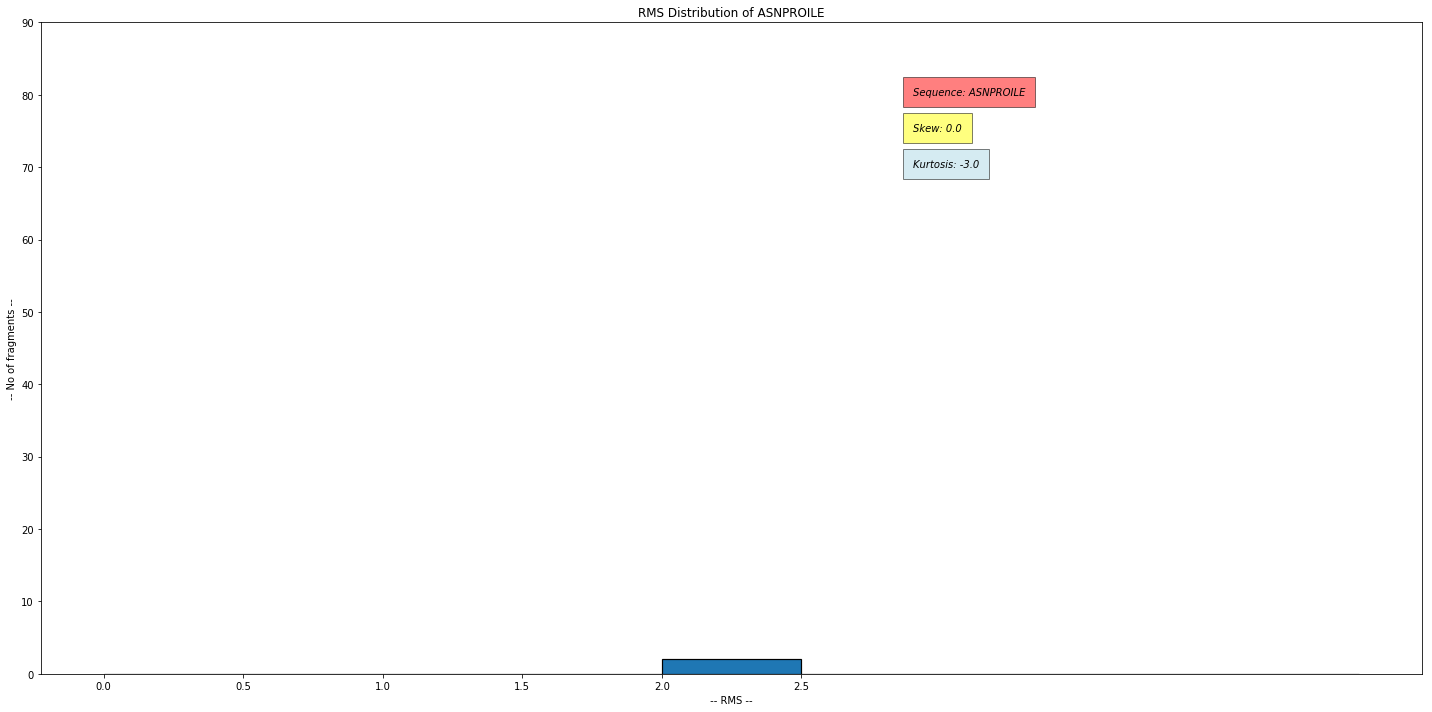

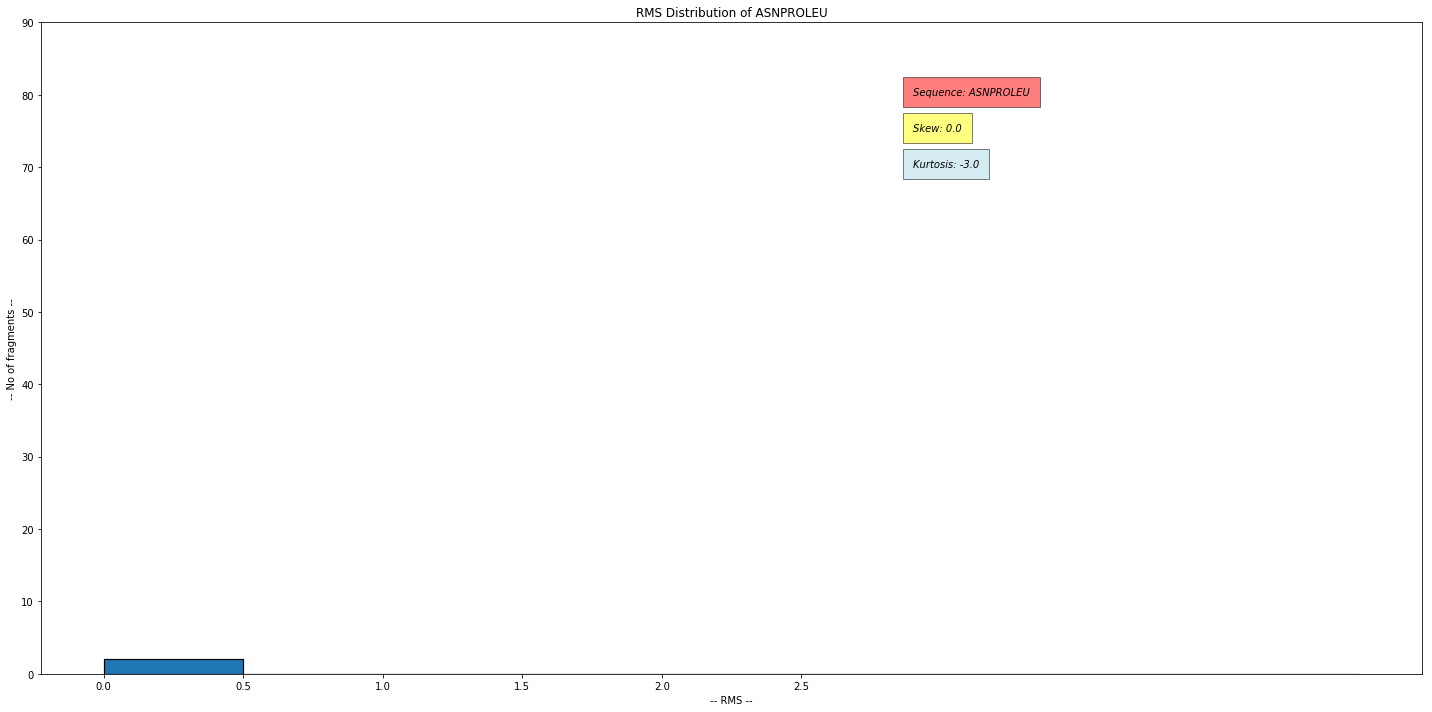

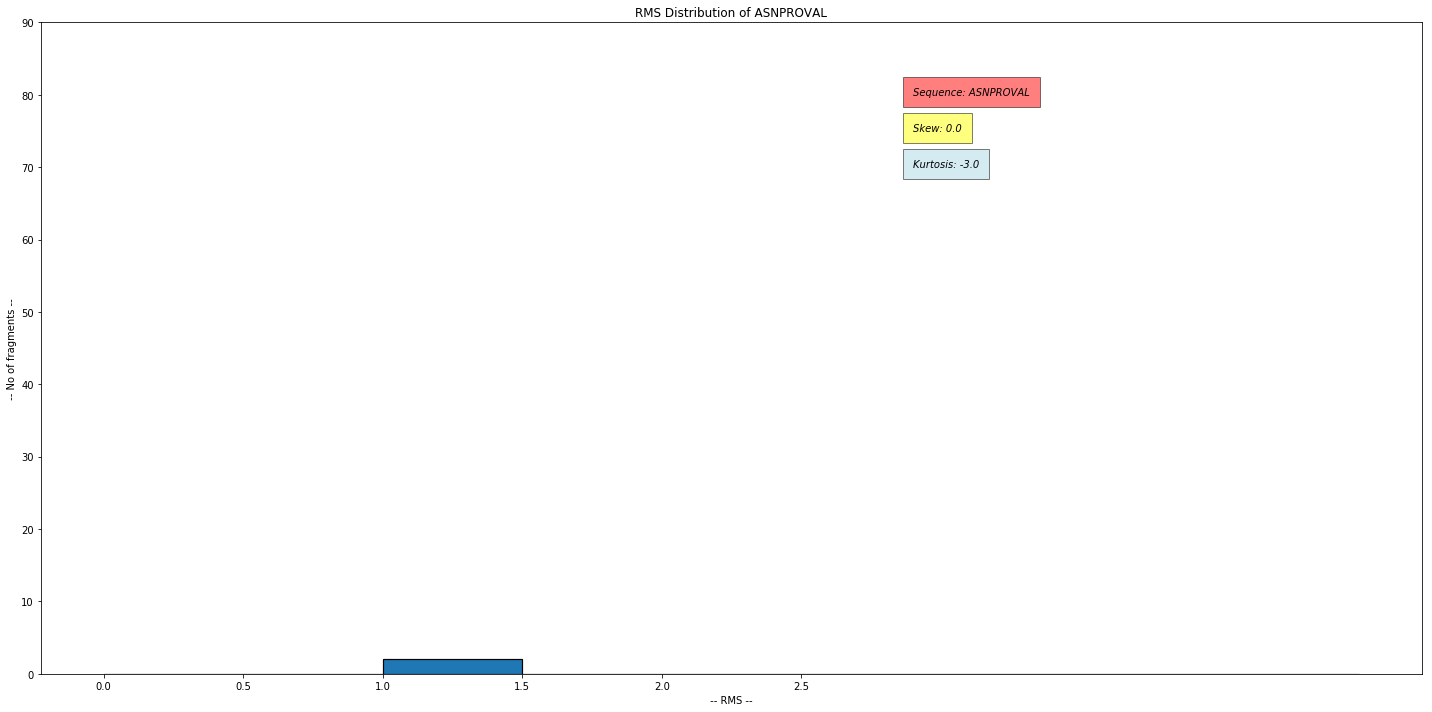

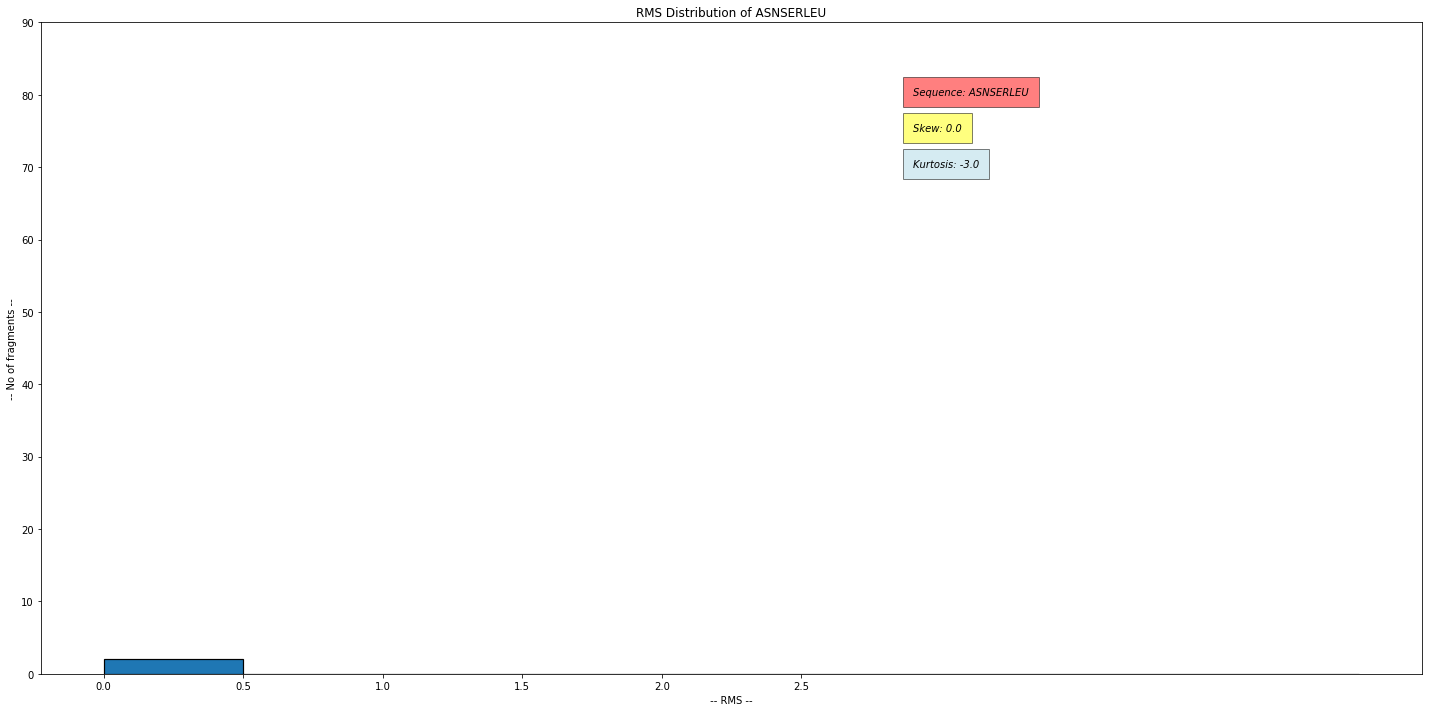

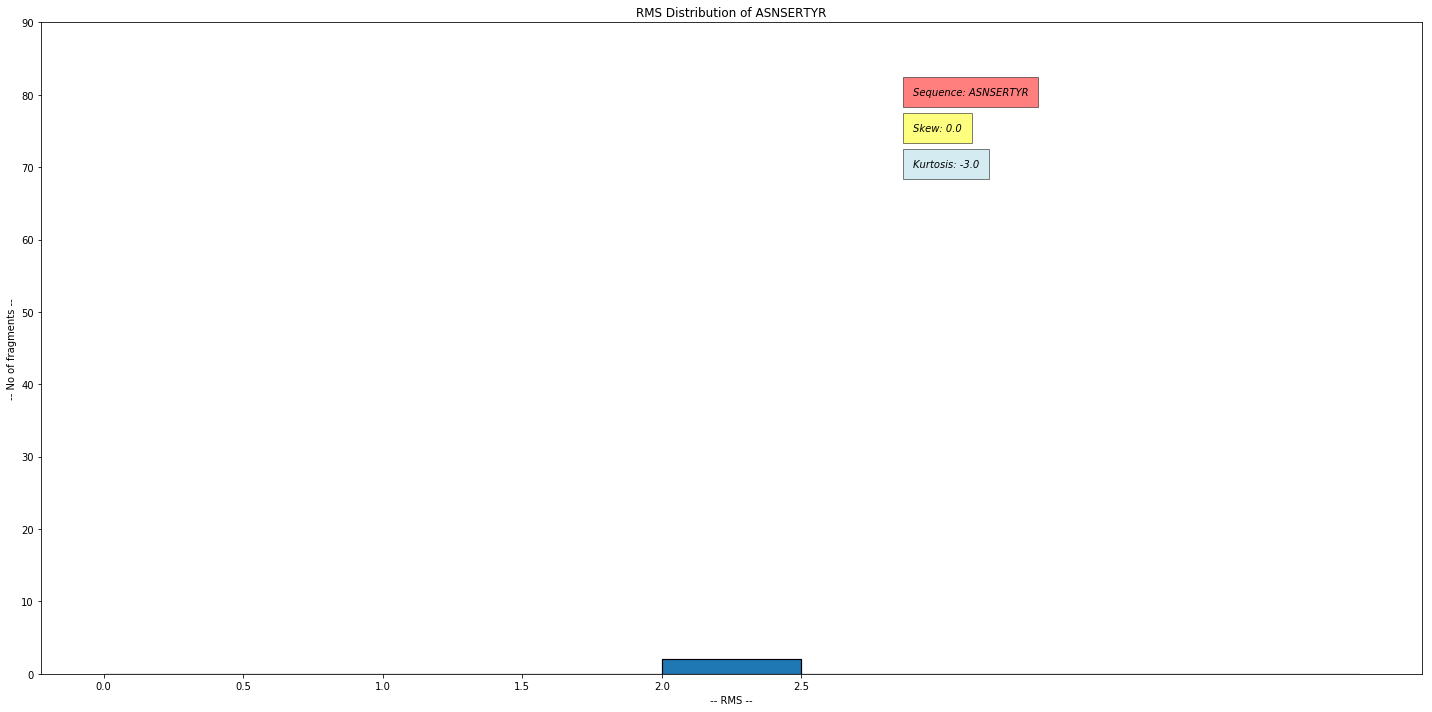

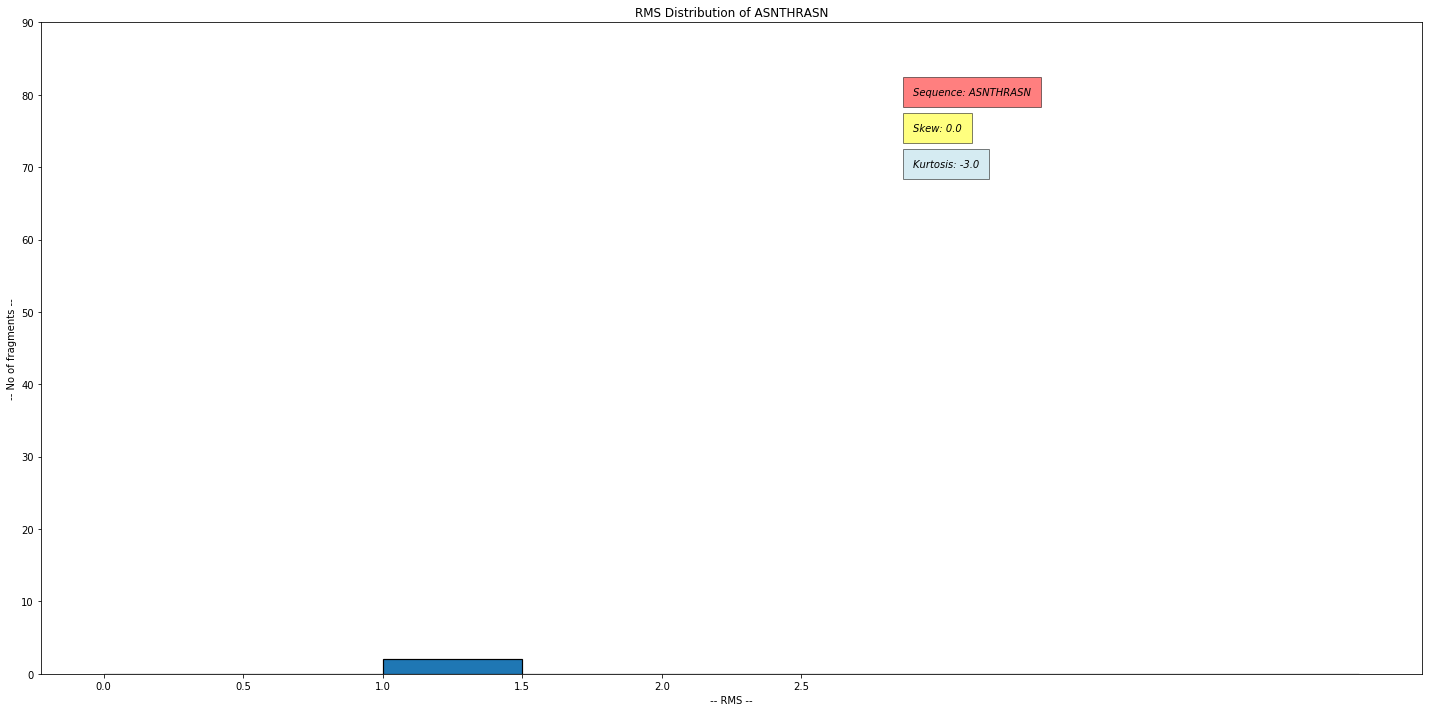

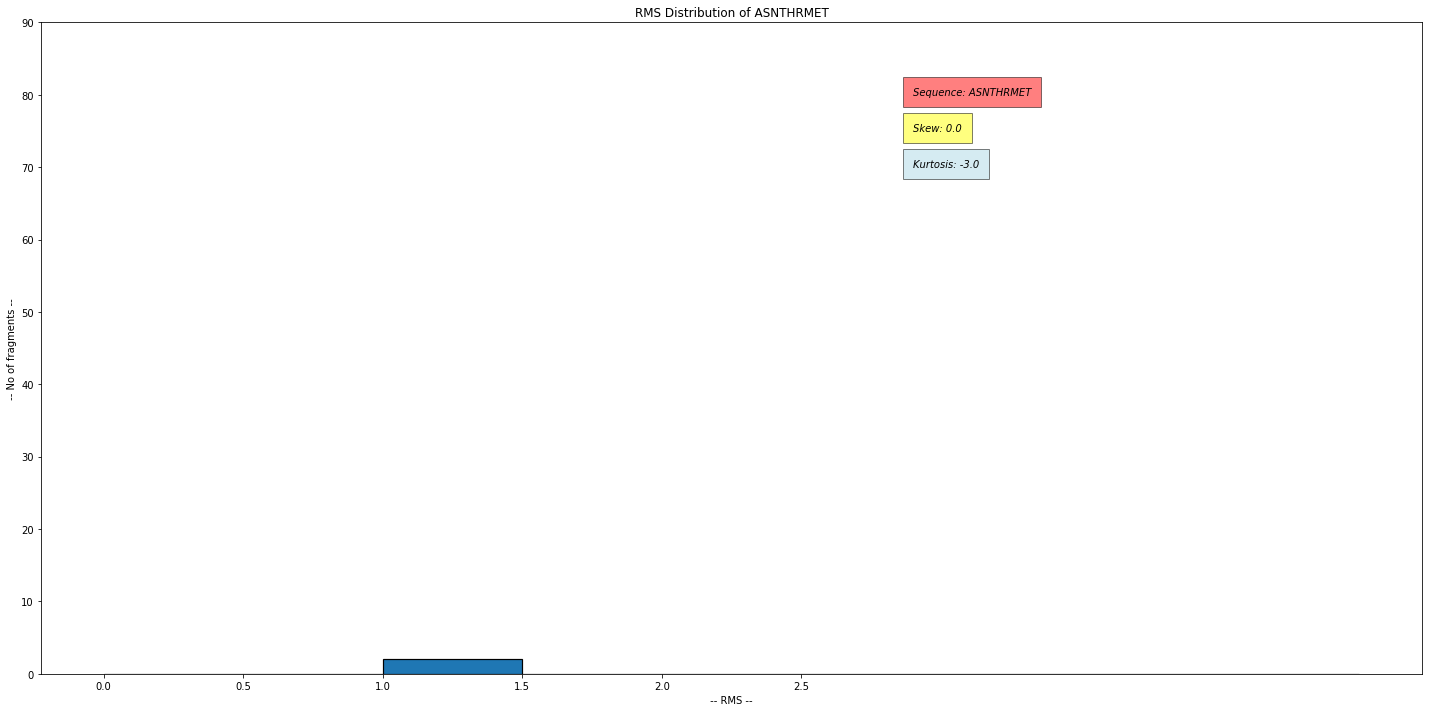

In [ ]:
# example data
for index, row in id_rms_df.iterrows():
    mu = np.array(row['RMS Value']).mean()  # mean of distribution
    sigma = np.array(row['RMS Value']).std()  # standard deviation of distribution
    fig, ax = plt.subplots(figsize=(20,10))
    
    # the histogram of the data
    n, bins, patches = ax.hist(row['RMS Value'], num_bins, density=1, edgecolor='black', linewidth=1.2)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    ax.set_xlabel(' -- RMS -- ')
    ax.set_ylabel(' -- No of fragments -- ')
    ax.set_xticks(x_x)
    ax.set_yticks(y_y)
    ax.set_title('RMS Distribution of ' + row['seq'])
    ax.text(2.9, 80, 'Sequence: ' + row['seq'], style='italic',
        bbox={'facecolor':'red', 'alpha': 0.5, 'pad':10})
    ax.text(2.9, 75, 'Skew: ' + str(skew(row['RMS Value'])), style='italic',
        bbox={'facecolor':'yellow', 'alpha': 0.5, 'pad':10})
    ax.text(2.9, 70, 'Kurtosis: ' + str(kurtosis(row['RMS Value'])), style='italic',
        bbox={'facecolor':'lightblue', 'alpha': 0.5, 'pad':10})

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()
#     print('Sequence: ' + row['seq'])
#     print('Skew: ', skew(row['RMS Value']))
#     print('Kurtosis: ', kurtosis(row['RMS Value']))